In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [439]:
weather_yield_table = pd.read_csv("final_cleaned_data/weather_yield_table.csv")
soil_yield_table = pd.read_csv("final_cleaned_data/soil_yield_table.csv")

In [440]:
type(weather_yield_table)

pandas.core.frame.DataFrame

## Modeling

In [4]:
print(weather_yield_table.shape)
print(soil_yield_table.shape)

(1677, 81)
(92, 57)


In [5]:
for col in weather_yield_table.columns:
    print(col)

Unnamed: 0
Year
County
DP10_4
DP10_5
DP10_6
DP10_7
DP10_8
DP10_9
DP10_10
DT00_4
DT00_5
DT00_6
DT00_7
DT00_8
DT00_9
DT00_10
DT32_4
DT32_5
DT32_6
DT32_7
DT32_8
DT32_9
DT32_10
DX32_4
DX32_5
DX32_6
DX32_7
DX32_8
DX32_9
DX32_10
DX90_4
DX90_5
DX90_6
DX90_7
DX90_8
DX90_9
DX90_10
EMSD_4
EMSD_5
EMSD_6
EMSD_7
EMSD_8
EMSD_9
EMSD_10
EMXP_4
EMXP_5
EMXP_6
EMXP_7
EMXP_8
EMXP_9
EMXP_10
EMXT_4
EMXT_5
EMXT_6
EMXT_7
EMXT_8
EMXT_9
EMXT_10
PRCP_4
PRCP_5
PRCP_6
PRCP_7
PRCP_8
PRCP_9
PRCP_10
SNOW_4
SNOW_5
SNOW_6
SNOW_7
SNOW_8
SNOW_9
SNOW_10
TAVG_4
TAVG_5
TAVG_6
TAVG_7
TAVG_8
TAVG_9
TAVG_10
Value


In [6]:
'''
Description of columns in weather_yield table:

Year
County
DP10_4 - Number of days with >= 0.1 inch/2.54 millimeters in April
DP10_5 - Number of days with >= 0.1 inch/2.54 millimeters in May
DP10_6 - Number of days with >= 0.1 inch/2.54 millimeters in June
DP10_7 - Number of days with >= 0.1 inch/2.54 millimeters in July
DP10_8 - Number of days with >= 0.1 inch/2.54 millimeters in August
DP10_9 - Number of days with >= 0.1 inch/2.54 millimeters in September
DP10_10 - Number of days with >= 0.1 inch/2.54 millimeters in October
DT00_4 - Number of days with maximum temperature <= -17.8 degrees Celsius in April
DT00_5 - Number of days with maximum temperature <= -17.8 degrees Celsius in May
DT00_6 - Number of days with maximum temperature <= -17.8 degrees Celsius in June
DT00_7 - Number of days with maximum temperature <= -17.8 degrees Celsius in July
DT00_8 - Number of days with maximum temperature <= -17.8 degrees Celsius in August
DT00_9 - Number of days with maximum temperature <= -17.8 degrees Celsius in September
DT00_10 - Number of days with maximum temperature <= -17.8 degrees Celsius in October
DT32_4 - Number of days with minimum temperature <= 0 degrees Celsius in April
DT32_5 - Number of days with minimum temperature <= 0 degrees Celsius in May
DT32_6 - Number of days with minimum temperature <= 0 degrees Celsius in June
DT32_7 - Number of days with minimum temperature <= 0 degrees Celsius in July
DT32_8 - Number of days with minimum temperature <= 0 degrees Celsius in August
DT32_9 - Number of days with minimum temperature <= 0 degrees Celsius in September
DT32_10 - Number of days with minimum temperature <= 0 degrees Celsius in October
DX32_4 - Number of days with maximum temperature <= 0 degrees Celsius in April
DX32_5 - Number of days with maximum temperature <= 0 degrees Celsius in May
DX32_6 - Number of days with maximum temperature <= 0 degrees Celsius in June
DX32_7 - Number of days with maximum temperature <= 0 degrees Celsius in July
DX32_8 - Number of days with maximum temperature <= 0 degrees Celsius in August
DX32_9 - Number of days with maximum temperature <= 0 degrees Celsius in September
DX32_10 - Number of days with maximum temperature <= 0 degrees Celsius in October
DX90_4 - Number of days with maximum temperature >= 32.2 degrees Celsius in April
DX90_5 - Number of days with maximum temperature >= 32.2 degrees Celsius in May
DX90_6 - Number of days with maximum temperature >= 32.2 degrees Celsius in June
DX90_7 - Number of days with maximum temperature >= 32.2 degrees Celsius in July
DX90_8 - Number of days with maximum temperature >= 32.2 degrees Celsius in August
DX90_9 - Number of days with maximum temperature >= 32.2 degrees Celsius in Septmber
DX90_10 - Number of days with maximum temperature >= 32.2 degrees Celsius in October
EMSD_4 -  Highest daily snow depth in April (mm)
EMSD_5 -  Highest daily snow depth in May (mm)
EMSD_6 -  Highest daily snow depth in June (mm)
EMSD_7 -  Highest daily snow depth in July (mm)
EMSD_8 -  Highest daily snow depth in August (mm)
EMSD_9 -  Highest daily snow depth in September (mm)
EMSD_10 -  Highest daily snow depth in October (mm)
EMXP_4 -  Highest daily snowfall in April (mm)
EMXP_5 -  Highest daily snowfall in April (mm)
EMXP_6 -  Highest daily snowfall in April (mm)
EMXP_7 -  Highest daily snowfall in April (mm)
EMXP_8 -  Highest daily snowfall in April (mm)
EMXP_9 -  Highest daily snowfall in April (mm)
EMXP_10 -  Highest daily snowfall in April (mm)
EMXT_4 -  Extreme maximum temperature for April (Celsius)
EMXT_5 -  Extreme maximum temperature for May (Celsius)
EMXT_6 -  Extreme maximum temperature for June (Celsius)
EMXT_7 -  Extreme maximum temperature for July (Celsius)
EMXT_8 -  Extreme maximum temperature for August (Celsius)
EMXT_9 -  Extreme maximum temperature for September (Celsius)
EMXT_10 -  Extreme maximum temperature for October (Celsius)
PRCP_4 -  Total Monthly Precipitation in April (mm)
PRCP_5 -  Total Monthly Precipitation in May (mm)
PRCP_6 -  Total Monthly Precipitation in June (mm)
PRCP_7 -  Total Monthly Precipitation in July (mm)
PRCP_8 -  Total Monthly Precipitation in August (mm)
PRCP_9 -  Total Monthly Precipitation in September (mm)
PRCP_10 -  Total Monthly Precipitation in October (mm)
SNOW_4 -  Total Monthly Snowfall in April (mm)
SNOW_5 -  Total Monthly Snowfall in May (mm)
SNOW_6 -  Total Monthly Snowfall in June (mm)
SNOW_7 -  Total Monthly Snowfall in July (mm)
SNOW_8 -  Total Monthly Snowfall in August (mm)
SNOW_9 -  Total Monthly Snowfall in September (mm)
SNOW_10 -  Total Monthly Snowfall in October (mm)
TAVG_4 -  Average Monthly Temperature in April (Celsius)
TAVG_5 -  Average Monthly Temperature in May (Celsius)
TAVG_6 -  Average Monthly Temperature in June (Celsius)
TAVG_7 -  Average Monthly Temperature in July (Celsius)
TAVG_8 -  Average Monthly Temperature in August (Celsius)
TAVG_9 -  Average Monthly Temperature in September (Celsius)
TAVG_10 -  Average Monthly Temperature in October (Celsius)
Value - Corn Yield

'''

'\nDescription of columns in weather_yield table:\n\nYear\nCounty\nDP10_4 - Number of days with >= 0.1 inch/2.54 millimeters in April\nDP10_5 - Number of days with >= 0.1 inch/2.54 millimeters in May\nDP10_6 - Number of days with >= 0.1 inch/2.54 millimeters in June\nDP10_7 - Number of days with >= 0.1 inch/2.54 millimeters in July\nDP10_8 - Number of days with >= 0.1 inch/2.54 millimeters in August\nDP10_9 - Number of days with >= 0.1 inch/2.54 millimeters in September\nDP10_10 - Number of days with >= 0.1 inch/2.54 millimeters in October\nDT00_4 - Number of days with maximum temperature <= -17.8 degrees Celsius in April\nDT00_5 - Number of days with maximum temperature <= -17.8 degrees Celsius in May\nDT00_6 - Number of days with maximum temperature <= -17.8 degrees Celsius in June\nDT00_7 - Number of days with maximum temperature <= -17.8 degrees Celsius in July\nDT00_8 - Number of days with maximum temperature <= -17.8 degrees Celsius in August\nDT00_9 - Number of days with maximum

## Weather Prediction

## Linear Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [256]:
weather_yield_table.drop(columns="Unnamed: 0", axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
weather_yield_table_copy = weather_yield_table.copy()

In [ ]:
# Control set

county = weather_yield_table_copy['County']
year = weather_yield_table_copy['Year']

y_control = weather_yield_table_copy['Value']
X_control = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)



X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size=0.2, random_state=24)


In [ ]:
print(X_train_control.shape)
print(X_test_control.shape)

(1341, 77)
(336, 77)


In [ ]:
print(X_train_control)

        DP10_4    DP10_5    DP10_6    DP10_7    DP10_8    DP10_9   DP10_10  \
835   2.741268  0.135742  0.255013 -1.704317 -0.340810  2.115491 -0.752818   
974   0.019461 -1.361458  0.385914 -0.251246 -0.918507  0.682027  0.463003   
627   1.217056  0.697192 -0.212489  1.217620 -0.109732  1.012826  1.341096   
103  -0.742645  2.007241 -1.334496 -0.914604 -1.265125  0.792293  0.733186   
1281 -0.960389  1.321025 -0.062889  0.585850 -0.725942 -0.795544  0.571076   
...        ...       ...       ...       ...       ...       ...       ...   
1425  0.128334  1.258642  0.909517 -0.677691  0.121347 -1.413037 -0.077362   
343  -1.178134  0.884342 -0.586492 -0.203863  0.121347  1.453892  0.733186   
192  -0.089411  1.258642 -1.147495  0.980706  0.121347 -2.074636  0.530549   
899  -1.323297 -1.735757 -1.459163  0.190993  0.275400  0.057183  1.813916   
418  -0.524900 -1.455033 -0.586492 -1.230490  1.199715 -0.442692 -0.320526   

      DT00_4  DT00_5  DT00_6  ...  SNOW_8  SNOW_9  SNOW_10     

In [ ]:
print(X_test_control)

        DP10_4    DP10_5    DP10_6    DP10_7    DP10_8    DP10_9   DP10_10  \
525  -0.742645  0.135742 -1.708498 -0.203863 -1.958362  1.674425 -1.293183   
1057 -1.240346 -0.612858  1.016375 -0.796147 -1.067058  0.414237  0.783845   
843  -1.420072 -2.026880 -1.745898 -0.440777  0.352426  0.694278  1.172232   
1672 -0.016830  1.009108 -1.209829  1.454534 -0.340810 -0.383883 -1.833548   
1635  0.207513 -0.121589 -1.359429  0.159405  0.420390  0.057183 -0.366843   
...        ...       ...       ...       ...       ...       ...       ...   
860  -1.178134 -1.922907 -2.643504 -1.388432 -0.109732  0.571760  0.125275   
1185  0.128334 -0.238558 -0.835826  0.269965  1.199715 -0.089839  0.125275   
94   -0.307156  0.884342 -0.212489  0.743792  1.276741  1.233359 -0.685273   
1371 -0.234574  0.734622  1.096518 -0.914604 -0.725942  1.343626 -0.077362   
778   1.870290 -0.238558  0.161513 -1.546375 -1.573230  1.674425 -0.347544   

      DT00_4  DT00_5  DT00_6  ...  SNOW_8  SNOW_9    SNOW_10   

In [257]:
# Create a linear regression object
model_control = LinearRegression()

# Fit the model to the training data
model_control.fit(X_train_control, y_train_control)

LinearRegression()

In [258]:
predictions_control = model_control.predict(X_test_control)

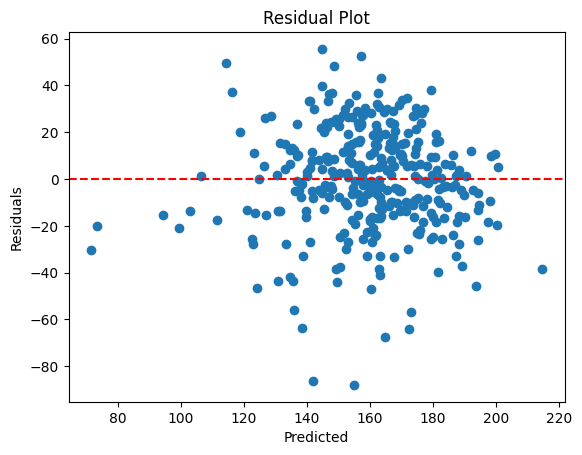

In [259]:
residuals_control = y_test_control - predictions_control
plt.scatter(predictions_control, residuals_control)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [17]:
mse = mean_squared_error(y_test_control, predictions_control)
r2 = r2_score(y_test_control, predictions_control)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 495.596019720962
R-squared: 0.4323569767628034


## Custom

In [71]:
# Logistic Regression

county = weather_yield_table_copy['County']
year = weather_yield_table_copy['Year']

X = weather_yield_table_copy.drop(columns=["County"], axis=1)

#y = weather_yield_table_copy['Value']


## Custom Train Test Split

In [72]:
X.columns

Index(['Year', 'DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9',
       'DP10_10', 'DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9',
       'DT00_10', 'DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9',
       'DT32_10', 'DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9',
       'DX32_10', 'DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 'DX90_9',
       'DX90_10', 'EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9',
       'EMSD_10', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 'EMXP_9',
       'EMXP_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 'EMXT_9',
       'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 'PRCP_9',
       'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 'SNOW_9',
       'SNOW_10', 'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 'TAVG_9',
       'TAVG_10', 'Value'],
      dtype='object')

In [73]:
X['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [111]:
def custon_train_test_split(X):
    # Assuming 'df' is your DataFrame
    training_years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012 ,2013, 2014, 2015, 2016, 2017, 2018, 2019]
    testing_years = [2020, 2021, 2022]

    # Create a boolean mask for rows where the 'Year' column equals one of the selected years
    train_rows_bool = X['Year'].isin(training_years)
    test_rows_bool = X['Year'].isin(testing_years)


    train_rows = X[train_rows_bool].sample(frac=1, random_state=42) 
    test_rows = X[test_rows_bool]

    y_train = train_rows['Value']
    y_test = test_rows['Value']

    X_train = train_rows.drop(columns=["Year", 'Value'], axis=1)
    X_test = test_rows.drop(columns=["Year", 'Value'], axis=1)
    
    return X_train, X_test, y_train, y_test
    

In [112]:
X_train, X_test, y_train, y_test = custon_train_test_split(X)

In [113]:
X_train

DP10_4    DP10_5    DP10_6    DP10_7    DP10_8    DP10_9   DP10_10  \
413   0.128334  0.884342  0.909517  0.980706  0.583505  0.792293  1.543733   
316   0.563823 -1.735757 -1.334496  0.506879  1.969977 -0.971971 -1.293183   
1034  0.854149 -1.361458  1.158852  0.190993 -0.225271 -0.200105  0.834504   
65    0.999312  1.071492 -1.521497 -1.151518 -0.802968 -0.310372  1.138459   
1024  0.563823 -1.735757 -0.212489 -0.440777 -0.340810 -0.310372  1.003368   
...        ...       ...       ...       ...       ...       ...       ...   
1095  0.346078 -0.800008  1.283519  2.165275 -0.802968 -1.302770  0.226593   
1130  0.563823 -1.361458  2.031524  1.612476 -0.340810 -0.641171 -0.212453   
1294 -0.161993  0.884342  0.086712  0.506879  0.198373 -0.593914  0.675289   
860  -1.178134 -1.922907 -2.643504 -1.388432 -0.109732  0.571760  0.125275   
1126  0.563823  0.697192  0.348514  0.980706 -0.571889 -0.971971 -1.090546   

      DT00_4  DT00_5  DT00_6  ...  SNOW_8  SNOW_9  SNOW_10        TAVG_4  \
413      0.0     0.0     0.0  ...     0.0     0.0      0.0  8.172653e-01   
316      0.0     0.0     0.0  ...     0.0     0.0      0.0  1.419758e+00   
1034     0.0     0.0     0.0  ...     0.0     0.0      0.0 -2.098480e-02   
65       0.0     0.0     0.0  ...     0.0     0.0      0.0  2.179422e+00   
1024     0.0     0.0     0.0  ...     0.0     0.0      0.0 -7.544536e-01   
...      ...     ...     ...  ...     ...     ...      ...           ...   
1095     0.0     0.0     0.0  ...     0.0     0.0      0.0  9.306446e-16   
1130     0.0     0.0     0.0  ...     0.0     0.0      0.0  9.220466e-01   
1294     0.0     0.0     0.0  ...     0.0     0.0      0.0  7.386794e-01   
860      0.0     0.0     0.0  ...     0.0     0.0      0.0  9.306446e-16   
1126     0.0     0.0     0.0  ...     0.0     0.0      0.0  1.917469e+00   

        TAVG_5    TAVG_6        TAVG_7        TAVG_8    TAVG_9   TAVG_10  
413  -0.601398 -1.529293  3.539371e-01  3.548404e-01 -1.573676 -1.215259  
316   0.015860  1.402473  9.239093e-01  2.227386e+00  1.918698  1.457845  
1034  0.096372  0.452746 -2.115942e+00 -3.517806e-01 -1.237871 -0.486230  
65    0.042697  1.278595  1.810533e+00  2.192055e+00  2.388825  0.607312  
1024 -0.279350 -0.703443 -2.305933e+00 -9.170775e-01 -1.842320 -0.972249  
...        ...       ...           ...           ...       ...       ...  
1095  0.000000  0.000000 -4.499884e-15  2.510422e-15  0.000000  0.000000  
1130  1.116190  0.122406 -1.527048e-01 -9.170775e-01  0.508316  0.546560  
1294 -1.084470 -0.331811 -3.743606e-01 -1.694361e+00 -0.331197  0.759193  
860   0.000000  0.000000 -4.499884e-15  2.510422e-15  0.000000  0.000000  
1126  1.652936  1.608935  1.493881e+00  9.907994e-01  2.523148  2.126121  

[1443 rows x 77 columns]

In [114]:
y_train.shape

(1443,)

In [115]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [116]:
# Create a linear regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [117]:
predictions = model.predict(X_test)

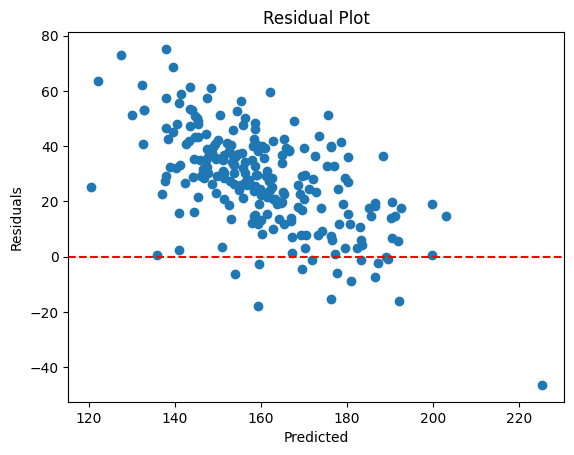

In [118]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

Expected Behavior: In a well-fitted regression model, the residuals should be randomly scattered around the horizontal line at 
y=0. 

This means that, on average, the model is equally likely to overestimate as it is to underestimate the actual values. There should be no discernible patterns or trends in the residuals.


## Observation:

- The spread of residuals changes indicate the variance is not constant.

In [119]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1084.6404238046898
R-squared: -3.7683092078663263


## Correlation Analysis

In [120]:
X.shape

(1677, 79)

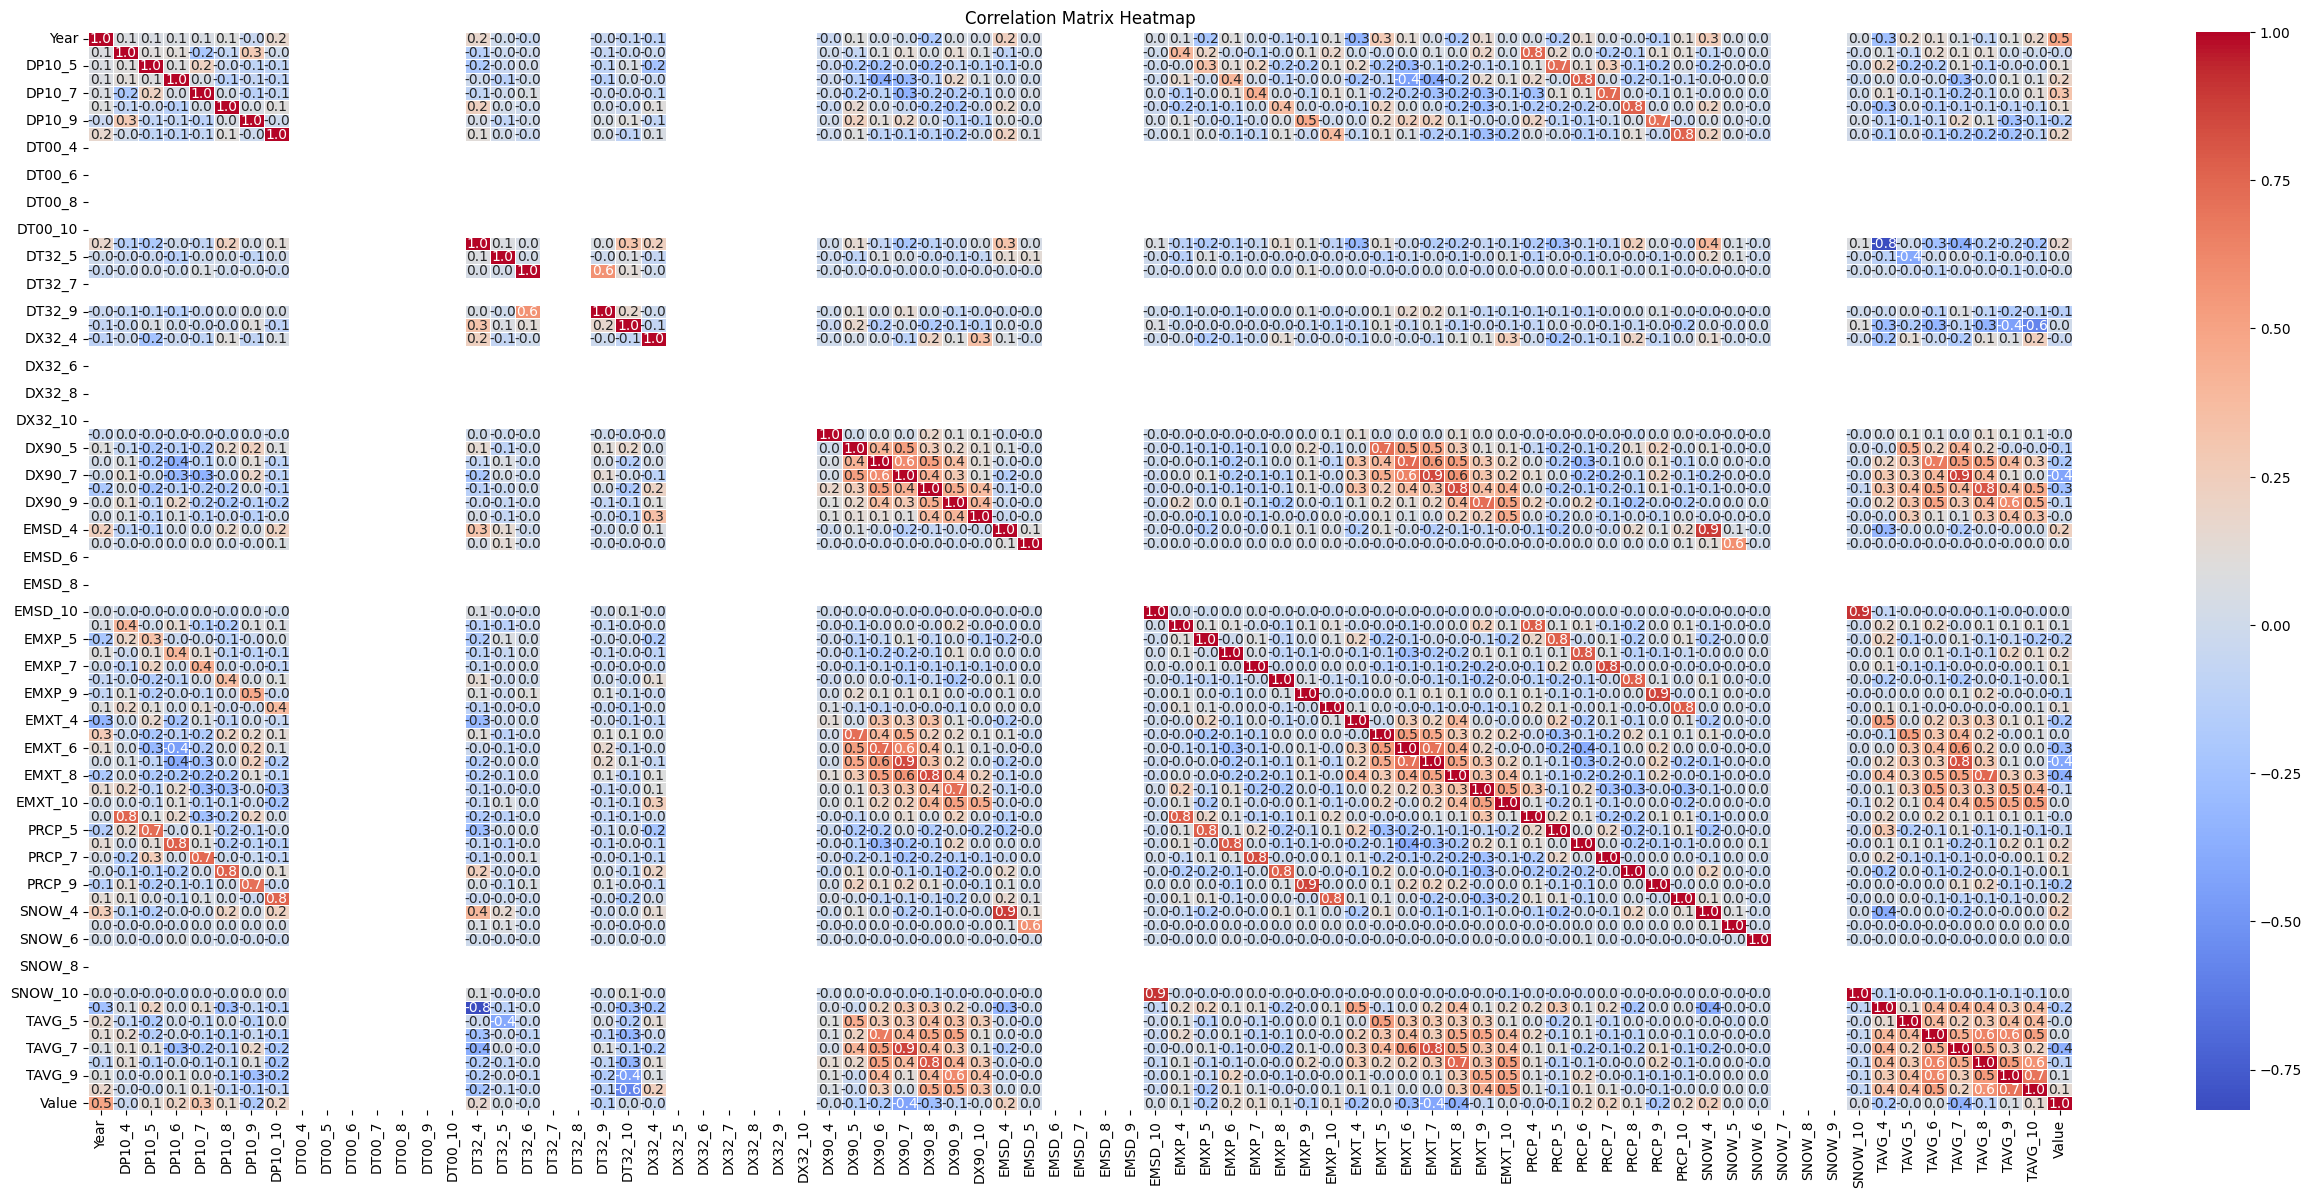

In [121]:
#group_selected_drop = group_selected.drop("DATE")


# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(32, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [122]:
# Assuming correlation_matrix is your correlation matrix
correlation_threshold = 0.7

# Iterate through the correlation matrix and print pairs with correlation above or below threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            print(f"Pair of features: {correlation_matrix.columns[i]}, {correlation_matrix.columns[j]}, Correlation: {correlation_matrix.iloc[i, j]}")


Pair of features: DP10_4, PRCP_4, Correlation: 0.7568677126579705
Pair of features: DP10_5, PRCP_5, Correlation: 0.7234272719247979
Pair of features: DP10_6, PRCP_6, Correlation: 0.7790396868103443
Pair of features: DP10_7, PRCP_7, Correlation: 0.7386277765206299
Pair of features: DP10_8, PRCP_8, Correlation: 0.7683060094358904
Pair of features: DP10_9, PRCP_9, Correlation: 0.7116371896214355
Pair of features: DP10_10, PRCP_10, Correlation: 0.7600344142330896
Pair of features: DT32_4, TAVG_4, Correlation: -0.8180621605824058
Pair of features: DX90_5, EMXT_5, Correlation: 0.721446265685474
Pair of features: DX90_6, EMXT_6, Correlation: 0.737033389626899
Pair of features: DX90_7, EMXT_7, Correlation: 0.8506208279779618
Pair of features: DX90_7, TAVG_7, Correlation: 0.8698446930860916
Pair of features: DX90_8, EMXT_8, Correlation: 0.8371213542683427
Pair of features: DX90_8, TAVG_8, Correlation: 0.8047295462817552
Pair of features: DX90_9, EMXT_9, Correlation: 0.720425424910115
Pair of fe

In [123]:
to_drop = ['DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10', 'DT32_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 'DX90_9',
           'EMSD_4', 'EMSD_10', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 'EMXP_9', 'EMXP_10', 'EMXT_7', 'EMXT_8', "County"]

In [124]:
X_v2 = weather_yield_table_copy.drop(columns=to_drop, axis=1)

In [125]:
X_v2_train, X_v2_test, y_v2_train, y_v2_test = custon_train_test_split(X_v2)

In [126]:
X_v2_train.columns

Index(['DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9', 'DT00_10',
       'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9', 'DT32_10', 'DX32_4',
       'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9', 'DX32_10', 'DX90_4',
       'DX90_10', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9', 'EMXT_4',
       'EMXT_5', 'EMXT_6', 'EMXT_9', 'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6',
       'PRCP_7', 'PRCP_8', 'PRCP_9', 'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6',
       'SNOW_7', 'SNOW_8', 'SNOW_9', 'SNOW_10', 'TAVG_4', 'TAVG_5', 'TAVG_6',
       'TAVG_7', 'TAVG_8', 'TAVG_9', 'TAVG_10'],
      dtype='object')

In [127]:
model_linear = LinearRegression()
model_linear.fit(X_v2_train, y_v2_train)

LinearRegression()

In [128]:
predictions_linear = model_linear.predict(X_v2_test)

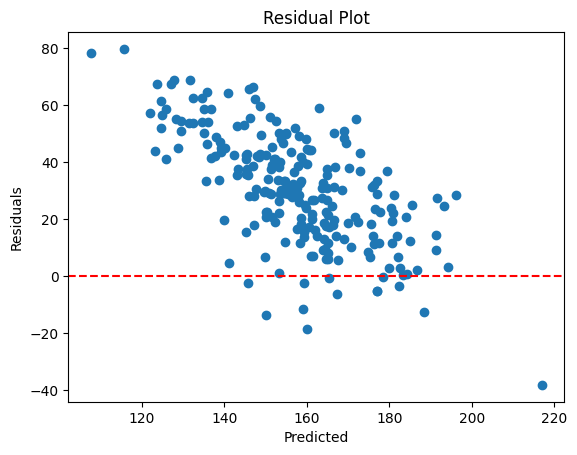

In [129]:
residuals_linear = y_v2_test - predictions_linear
plt.scatter(predictions_linear, residuals_linear)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [130]:
mse = mean_squared_error(y_v2_test, predictions_linear)
r2 = r2_score(y_v2_test, predictions_linear)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1324.7624413727606
R-squared: -4.82393649434062


## Random Forest

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [132]:
X.columns

Index(['Year', 'DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9',
       'DP10_10', 'DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9',
       'DT00_10', 'DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9',
       'DT32_10', 'DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9',
       'DX32_10', 'DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 'DX90_9',
       'DX90_10', 'EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9',
       'EMSD_10', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 'EMXP_9',
       'EMXP_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 'EMXT_9',
       'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 'PRCP_9',
       'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 'SNOW_9',
       'SNOW_10', 'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 'TAVG_9',
       'TAVG_10', 'Value'],
      dtype='object')

In [135]:
#X_rf_train, X_rf_test, y_rf_train, y_rf_test = custon_train_test_split(X)

In [136]:
#X_rf_train.shape

(1443, 77)

In [137]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_control, y_control, test_size=0.2, random_state=24)

In [138]:
X_rf_train.shape

(1341, 77)

In [139]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions = best_rf_model.predict(X_rf_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 17.28024362170689


In [148]:
X_rf_train.shape

(1341, 77)

In [149]:
X_rf_train

DP10_4    DP10_5    DP10_6    DP10_7    DP10_8    DP10_9   DP10_10  \
835   2.741268  0.135742  0.255013 -1.704317 -0.340810  2.115491 -0.752818   
974   0.019461 -1.361458  0.385914 -0.251246 -0.918507  0.682027  0.463003   
627   1.217056  0.697192 -0.212489  1.217620 -0.109732  1.012826  1.341096   
103  -0.742645  2.007241 -1.334496 -0.914604 -1.265125  0.792293  0.733186   
1281 -0.960389  1.321025 -0.062889  0.585850 -0.725942 -0.795544  0.571076   
...        ...       ...       ...       ...       ...       ...       ...   
1425  0.128334  1.258642  0.909517 -0.677691  0.121347 -1.413037 -0.077362   
343  -1.178134  0.884342 -0.586492 -0.203863  0.121347  1.453892  0.733186   
192  -0.089411  1.258642 -1.147495  0.980706  0.121347 -2.074636  0.530549   
899  -1.323297 -1.735757 -1.459163  0.190993  0.275400  0.057183  1.813916   
418  -0.524900 -1.455033 -0.586492 -1.230490  1.199715 -0.442692 -0.320526   

      DT00_4  DT00_5  DT00_6  ...  SNOW_8  SNOW_9  SNOW_10        TAVG_4  \
835      0.0     0.0     0.0  ...     0.0     0.0      0.0  9.306446e-16   
974      0.0     0.0     0.0  ...     0.0     0.0     51.0 -8.592349e-01   
627      0.0     0.0     0.0  ...     0.0     0.0      0.0  4.505309e-01   
103      0.0     0.0     0.0  ...     0.0     0.0      0.0  1.393562e+00   
1281     0.0     0.0     0.0  ...     0.0     0.0      0.0  9.744372e-01   
...      ...     ...     ...  ...     ...     ...      ...           ...   
1425     0.0     0.0     0.0  ...     0.0     0.0      0.0 -1.781567e-01   
343      0.0     0.0     0.0  ...     0.0     0.0      0.0  9.306446e-16   
192      0.0     0.0     0.0  ...     0.0     0.0      0.0  9.306446e-16   
899      0.0     0.0     0.0  ...     0.0     0.0      0.0 -4.401099e-01   
418      0.0     0.0     0.0  ...     0.0     0.0      0.0 -1.173579e+00   

        TAVG_5    TAVG_6        TAVG_7        TAVG_8    TAVG_9   TAVG_10  
835   0.000000  0.000000 -4.499884e-15  2.510422e-15  0.000000  0.000000  
974   0.311070 -0.455689 -1.039328e+00 -1.411712e+00 -0.499099 -0.303973  
627   0.633118  1.567643 -9.126677e-01  2.841783e-01  0.407575 -0.789992  
103   0.418420 -0.538273  1.113900e+00  2.121393e+00  0.038189  0.911074  
1281 -0.869771 -1.446708 -9.759979e-01 -1.694361e+00 -0.096133  0.911074  
...        ...       ...           ...           ...       ...       ...  
1425  0.096372 -0.951198  6.072581e-01  1.529904e-03  1.650054  0.850322  
343   0.000000  0.000000 -4.499884e-15  2.510422e-15  0.000000  0.000000  
192   0.000000  0.000000 -4.499884e-15  2.510422e-15  0.000000  0.000000  
899   1.116190 -0.579566  1.303891e+00 -9.170775e-01 -1.405773 -1.488644  
418   0.686793 -0.042764 -9.126677e-01  4.255026e-01 -0.028972  1.700855  

[1341 rows x 77 columns]

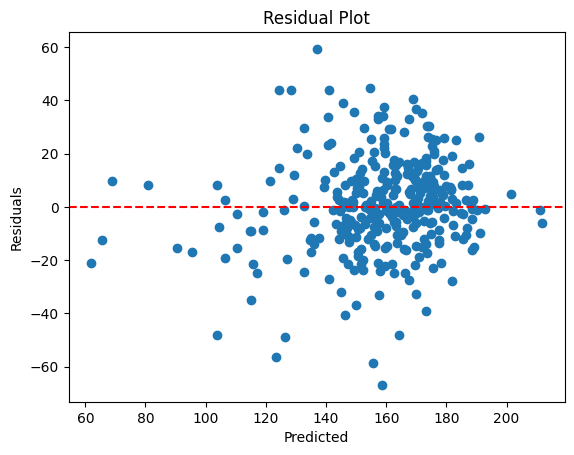

In [140]:
residuals_rf = y_rf_test - best_predictions
plt.scatter(best_predictions, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [141]:
mse = mean_squared_error(y_rf_test , best_predictions)
r2 = r2_score(y_rf_test, best_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 310.54929665828934
R-squared: 0.6443047671800333


## Feature importance with Random Forest

In [164]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Access feature importances
feature_importances = best_estimator.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.010483959546386657
Feature 1: 0.018083908460530002
Feature 2: 0.056214003154633624
Feature 3: 0.11755498169634311
Feature 4: 0.013905667700061892
Feature 5: 0.014203446768529882
Feature 6: 0.08853984895733213
Feature 7: 0.007048560671190018
Feature 8: 0.0024583704095281758
Feature 9: 1.6119905464151691e-09
Feature 10: 5.2512899241261174e-05
Feature 11: 0.004489946107774477
Feature 12: 0.000919323786669687
Feature 13: 5.3964175068830084e-06
Feature 14: 0.0022166165752292343
Feature 15: 0.003756979708523057
Feature 16: 0.017767851540126865
Feature 17: 0.008347144150038628
Feature 18: 0.005846429309864101
Feature 19: 0.0005848249762976672
Feature 20: 0.014472181828543682
Feature 21: 4.888307172943197e-07
Feature 22: 1.8691578279539656e-06
Feature 23: 0.01275988091287964
Feature 24: 0.02942744965242872
Feature 25: 0.0138447327476295
Feature 26: 0.010867013332059479
Feature 27: 0.012822795770319625
Feature 28: 0.01291119323657464
Feature 29: 0.013203021421258473
Feature 30: 0.0

In [ ]:
# 8-14, 18, 19, 23-28, 38-41, 67-69

In [204]:
X_control_rf = X_control.copy()
y_control_rf = y_control.copy()

In [205]:
index_to_drop = [7, 8, 9, 10, 11, 12, 13, 17, 18, 22, 23, 24, 25, 26, 27, 37, 38, 39, 40, 66, 67, 68]

In [206]:
X_control_rf.drop(X_control_rf.columns[index_to_drop], axis=1, inplace=True)

In [207]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_control_rf, y_control_rf, test_size=0.2, random_state=24)

In [208]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions = best_rf_model.predict(X_rf_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 17.30420000503499


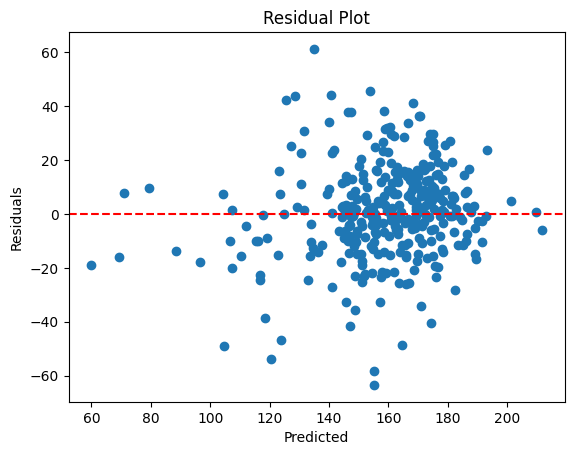

In [214]:
residuals_rf = y_rf_test - best_predictions
plt.scatter(best_predictions, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [215]:
mse = mean_squared_error(y_rf_test , best_predictions)
r2 = r2_score(y_rf_test, best_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 311.8924690167056
R-squared: 0.6427663318659456


In [217]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Access feature importances
feature_importances = best_estimator.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.010483959546386657
Feature 1: 0.018083908460530002
Feature 2: 0.056214003154633624
Feature 3: 0.11755498169634311
Feature 4: 0.013905667700061892
Feature 5: 0.014203446768529882
Feature 6: 0.08853984895733213
Feature 7: 0.007048560671190018
Feature 8: 0.0024583704095281758
Feature 9: 1.6119905464151691e-09
Feature 10: 5.2512899241261174e-05
Feature 11: 0.004489946107774477
Feature 12: 0.000919323786669687
Feature 13: 5.3964175068830084e-06
Feature 14: 0.0022166165752292343
Feature 15: 0.003756979708523057
Feature 16: 0.017767851540126865
Feature 17: 0.008347144150038628
Feature 18: 0.005846429309864101
Feature 19: 0.0005848249762976672
Feature 20: 0.014472181828543682
Feature 21: 4.888307172943197e-07
Feature 22: 1.8691578279539656e-06
Feature 23: 0.01275988091287964
Feature 24: 0.02942744965242872
Feature 25: 0.0138447327476295
Feature 26: 0.010867013332059479
Feature 27: 0.012822795770319625
Feature 28: 0.01291119323657464
Feature 29: 0.013203021421258473
Feature 30: 0.0

In [218]:
original_cols = list(X_rf_train.columns).copy()

In [229]:
high = []
mid = []
low = []


for i, importance in enumerate(feature_importances):
    if importance > 0.05:
        high.append(i) 
           
    elif importance <= 0.05 and importance >= 0.005:
        mid.append(i)
        
    else:
        low.append(i)
    

#col_lst = list(X_rf_train.columns)

high_features = [original_cols[i] for i in high]
mid_features = [original_cols[i] for i in mid]
low_features = [original_cols[i] for i in low]

'''
High Importance Features: 


'''

'\nHigh Importance Features: \n\n\n'

In [230]:
high_features

['DP10_6', 'DP10_7', 'DP10_10', 'EMXT_6', 'PRCP_6']

In [231]:
mid_features

['DP10_4',
 'DP10_5',
 'DP10_8',
 'DP10_9',
 'DT32_4',
 'DX90_7',
 'DX90_8',
 'DX90_9',
 'EMSD_4',
 'EMXP_4',
 'EMXP_5',
 'EMXP_6',
 'EMXP_7',
 'EMXP_8',
 'EMXP_9',
 'EMXP_10',
 'EMXT_4',
 'EMXT_5',
 'EMXT_7',
 'EMXT_8',
 'EMXT_9',
 'EMXT_10',
 'PRCP_4',
 'PRCP_5',
 'PRCP_7',
 'PRCP_8',
 'PRCP_9',
 'PRCP_10',
 'SNOW_4',
 'TAVG_4',
 'TAVG_5',
 'TAVG_6',
 'TAVG_7',
 'TAVG_8',
 'TAVG_9',
 'TAVG_10']

In [232]:
low_features

['DT32_5',
 'DT32_6',
 'DT32_9',
 'DT32_10',
 'DX32_4',
 'DX90_4',
 'DX90_5',
 'DX90_6',
 'DX90_10',
 'EMSD_5',
 'EMSD_10',
 'SNOW_5',
 'SNOW_6',
 'SNOW_10']

In [246]:
X_control_rf_v2 = X_control_rf.copy()
y_control_rf_v2 = y_control_rf.copy()

In [247]:
X_control_rf_v2.drop(columns=low_features, axis=1, inplace=True)

In [248]:
#X_control_rf_v2.drop(columns=mid_features, axis=1, inplace=True)

In [249]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_control_rf_v2, y_control_rf_v2, test_size=0.2, random_state=24)

In [250]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search_rf.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

# Get the best estimator
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions = best_rf_model.predict(X_rf_test)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 17.278257269002392


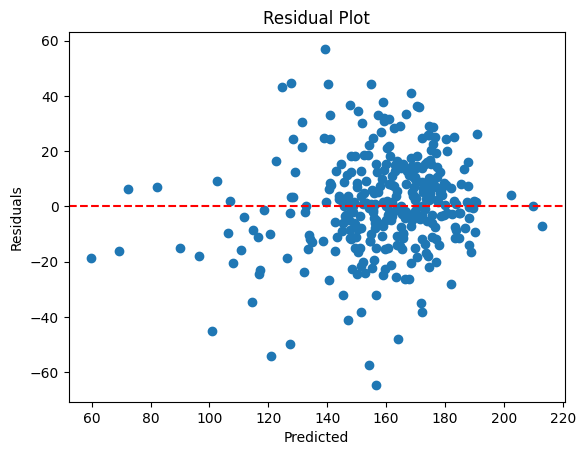

In [251]:
residuals_rf = y_rf_test - best_predictions
plt.scatter(best_predictions, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [252]:
mse = mean_squared_error(y_rf_test , best_predictions)
r2 = r2_score(y_rf_test, best_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 308.61800781249997
R-squared: 0.6465168160979915


## L1 Regularization

In [4]:
from sklearn.linear_model import Lasso

In [299]:
y_l1 = weather_yield_table_copy['Value']
X_l1 = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)

In [300]:
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X_l1, y_l1, test_size=0.2, random_state=24)

In [302]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Set alpha to control regularization strength

# Fit the model to your training data
lasso_model.fit(X_train_l1, y_train_l1)

# Predict on test data
pred_lasso = lasso_model.predict(X_test_l1)

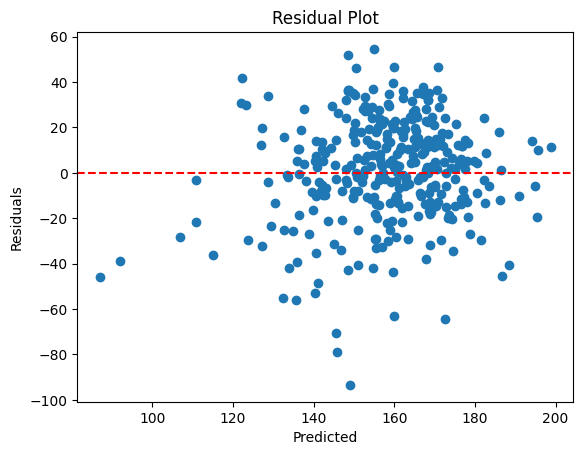

In [303]:
residuals_lasso = y_test_l1 - pred_lasso
plt.scatter(pred_lasso , residuals_lasso )
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [304]:
mse = mean_squared_error(y_test_l1,  pred_lasso)
r2 = r2_score(y_test_l1,  pred_lasso)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 526.1986709896462
R-squared: 0.3973054816054973


## L2 Regularization

In [285]:
y_l2 = weather_yield_table_copy['Value']
X_l2 = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)

In [286]:
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(X_l2, y_l2 , test_size=0.2, random_state=24)

In [294]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.5)  # Set alpha to control regularization strength

# Fit the model to your training data
ridge_model.fit(X_train_l2, y_train_l2)

# Predict on test data
pred_ridge  = ridge_model.predict(X_test_l2)

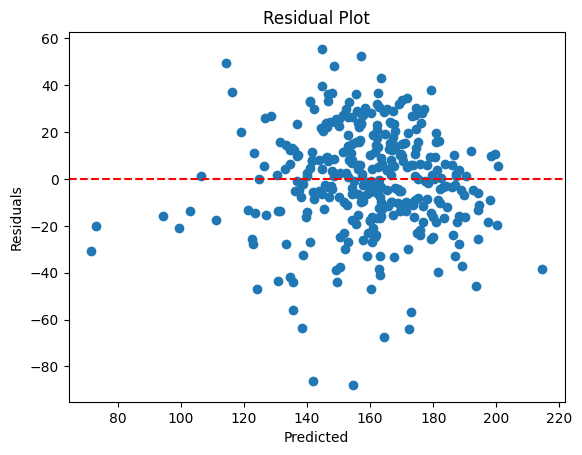

In [295]:
residuals_ridge = y_test_l2 - pred_ridge 
plt.scatter(pred_ridge , residuals_ridge)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [296]:
mse = mean_squared_error(y_test_l2,  pred_ridge)
r2 = r2_score(y_test_l2,  pred_ridge)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 493.6507592085783
R-squared: 0.434585028470836


## KNN 

In [5]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [306]:
y_knn = weather_yield_table_copy['Value']
X_knn  = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)

In [307]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn , test_size=0.2, random_state=24)

In [309]:
y_train_knn.describe()

count    1341.000000
mean      159.004922
std        29.465367
min        30.100000
25%       144.500000
50%       161.200000
75%       179.300000
max       227.000000
Name: Value, dtype: float64

In [310]:
y_test_knn.describe()

count    336.000000
mean     159.460417
std       29.591943
min       41.000000
25%      145.375000
50%      162.700000
75%      180.425000
max      217.200000
Name: Value, dtype: float64

In [315]:
X_train_knn.shape

(1341, 77)

In [394]:
pca = PCA(n_components=41)  # Set the number of components to reduce to
X_train_pca = pca.fit_transform(X_train_knn, y_train_knn)
X_test_pca = pca.transform(X_test_knn)

In [395]:

knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [5, 10, 15, 20, 30], # Number of neighbors
}


In [396]:
grid_search_knn = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_pca, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 30]},
             scoring='neg_mean_squared_error')

In [397]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [398]:
# Make predictions on the testing data using the best model
best_model = grid_search_knn.best_estimator_
pred_knn = best_model.predict(X_test_pca)

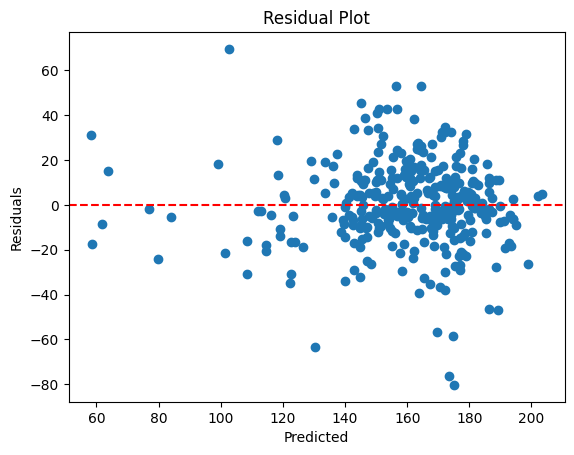

In [399]:
residuals_knn = y_test_knn - pred_knn
plt.scatter(pred_knn , residuals_knn)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [400]:
mse = mean_squared_error(y_test_knn , pred_knn)
r2 = r2_score(y_test_knn,  pred_knn)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 368.62904761904764
R-squared: 0.5777817038132396


## SVM

## Train, Validation, Test

In [160]:
weather_cleaned = pd.read_csv("final_cleaned_data/weather_yield_x_normalize.csv").drop(columns=["Unnamed: 0"], axis=1)

In [161]:
training = weather_cleaned.copy()

In [162]:
def columns_with_mostly_zeros(df, threshold=0.95):
    """
    Get columns where 95% or more of the values are zero.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - threshold: float, optional (default=0.95)
        The threshold percentage for determining if a column contains mostly zeros.

    Returns:
    - list
        A list of column names where 95% or more of the values are zero.
    """
    # Calculate the percentage of zeros in each column
    zero_counts = (df == 0).mean()

    # Filter columns where the percentage of zeros exceeds the threshold
    mostly_zeros_columns = zero_counts[zero_counts >= threshold].index.tolist()

    return mostly_zeros_columns


In [163]:
# Assuming df is your DataFrame
mostly_zeros_columns = columns_with_mostly_zeros(training)
print("Columns with 95% or more zeros:", mostly_zeros_columns)

Columns with 95% or more zeros: ['DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9', 'DT00_10', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9', 'DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9', 'DX32_10', 'DX90_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9', 'EMSD_10', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 'SNOW_9', 'SNOW_10']


In [164]:
#training_v2 = training.drop(columns=columns_with_one_unique_value, axis=1)

training_v2 = training.drop(columns=mostly_zeros_columns, axis=1)

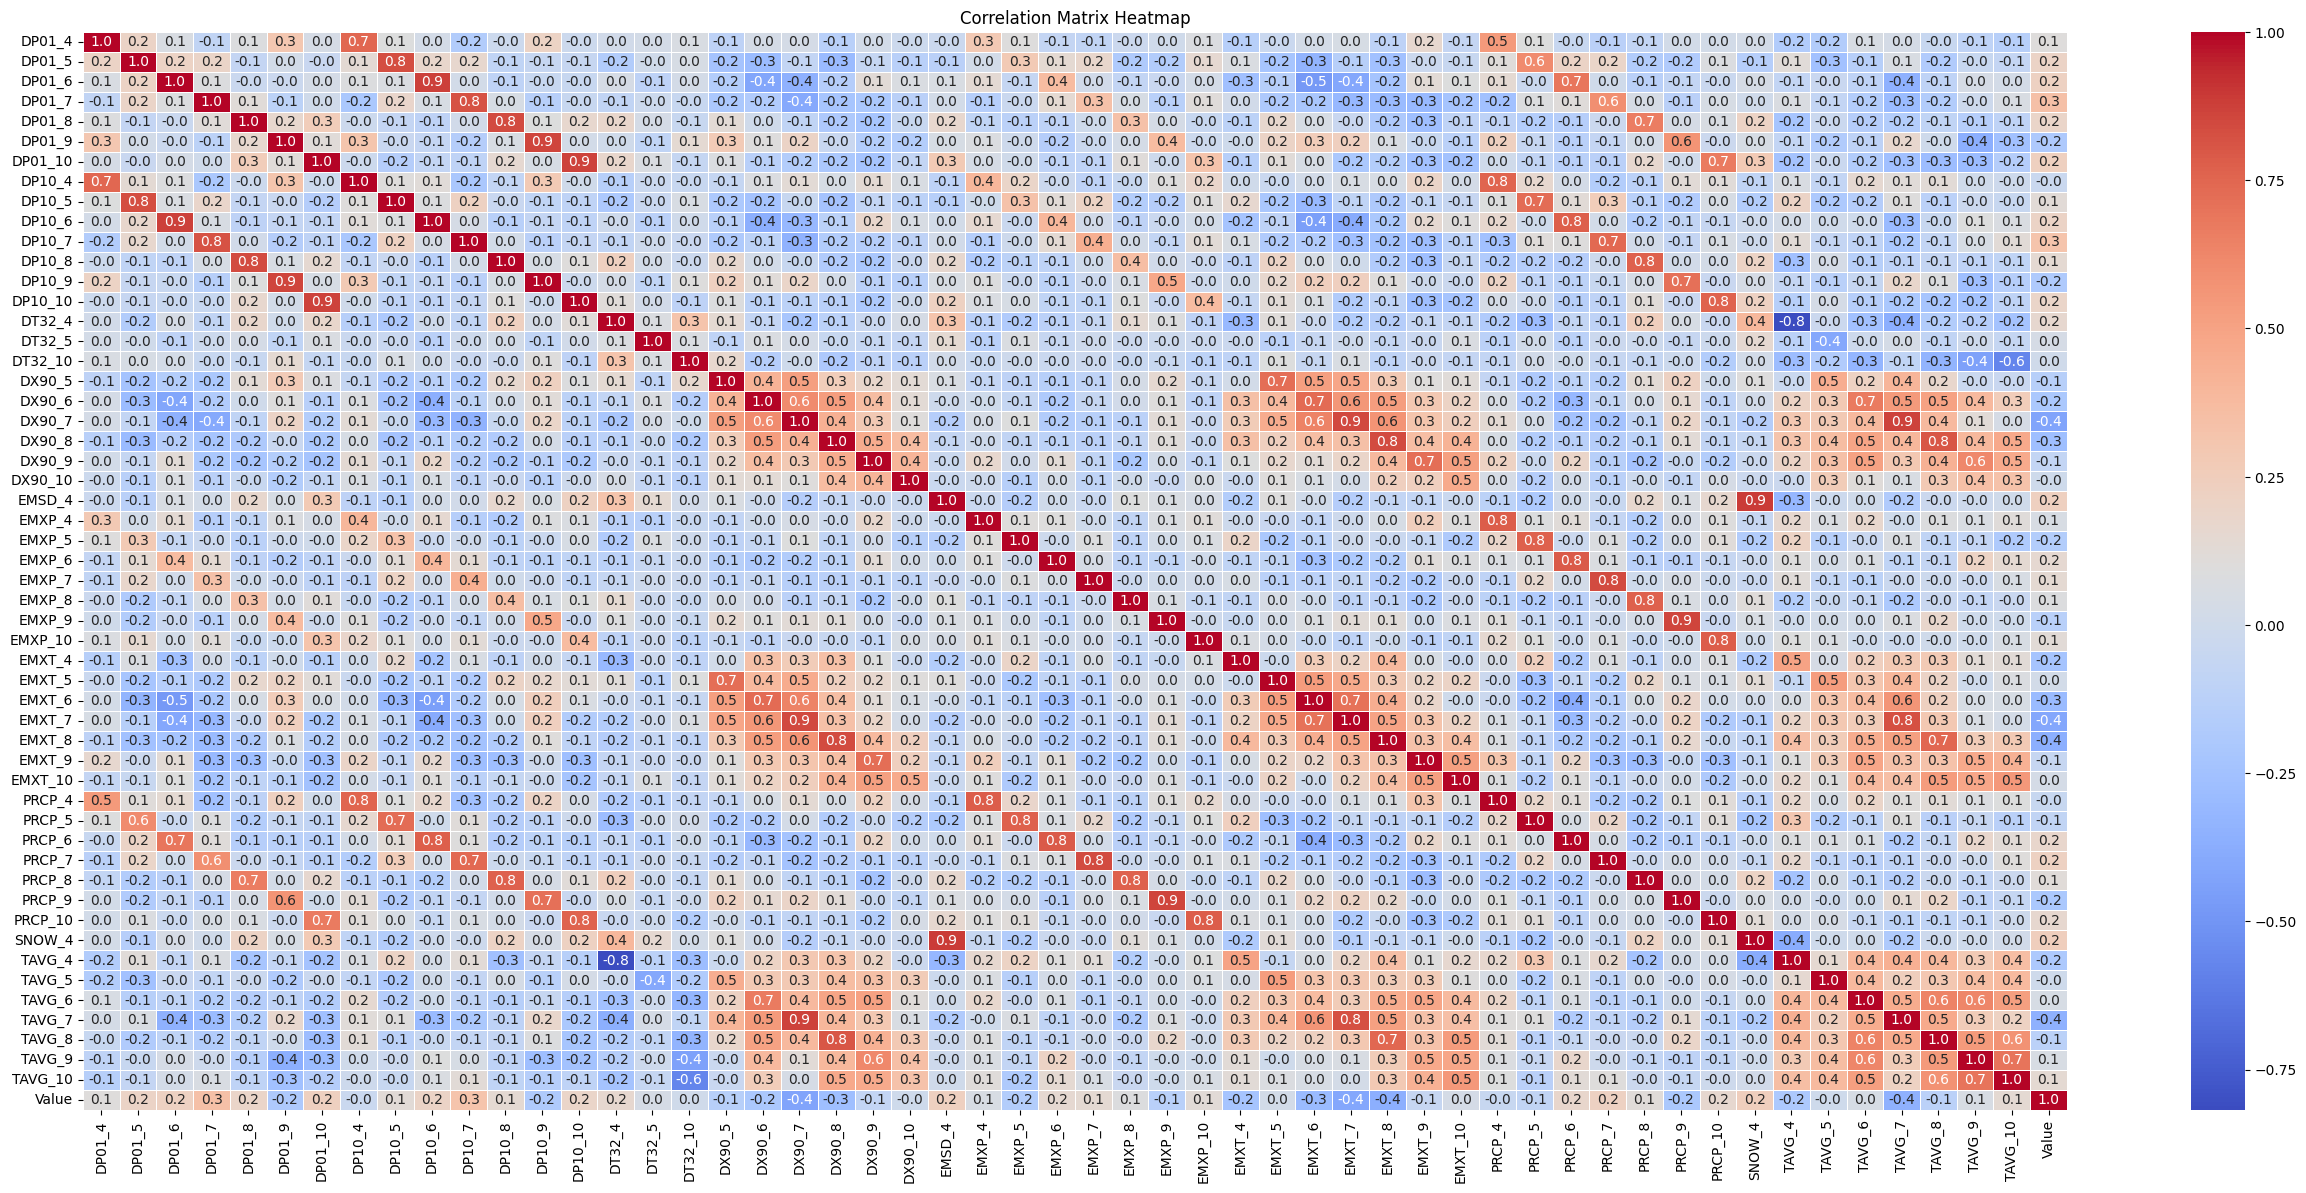

In [165]:
correlation = training_v2.drop(columns=["County", "Year"], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation.corr()

# Create a heatmap
plt.figure(figsize=(32, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [198]:
training_years = [2002, 2003, 2004, 2005, 2006, 2007,  2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019,  2021, 2022]
hold_out_years = [2008,2014, 2020]


train_rows_bool = training_v2['Year'].isin(training_years)
hold_rows_bool = training_v2['Year'].isin(hold_out_years)

train_rows = training_v2[train_rows_bool]
hold_rows = training_v2[hold_rows_bool]

y = train_rows["Value"]

In [199]:
print(train_rows.shape)
print(hold_rows.shape)

(1424, 56)
(253, 56)


In [200]:
county = train_rows["County"]
year = train_rows["Year"]

X = train_rows.drop(columns=["County", "Year", "Value"], axis=1)

county_hold = hold_rows["County"]
year_hold = hold_rows["Year"]


y_hold = hold_rows["Value"]
X_hold= hold_rows.drop(columns=["County", "Year", "Value"], axis=1)


In [201]:
X_hold.shape

(253, 53)

In [202]:
X.shape

(1424, 53)

In [203]:
X.columns

Index(['DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 'DP01_9', 'DP01_10',
       'DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10',
       'DT32_4', 'DT32_5', 'DT32_10', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8',
       'DX90_9', 'DX90_10', 'EMSD_4', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7',
       'EMXP_8', 'EMXP_9', 'EMXP_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7',
       'EMXT_8', 'EMXT_9', 'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7',
       'PRCP_8', 'PRCP_9', 'PRCP_10', 'SNOW_4', 'TAVG_4', 'TAVG_5', 'TAVG_6',
       'TAVG_7', 'TAVG_8', 'TAVG_9', 'TAVG_10'],
      dtype='object')

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

## Normalization

In [205]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [206]:
columns_mode = [
'DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 
                'DP01_9', 'DP01_10', 'DP10_4', 'DP10_5', 
                'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10',
'DT32_4', 'DT32_5', 
 'DT32_10',   'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 
                            'DX90_9', 'DX90_10',  'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 
                            
                            'EMSD_4',   
                            
                            'EMXP_9', 'EMXP_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 
                'PRCP_9', 'PRCP_10', 'SNOW_4',  ]


columns_mean = [
                'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 
                'EMXT_9', 'EMXT_10',  'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 
                'TAVG_9', 'TAVG_10' ]

In [207]:
X_skewed_train = X_train[columns_mode]
X_normal_train = X_train[columns_mean]

X_skewed_test = X_test[columns_mode]
X_normal_test = X_test[columns_mean]

X_skewed_hold = X_hold[columns_mode]
X_normal_hold = X_hold[columns_mean]


In [208]:
X_skewed_train.shape

(1139, 39)

In [209]:
X_normal_train.shape

(1139, 14)

In [210]:
scaler = StandardScaler()
scaler.fit(X_normal_train)

StandardScaler()

In [211]:

X_normal_train_scaled = pd.DataFrame(scaler.transform(X_normal_train), columns=columns_mean)
X_normal_test_scaled = pd.DataFrame(scaler.transform(X_normal_test), columns=columns_mean)
X_normal_hold_scaled = pd.DataFrame(scaler.transform(X_normal_hold), columns=columns_mean)

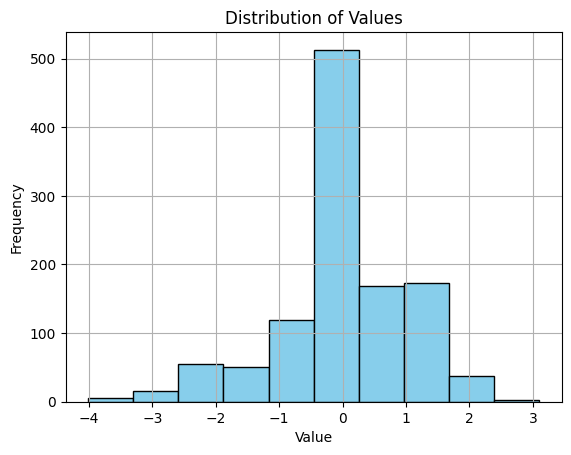

In [212]:
# Plot distribution using Matplotlib
plt.hist(X_normal_train_scaled['EMXT_4'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

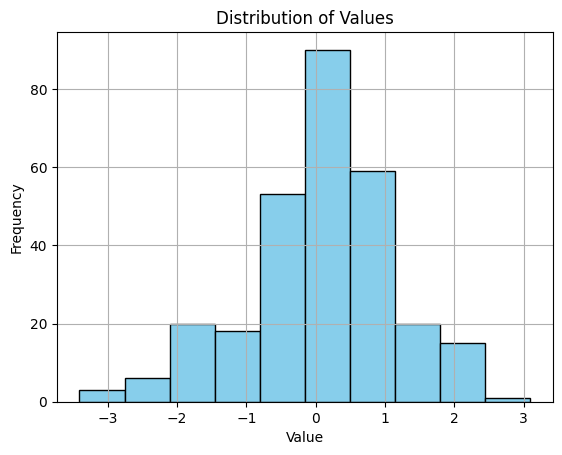

In [213]:
# Plot distribution using Matplotlib
plt.hist(X_normal_test_scaled['EMXT_4'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

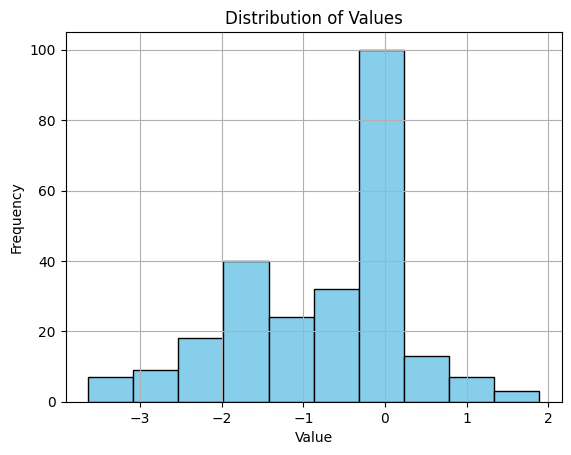

In [214]:
# Plot distribution using Matplotlib
plt.hist(X_normal_hold_scaled['EMXT_4'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [215]:
'''
X_skewed_train = X_train[columns_mode]
X_normal_train = X_train[columns_mean]

X_skewed_test = X_test[columns_mode]
X_normal_test = X_test[columns_mean]

X_skewed_hold = X_hold[columns_mode]
X_normal_hold = X_hold[columns_mean]
'''

'\nX_skewed_train = X_train[columns_mode]\nX_normal_train = X_train[columns_mean]\n\nX_skewed_test = X_test[columns_mode]\nX_normal_test = X_test[columns_mean]\n\nX_skewed_hold = X_hold[columns_mode]\nX_normal_hold = X_hold[columns_mean]\n'

In [216]:

from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
r_scaler.fit(X_skewed_train)


X_skewed_train_scaled = pd.DataFrame(r_scaler.transform(X_skewed_train), columns=columns_mode)
X_skewed_test_scaled = pd.DataFrame(r_scaler.transform(X_skewed_test), columns=columns_mode)
X_skewed_hold_scaled = pd.DataFrame(r_scaler.transform(X_skewed_hold), columns=columns_mode)


X_skewed_train_scaled_index= X_skewed_train_scaled.reset_index(drop=True)
X_skewed_test_scaled_index= X_skewed_test_scaled.reset_index(drop=True)
X_skewed_hold_scaled_index= X_skewed_hold_scaled.reset_index(drop=True)


In [217]:
X_skewed_train.describe()

DP01_4       DP01_5       DP01_6       DP01_7       DP01_8  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean     11.377024    12.574057    10.920258    10.117702     8.770703   
std       3.052115     3.433613     3.305058     2.647869     2.500396   
min       2.000000     3.000000     2.000000     2.000000     2.000000   
25%       9.309524    10.854167     8.792857     8.200000     7.000000   
50%      11.400000    13.000000    11.000000    10.200000     8.666667   
75%      13.148352    15.000000    13.200000    12.000000    10.333333   
max      21.400000    22.285714    19.500000    19.000000    17.142857   

            DP01_9      DP01_10       DP10_4       DP10_5       DP10_6  ...  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000  ...   
mean      8.166230     9.708269     7.675047     8.638527     7.500460  ...   
std       3.263245     3.490955     2.444444     2.732993     2.732767  ...   
min       0.000000     2.000000     0.000000     2.000000     0.500000  ...   
25%       6.000000     7.000000     6.000000     6.666667     5.651515  ...   
50%       8.000000     9.571429     7.500000     9.000000     7.500000  ...   
75%      10.000000    12.000000     9.000000    10.600000     9.000000  ...   
max      21.000000    20.722222    16.000000    15.666667    16.000000  ...   

            EMXP_9      EMXP_10       PRCP_4       PRCP_5       PRCP_6  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean     35.413961    32.704640   110.639932   123.952491   121.365764   
std      23.250656    17.815966    57.346860    53.475116    62.750162   
min       0.000000     3.600000     4.400000    17.650000     4.220000   
25%      18.585714    20.083333    74.384615    82.850000    76.234722   
50%      30.900000    29.200000   100.437500   122.945833   112.016667   
75%      46.040000    41.400000   133.466667   158.975000   156.050000   
max     148.600000   131.016667   384.800000   338.900000   377.320000   

            PRCP_7       PRCP_8       PRCP_9      PRCP_10       SNOW_4  
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000  
mean    115.645766    93.285270    87.454221    87.962786     8.263789  
std      58.457265    51.095609    56.643530    46.844679    22.470523  
min       7.700000     6.700000     0.000000     7.066667     0.000000  
25%      73.832857    56.200000    43.735714    50.075000     0.000000  
50%     105.522222    84.666667    75.475000    83.680000     0.000000  
75%     147.712500   120.350000   123.033333   114.191667     0.000000  
max     430.433333   321.066667   311.800000   239.200000   194.000000  

[8 rows x 39 columns]

In [218]:
X_skewed_train_scaled_index.describe()

DP01_4       DP01_5       DP01_6       DP01_7       DP01_8  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean     -0.005985    -0.102740    -0.018094    -0.021657     0.031211   
std       0.795064     0.828208     0.749932     0.696808     0.750119   
min      -2.448664    -2.412060    -2.042139    -2.157895    -2.000000   
25%      -0.544561    -0.517588    -0.500810    -0.526316    -0.500000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.455439     0.482412     0.499190     0.473684     0.500000   
max       2.604962     2.239770     1.928687     2.315789     2.542857   

            DP01_9      DP01_10       DP10_4       DP10_5       DP10_6  ...  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000  ...   
mean      0.041557     0.027368     0.058349    -0.091900     0.000137  ...   
std       0.815811     0.698191     0.814815     0.694829     0.816120  ...   
min      -2.000000    -1.514286    -2.500000    -1.779661    -2.090498  ...   
25%      -0.500000    -0.514286    -0.500000    -0.593220    -0.552036  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.500000     0.485714     0.500000     0.406780     0.447964  ...   
max       3.250000     2.230159     2.833333     1.694915     2.538462  ...   

            EMXP_9      EMXP_10       PRCP_4       PRCP_5       PRCP_6  \
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean      0.164417     0.164408     0.172682     0.013224     0.117134   
std       0.846886     0.835776     0.970631     0.702465     0.786192   
min      -1.125507    -1.200938    -1.625494    -1.383196    -1.350577   
25%      -0.448538    -0.427678    -0.440961    -0.526710    -0.448309   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.551462     0.572322     0.559039     0.473290     0.551691   
max       4.287127     4.776388     4.813010     2.836836     3.323967   

            PRCP_7       PRCP_8       PRCP_9      PRCP_10       SNOW_4  
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000  
mean      0.137028     0.134351     0.151067     0.066797     8.263789  
std       0.791250     0.796502     0.714316     0.730616    22.470523  
min      -1.324075    -1.215381    -0.951794    -1.194905     0.000000  
25%      -0.428932    -0.443752    -0.400255    -0.524123     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.571068     0.556248     0.599745     0.475877     0.000000  
max       4.397844     3.685113     2.980228     2.425578   194.000000  

[8 rows x 39 columns]

In [219]:
'''
X_skewed_train_index= X_skewed_train.reset_index(drop=True)
X_skewed_test_index= X_skewed_test.reset_index(drop=True)
X_skewed_hold_index= X_skewed_hold.reset_index(drop=True)
'''

'\nX_skewed_train_index= X_skewed_train.reset_index(drop=True)\nX_skewed_test_index= X_skewed_test.reset_index(drop=True)\nX_skewed_hold_index= X_skewed_hold.reset_index(drop=True)\n'

In [220]:

X_train_scaled = pd.concat([X_normal_train_scaled , X_skewed_train_scaled_index], axis=1)
X_test_scaled= pd.concat([X_normal_test_scaled , X_skewed_test_scaled_index], axis=1)
X_hold_scaled= pd.concat([X_normal_hold_scaled, X_skewed_hold_scaled_index], axis=1)


'''
X_train_scaled = pd.concat([X_normal_train_scaled , X_skewed_train], axis=1)
X_test_scaled= pd.concat([X_normal_test_scaled , X_skewed_test], axis=1)
X_hold_scaled= pd.concat([X_normal_hold_scaled, X_skewed_hold], axis=1)
'''

'\nX_train_scaled = pd.concat([X_normal_train_scaled , X_skewed_train], axis=1)\nX_test_scaled= pd.concat([X_normal_test_scaled , X_skewed_test], axis=1)\nX_hold_scaled= pd.concat([X_normal_hold_scaled, X_skewed_hold], axis=1)\n'

In [221]:

X_train_scaled.shape

(1139, 53)

## Random Forest

In [222]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search_rf.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [223]:
# Get the best parameters and best score
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 16.95819900603412


In [224]:
# Get the best estimator
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions_rf = best_rf_model.predict(X_test_scaled)

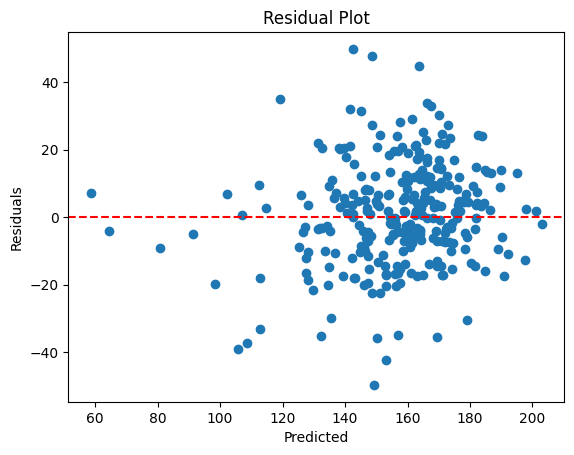

In [225]:
residuals_rf = y_test - best_predictions_rf
plt.scatter(best_predictions_rf, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [226]:
mse = mean_squared_error(y_test , best_predictions_rf)
r2 = r2_score(y_test, best_predictions_rf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 237.00086818421062
R-squared: 0.6907110338367184


## Testing 

In [227]:
best_predictions_rf_hold = best_rf_model.predict(X_hold_scaled)

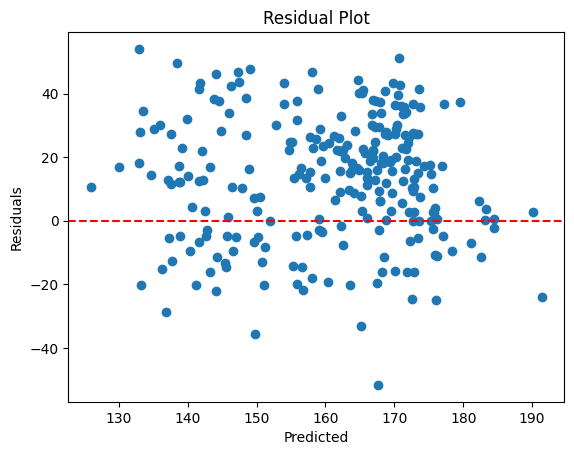

In [228]:
residuals_rf_hold = y_hold - best_predictions_rf_hold
plt.scatter(best_predictions_rf_hold, residuals_rf_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [230]:
mse = mean_squared_error(y_hold , best_predictions_rf_hold)
r2 = r2_score(y_hold, best_predictions_rf_hold)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 546.1815441422926
R-squared: -0.009269331930239932


## Random Forest Feature Importance

In [436]:
#best_rf_model = grid_search_rf.best_estimator_


# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")

Feature ranking:
1. Feature 17: 0.16816193099662993
2. Feature 52: 0.07632392025286223
3. Feature 27: 0.040838294937752866
4. Feature 46: 0.040416610861105214
5. Feature 20: 0.03816443383737736
6. Feature 47: 0.03727875864946679
7. Feature 1: 0.03656055036520337
8. Feature 19: 0.0265624671991816
9. Feature 24: 0.026278643511526718
10. Feature 41: 0.023166340039714035
11. Feature 16: 0.022373121478320435
12. Feature 48: 0.021708526618784738
13. Feature 49: 0.02079031907074719
14. Feature 43: 0.019780750212746577
15. Feature 23: 0.019761538091316713
16. Feature 8: 0.01968372824120221
17. Feature 4: 0.018930787446271496
18. Feature 39: 0.0166866830908667
19. Feature 38: 0.016366959988432708
20. Feature 22: 0.016151019872617182
21. Feature 37: 0.01544909132103249
22. Feature 44: 0.01471826347085907
23. Feature 45: 0.013875145408523679
24. Feature 14: 0.01382806106725986
25. Feature 15: 0.013763698281450694
26. Feature 0: 0.013469052805376223
27. Feature 13: 0.01289827179097883
28. Feature 

In [437]:
for index, col in enumerate(X_test_scaled.columns):
    print(f"Index {index}: {col}")

Index 0: EMXT_4
Index 1: EMXT_5
Index 2: EMXT_6
Index 3: EMXT_7
Index 4: EMXT_8
Index 5: EMXT_9
Index 6: EMXT_10
Index 7: TAVG_4
Index 8: TAVG_5
Index 9: TAVG_6
Index 10: TAVG_7
Index 11: TAVG_8
Index 12: TAVG_9
Index 13: TAVG_10
Index 14: DP01_4
Index 15: DP01_5
Index 16: DP01_6
Index 17: DP01_7
Index 18: DP01_8
Index 19: DP01_9
Index 20: DP01_10
Index 21: DP10_4
Index 22: DP10_5
Index 23: DP10_6
Index 24: DP10_7
Index 25: DP10_8
Index 26: DP10_9
Index 27: DP10_10
Index 28: DT32_4
Index 29: DT32_5
Index 30: DT32_10
Index 31: DX90_5
Index 32: DX90_6
Index 33: DX90_7
Index 34: DX90_8
Index 35: DX90_9
Index 36: DX90_10
Index 37: EMXP_4
Index 38: EMXP_5
Index 39: EMXP_6
Index 40: EMXP_7
Index 41: EMXP_8
Index 42: EMSD_4
Index 43: EMXP_9
Index 44: EMXP_10
Index 45: PRCP_4
Index 46: PRCP_5
Index 47: PRCP_6
Index 48: PRCP_7
Index 49: PRCP_8
Index 50: PRCP_9
Index 51: PRCP_10
Index 52: SNOW_4


## Gradient Boosting

In [231]:
from sklearn.ensemble import GradientBoostingRegressor

In [232]:
# Create a Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [233]:
# Perform grid search with 5-fold cross-validation
grid_search_gb = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [234]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters:", best_params_gb)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [235]:
# Make predictions on the testing data using the best model
best_params_gb = grid_search_gb.best_estimator_
gb_pred = best_params_gb.predict(X_test_scaled)

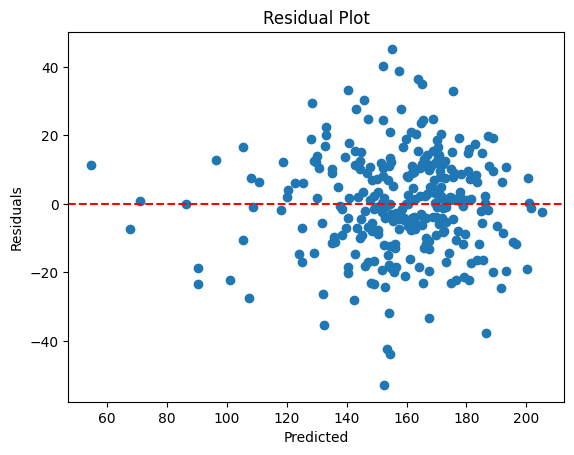

In [236]:
residuals_gb = y_test - gb_pred
plt.scatter(gb_pred, residuals_gb)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [237]:
mse = mean_squared_error(y_test , gb_pred)
r2 = r2_score(y_test, gb_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 225.8482354545562
R-squared: 0.7052653528709953


## Validation for GB

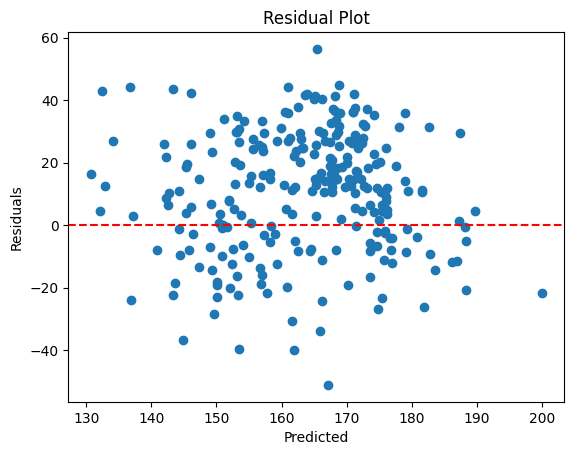

In [238]:
best_predictions_gb_hold = best_params_gb.predict(X_hold_scaled)

residuals_gb_hold = y_hold - best_predictions_gb_hold
plt.scatter(best_predictions_gb_hold, residuals_gb_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [239]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold )
r2 = r2_score(y_hold, best_predictions_gb_hold)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 493.4479409160006
R-squared: 0.08817520655568245


## Model is overfitting

To address overfitting and improve the model's performance on unseen data, consider the following strategies:

Simplify the Model: Reduce the complexity of the model by decreasing the number of parameters, reducing the model's capacity, or using regularization techniques.

Feature Selection: Select only the most relevant features that contribute significantly to the prediction task and discard irrelevant or redundant features.

Cross-Validation: Use cross-validation techniques such as k-fold cross-validation to obtain more reliable estimates of the model's performance and identify potential issues with overfitting.

Collect More Data: Increase the size of the training dataset to provide the model with more diverse examples and reduce the likelihood of overfitting.

## Undersampling technique (Not Working)

In [438]:
!pip install smogn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
'''
X_train_scaled 
X_test_scaled
X_hold_scaled

y_train
y_test
y_hold
'''

In [443]:
print(X_train_scaled.shape)
print(y_train.shape)

(1142, 53)
(1142,)


In [445]:
X_train_scaled_copy = X_train_scaled.reset_index(drop=True)
y_train_copy = y_train.reset_index(drop=True)

In [446]:
train_data = pd.concat([X_train_scaled_copy, y_train_copy], axis=1)

In [447]:
train_data

EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0    -0.034739  0.008862  0.126220  0.130346  0.012912 -0.158992 -0.089539   
1    -0.132409 -0.348414  0.378536 -1.108089 -0.120659 -2.034359 -2.363159   
2    -0.132409 -0.003347  1.285071  0.206693  3.518349  2.152124  1.937909   
3     0.823951  1.169883  1.738338  1.880051 -0.478062  0.765037 -1.266386   
4     1.851153  1.169883  2.191606  0.206693  0.594146 -0.067216  0.991674   
...        ...       ...       ...       ...       ...       ...       ...   
1137  0.221798 -1.176577 -1.929008 -0.809275 -1.160376 -0.924689 -0.900796   
1138  1.426104 -0.003347 -0.115938 -0.809275  0.984040  0.184982  1.464792   
1139 -0.034739  0.008862  0.126220  0.130346  0.012912 -0.158992 -0.089539   
1140 -1.690922 -0.003347 -0.527999 -1.765480 -0.120659  0.487619 -0.685742   
1141 -1.336715 -1.349111 -0.775236  0.385981  0.074288  0.765037  0.260493   

        TAVG_4    TAVG_5    TAVG_6  ...   EMXP_10    PRCP_4    PRCP_5  \
0    -0.059711 -0.019326 -0.136560  ... -0.455021 -0.701974 -0.148549   
1    -2.617992 -0.514665 -1.751284  ... -0.623972 -0.648808  0.322157   
2    -0.184027  1.422667  0.864668  ...  0.023334 -0.080666 -1.233698   
3    -0.235814  1.234315  0.864668  ... -0.760556 -0.297983  0.427672   
4    -0.391173  1.691741  0.777470  ... -0.201551 -0.401797 -1.218956   
...        ...       ...       ...  ...       ...       ...       ...   
1137  0.696343  1.368852 -0.704903  ...  0.000000 -0.081268  0.000000   
1138 -0.857251  1.099778 -0.356110  ... -0.078754 -0.165346 -1.276071   
1139 -0.059711 -0.019326 -0.136560  ... -0.883791 -0.500853 -0.603755   
1140  0.023119  0.400186  0.777470  ...  0.643155 -0.072238 -0.047258   
1141 -0.624212 -1.725497 -0.356110  ... -0.333974 -0.477308  0.269127   

        PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10    SNOW_4  Value  
0     0.389947  0.620142  0.284506  0.083469 -0.612790  0.000000  163.1  
1    -0.196672  0.825232  0.242391 -0.505750 -0.576691  5.000000  178.1  
2    -0.522888 -0.406673 -0.627260  0.144689  0.184875  0.750000  146.6  
3    -0.937307  0.133844  0.557677  0.031835 -0.874192  0.000000  196.8  
4    -0.784205 -0.599438  0.398398 -0.462116  0.017224  1.833333  154.0  
...        ...       ...       ...       ...       ...       ...    ...  
1137 -0.115782  0.000000  0.019046  0.001335  0.016183  0.000000  151.5  
1138 -0.138754 -0.329800  0.284506 -0.677296  0.142869  0.000000  179.3  
1139 -0.153638  0.022409  0.504690 -0.390140 -0.959691  0.000000  125.7  
1140  1.136083 -0.100353  0.260862  0.051064  0.753999  0.000000  213.6  
1141  0.230107 -0.390694 -0.806560 -0.011253 -0.381522  0.000000  150.0  

[1142 rows x 54 columns]

In [448]:
import smogn

In [449]:
data_smoter = smogn.smoter(
    data = train_data,
    y = 'Value'
)

r_index: 100%|##########| 47/47 [00:00<00:00, 101.11it/s]


In [450]:
data_smoter.shape

(1011, 54)

In [451]:
data_smoter

EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0   -0.034739  0.008862  0.126220  0.130346  0.012912 -0.158992 -0.089539   
3    0.823951  1.169883  1.738338  1.880051 -0.478062  0.765037 -1.266386   
4    1.851153  1.169883  2.191606  0.206693  0.594146 -0.067216  0.991674   
6    0.221798  0.410735  0.378536  0.505507  2.088739  0.739817  0.776621   
7    0.823951 -0.589962  0.378536  0.356100  0.269234  0.765037  0.518557   
..        ...       ...       ...       ...       ...       ...       ...   
435  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
436  0.266928  0.000000  0.000000  0.653601  1.373933  0.802312  0.260493   
437  0.646847  0.000000  0.000000  0.457100  0.000000  0.404188  0.000000   
438  0.911069  0.000000  0.000000  0.000000  1.552377  0.431444  0.701372   
439  0.934547  0.000000  0.000000  0.751869  2.208751  1.216720  0.033919   

       TAVG_4    TAVG_5    TAVG_6  ...   EMXP_10    PRCP_4    PRCP_5  \
0   -0.059711 -0.019326 -0.136560  ... -0.455021 -0.701974 -0.148549   
3   -0.235814  1.234315  0.864668  ... -0.760556 -0.297983  0.427672   
4   -0.391173  1.691741  0.777470  ... -0.201551 -0.401797 -1.218956   
6    2.353510  0.938334  2.259843  ... -0.780974 -0.683857  0.084098   
7    0.178478 -0.891368  1.213462  ... -0.307723 -0.256848  0.182262   
..        ...       ...       ...  ...       ...       ...       ...   
435  0.000000  0.216117  0.000000  ...  0.000000  0.000000  0.000000   
436  0.149886  0.000000  0.957536  ...  0.369993  0.228226  1.408174   
437  0.000000  0.000000  0.000000  ...  0.000000  0.144581  0.290359   
438  1.529121  0.609438  1.414668  ...  0.000000  0.000000  0.286996   
439  1.922202  0.000000  1.049732  ...  0.000000  0.943701  1.124349   

       PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10    SNOW_4       Value  
0    0.389947  0.620142  0.284506  0.083469 -0.612790  0.000000  163.100000  
3   -0.937307  0.133844  0.557677  0.031835 -0.874192  0.000000  196.800000  
4   -0.784205 -0.599438  0.398398 -0.462116  0.017224  1.833333  154.000000  
6    1.608484  0.550479 -0.970589 -0.675801 -0.947052  0.000000  164.900000  
7    2.956770  0.192302 -0.854832  0.520685 -0.388957  0.000000  138.000000  
..        ...       ...       ...       ...       ...       ...         ...  
435  2.712600  2.241462  0.000000  0.000000  0.000000  0.000000  108.201758  
436  0.000000  0.000000  0.000000  0.598027  0.134141  0.000000  113.047324  
437  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   93.275884  
438  1.561670  0.000000  0.000000  0.000000  0.000000  0.000000  129.949981  
439  0.000000  0.000000  0.000000  1.129668  0.112638  0.000000   81.679315  

[1011 rows x 54 columns]

In [463]:
for i in list(data_smoter.index):
    print(i)

0
3
4
6
7
8
9
10
11
12
13
15
18
20
21
23
28
30
31
33
35
37
38
39
40
41
43
45
46
48
49
52
53
56
62
66
70
71
72
76
80
88
93
95
99
101
103
105
107
108
109
113
116
117
118
119
121
122
125
128
133
134
135
137
140
141
142
145
146
149
150
151
152
154
156
159
160
162
163
166
167
168
169
173
175
176
180
184
187
188
189
191
193
195
196
198
200
201
202
203
205
207
208
209
210
211
212
216
220
223
224
225
229
231
232
233
234
236
237
239
241
243
247
249
251
252
253
254
256
264
269
272
274
275
277
278
282
283
284
286
287
288
295
296
297
299
302
303
304
306
310
311
314
317
322
323
332
335
337
338
341
343
344
345
347
348
349
351
352
356
359
360
362
363
367
368
369
371
374
375
377
378
380
381
384
385
386
387
388
390
394
395
397
398
399
402
404
407
408
411
412
414
415
418
420
425
426
427
429
431
432
435
438
440
441
444
446
448
454
455
457
461
462
463
465
466
468
470
472
473
475
476
477
480
481
483
485
486
487
488
489
492
494
497
501
502
503
504
505
511
512
513
516
521
522
523
527
528
529
532
533
534
536


In [452]:
y_train_under = data_smoter["Value"]
X_train_under = data_smoter.drop(columns = ["Value"], axis=1)

## Random Forest with undersampling 

In [453]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search_rf.fit(X_train_under, y_train_under)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [454]:
# Get the best parameters and best score
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 18.005164825988647


In [455]:
# Get the best estimator
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions_rf = best_rf_model.predict(X_test_scaled)

In [484]:
residuals_rf = y_test - best_predictions_rf
residuals_rf

1621     6.784093
288     -5.572340
1231    18.063842
359      2.304765
616     16.574500
          ...    
256      7.045333
434    -14.806000
80     -58.787500
631     -2.524000
981     27.281044
Name: Value, Length: 286, dtype: float64

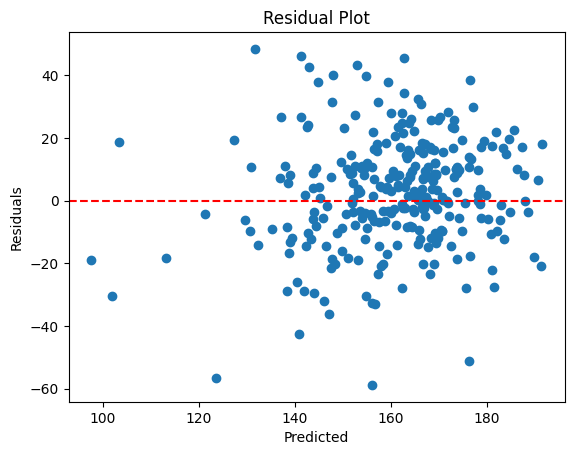

In [456]:
residuals_rf = y_test - best_predictions_rf
plt.scatter(best_predictions_rf, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [457]:
mse = mean_squared_error(y_test , best_predictions_rf)
r2 = r2_score(y_test, best_predictions_rf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 313.3132937141288
R-squared: 0.48006270598348333


## Testing with Undersampling

In [458]:
best_predictions_rf_hold = best_rf_model.predict(X_hold_scaled)

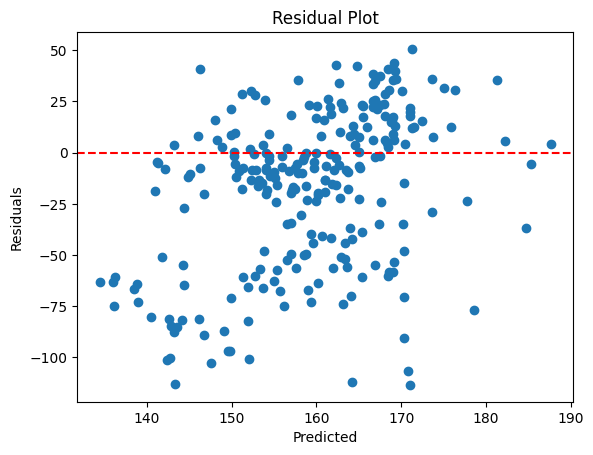

In [459]:
residuals_rf_hold = y_hold - best_predictions_rf_hold
plt.scatter(best_predictions_rf_hold, residuals_rf_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [460]:
mse = mean_squared_error(y_hold , best_predictions_rf_hold)
r2 = r2_score(y_hold, best_predictions_rf_hold)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1765.7131862425017
R-squared: 0.04073524368746417


## Neural Network

In [1839]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## FeedForward NN (Multiple Perceptron)

In [1840]:
X_train_scaled.shape

(1140, 53)

In [1841]:
# Shallow layer old script


'''
# Define the architecture of the feedforward neural network
def build_model(input_shape, learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with linear activation for regression
    ])
    # Define optimizer with specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    # Compile the model with the optimizer and loss function
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the learning rate
learning_rate = 0.01

# Build the model with specified learning rate
input_shape = X_train_scaled.shape[1:]
model = build_model(input_shape, learning_rate)


# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    verbose=1             # Verbosity mode
)

# Train the model with early stopping callback
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


'''

"\n# Define the architecture of the feedforward neural network\ndef build_model(input_shape, learning_rate):\n    model = keras.Sequential([\n        layers.Dense(64, activation='relu', input_shape=input_shape),\n        layers.Dense(32, activation='relu'),\n        layers.Dense(1)  # Output layer with linear activation for regression\n    ])\n    # Define optimizer with specified learning rate\n    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)\n    # Compile the model with the optimizer and loss function\n    model.compile(optimizer=optimizer, loss='mean_squared_error')\n    return model\n\n# Define the learning rate\nlearning_rate = 0.01\n\n# Build the model with specified learning rate\ninput_shape = X_train_scaled.shape[1:]\nmodel = build_model(input_shape, learning_rate)\n\n\n# Define early stopping callback\nearly_stopping = keras.callbacks.EarlyStopping(\n    monitor='val_loss',  # Monitor validation loss\n    patience=5,           # Number of epochs with no imp

In [1842]:
# Set random seed for reproducibility
np.random.seed(77)
tf.random.set_seed(77)

In [1843]:
# Unstable performance 


'''

def build_model(input_shape, learning_rate):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(0.2),  # Adding dropout for regularization
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),  # Adding dropout for regularization
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),  # Adding dropout for regularization
        layers.Dense(1)  # Output layer with linear activation for regression
    ])
    # Define optimizer with specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    # Compile the model with the optimizer and loss function
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Re-define the learning rate
learning_rate = 0.005

# Re-build the model with adjusted architecture
input_shape = X_train_scaled.shape[1:]
model = build_model(input_shape, learning_rate)

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1             # Verbosity mode
)

# Train the model with early stopping callback
model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

'''


"\n\ndef build_model(input_shape, learning_rate):\n    model = keras.Sequential([\n        layers.Dense(128, activation='relu', input_shape=input_shape),\n        layers.Dropout(0.2),  # Adding dropout for regularization\n        layers.Dense(64, activation='relu'),\n        layers.Dropout(0.2),  # Adding dropout for regularization\n        layers.Dense(32, activation='relu'),\n        layers.Dropout(0.2),  # Adding dropout for regularization\n        layers.Dense(1)  # Output layer with linear activation for regression\n    ])\n    # Define optimizer with specified learning rate\n    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)\n    # Compile the model with the optimizer and loss function\n    model.compile(optimizer=optimizer, loss='mean_squared_error')\n    return model\n\n# Re-define the learning rate\nlearning_rate = 0.005\n\n# Re-build the model with adjusted architecture\ninput_shape = X_train_scaled.shape[1:]\nmodel = build_model(input_shape, learning_rate)\n\

In [1844]:
input_shape = X_train_scaled.shape[1:]
input_shape

(53,)

In [1845]:

from tensorflow.keras import regularizers

In [1870]:
# Unstable result


def build_model(input_shape, learning_rate, l1_penalty, l2_penalty):
    model = keras.Sequential([
        #layers.Dense(64, activation='relu', input_shape=input_shape),
        #layers.Dropout(0.2),  # Adding dropout for regularization
        layers.Dense(32, activation='relu', input_shape=input_shape),
        layers.Dropout(0.2),  # Adding dropout for regularization
        layers.Dense(1)  # Output layer with linear activation for regression
    ])
    # Define optimizer with specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    # Compile the model with the optimizer and loss function
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Re-define the learning rate and penalty strengths
learning_rate = 0.005
l1_penalty = 0.001  # Adjust the L1 regularization strength as needed
l2_penalty = 0.001  # Adjust the L2 regularization strength as needed

# Re-build the model with adjusted architecture and regularization
input_shape = X_train_scaled.shape[1:]
model = build_model(input_shape, learning_rate, l1_penalty, l2_penalty)

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,           # Number of epochs with no improvement after which training will be stopped
    verbose=1             # Verbosity mode
)

# Train the model with early stopping callback
model.fit(X_train_scaled, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/150


15/15 [==============================] - 3s 34ms/step - loss: 25937.5527 - val_loss: 23747.2988
Epoch 2/150
15/15 [==============================] - 0s 7ms/step - loss: 23181.4453 - val_loss: 21337.9531
Epoch 3/150
15/15 [==============================] - 0s 7ms/step - loss: 21025.4492 - val_loss: 19743.0410
Epoch 4/150
15/15 [==============================] - 0s 8ms/step - loss: 19492.3242 - val_loss: 18490.3945
Epoch 5/150
15/15 [==============================] - 0s 7ms/step - loss: 17908.1758 - val_loss: 16827.7637
Epoch 6/150
15/15 [==============================] - 0s 7ms/step - loss: 16297.7744 - val_loss: 14895.2676
Epoch 7/150
15/15 [==============================] - 0s 7ms/step - loss: 14042.1865 - val_loss: 12863.9521
Epoch 8/150
15/15 [==============================] - 0s 7ms/step - loss: 12060.4902 - val_loss: 10903.0391
Epoch 9/150
15/15 [==============================] - 0s 6ms/step - loss: 10195.0098 - val_loss: 9162.3555
Epoch 10/150
15/15 [=============================

In [1871]:
ff_pred = model.predict(X_test_scaled)

9/9 [==============================] - 0s 3ms/step


In [1872]:
type(ff_pred)

numpy.ndarray

In [1873]:
type(y_test)

pandas.core.series.Series

In [1874]:
y_test.shape

(285,)

In [1875]:
ff_pred_series = pd.Series(ff_pred.flatten()) 

In [1876]:
ff_pred_series.shape

(285,)

In [1877]:
y_test_ff = y_test.reset_index(drop=True)

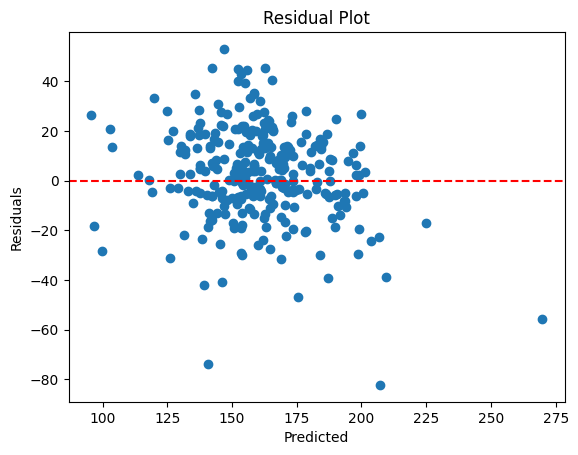

In [1878]:
residuals_ff = y_test_ff - ff_pred_series

plt.scatter(ff_pred_series, residuals_ff)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1879]:
mse = mean_squared_error(y_test_ff , ff_pred_series)
r2 = r2_score(y_test_ff, ff_pred_series)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 362.49482979571667
R-squared: 0.4500600628187803


## Testing with FF

In [1880]:
best_predictions_ff_hold = model.predict(X_hold_scaled)

8/8 [==============================] - 0s 2ms/step


In [1881]:
ff_pred_hol_series = pd.Series(best_predictions_ff_hold.flatten()) 

In [1882]:
y_hold_ff = y_hold.reset_index(drop=True)

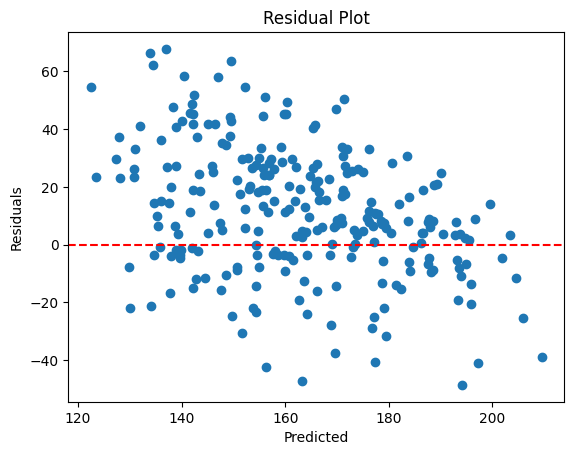

In [1883]:
residuals_ff_hold = y_hold_ff - ff_pred_hol_series
plt.scatter(ff_pred_hol_series, residuals_ff_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1884]:
mse = mean_squared_error(y_hold_ff , ff_pred_hol_series)
r2 = r2_score(y_hold_ff, ff_pred_hol_series)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 619.7778606463975
R-squared: -0.14526533177177448


## RNN

In [1689]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [1685]:
from tensorflow.keras.layers import SimpleRNN, Dense

In [1694]:
# Convert DataFrames to NumPy arrays
X_train = X_train_scaled.to_numpy().reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
#y_train_np = y_train.to_numpy()

type(X_train)


numpy.ndarray

In [1745]:


# Define the RNN model
def build_rnn_model(input_shape):
    model = keras.Sequential([
        SimpleRNN(64, input_shape=input_shape, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    return model



# Reshape input data for RNN (batch_size, time_steps, features)
X_train_rnn = X_train_scaled.to_numpy().reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

# Build the RNN model
model = build_rnn_model(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Once trained, you can use the model to make predictions
# For example, given new sequential data X_test, you can predict the target values
# y_pred = model.predict(X_test)


Epoch 1/50
36/36 [==============================] - 5s 5ms/step - loss: 25421.5332
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 21246.5234
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 16885.7598
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 11572.2627
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 7027.8965
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 4931.9536
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 4064.1182
Epoch 8/50
36/36 [==============================] - 0s 3ms/step - loss: 3477.3044
Epoch 9/50
36/36 [==============================] - 0s 3ms/step - loss: 2965.7783
Epoch 10/50
36/36 [==============================] - 0s 3ms/step - loss: 2579.9714
Epoch 11/50
36/36 [==============================] - 0s 3ms/step - loss: 2262.2275
Epoch 12/50
36/36 [==============================] - 0s 3ms/step - loss: 2001.7920
Epoch 13/

In [1746]:
# Convert DataFrame to NumPy array and reshape
X_test_rnn = X_test_scaled.to_numpy().reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Predict using the trained model
y_pred_rnn = model.predict(X_test_rnn)

9/9 [==============================] - 1s 5ms/step


In [1749]:
y_pred_rnn_series = pd.Series(y_pred_rnn.flatten()) 

In [1753]:
y_test_rnn = y_test.reset_index(drop=True)

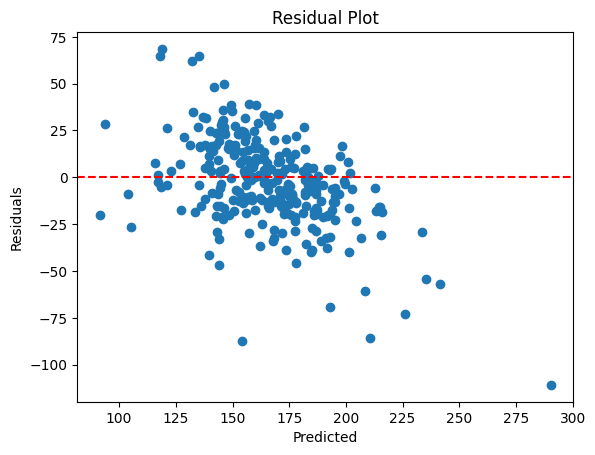

In [1754]:
residuals_rnn = y_test_rnn - y_pred_rnn_series

plt.scatter(y_pred_rnn_series, residuals_rnn)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1755]:
mse = mean_squared_error(y_test_rnn , y_pred_rnn_series)
r2 = r2_score(y_test_rnn, y_pred_rnn_series)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 575.6665669558012
R-squared: 0.04469257103443525


## Testing with RNN

In [1762]:
# Convert DataFrame to NumPy array and reshape
X_hold_rnn = X_hold_scaled.to_numpy().reshape((X_hold_scaled.shape[0], 1, X_hold_scaled.shape[1]))

# Predict using the trained model
y_pred_hold_rnn = pd.Series(model.predict(X_hold_rnn).flatten())

8/8 [==============================] - 0s 5ms/step


In [1764]:
y_hold_rnn = y_hold.reset_index(drop=True)

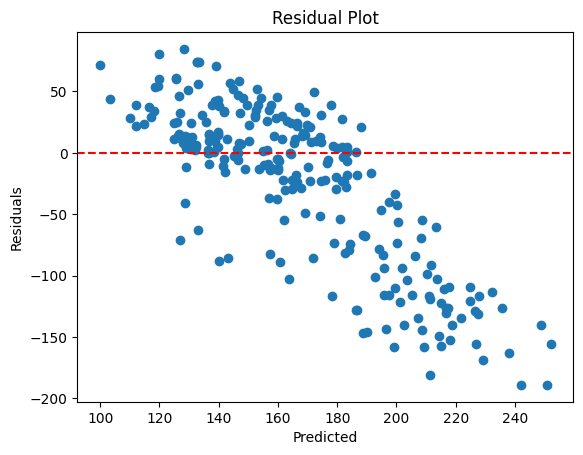

In [1765]:
residuals_rnn_hold = y_hold_rnn - y_pred_hold_rnn
plt.scatter(y_pred_hold_rnn, residuals_rnn_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1767]:
mse = mean_squared_error(y_hold_rnn , y_pred_hold_rnn)
r2 = r2_score(y_hold_rnn, y_pred_hold_rnn)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4850.65292828121
R-squared: -1.6352300223266925


## XGBoost

In [240]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [241]:
import xgboost as xgb

In [242]:
# Define the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [243]:
# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [244]:
# Get the best hyperparameters and model
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters:", best_params_xgb)
best_model_xgb = grid_search_xgb.best_estimator_

xgb_pred = best_model_xgb.predict(X_test_scaled)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


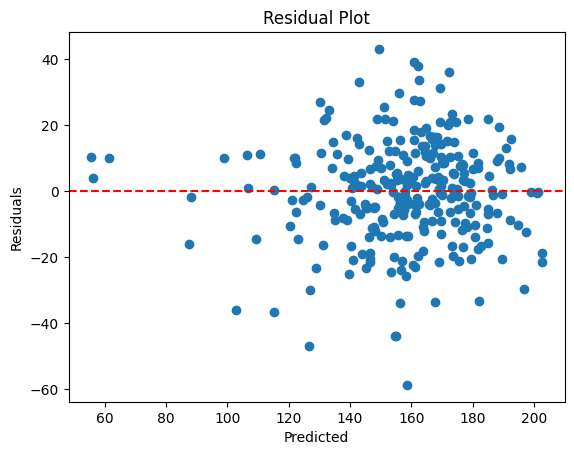

In [245]:
residuals_xgb = y_test - xgb_pred
plt.scatter(xgb_pred, residuals_xgb)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [246]:
mse = mean_squared_error(y_test , xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 232.27132134950938
R-squared: 0.6968831489944933


## Validataion for XGB

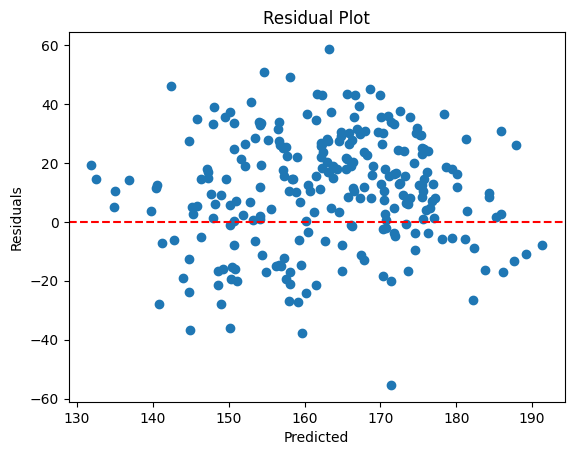

In [247]:
best_predictions_xgb_hold = best_model_xgb.predict(X_hold_scaled)

residuals_xgb_hold = y_hold - best_predictions_xgb_hold
plt.scatter(best_predictions_xgb_hold, residuals_xgb_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [248]:
mse = mean_squared_error(y_hold , best_predictions_xgb_hold )
r2 = r2_score(y_hold, best_predictions_xgb_hold)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 486.20963604672596
R-squared: 0.1015506111222948


## Outliers Detection & Bootstrapping

In [1832]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_hold_scaled.shape)

print(y_train.shape)
print(y_test.shape)
print(y_hold.shape)


(1140, 53)
(285, 53)
(253, 53)
(1140,)
(285,)
(253,)


In [1833]:
X_train_scaled


EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0    -0.586129  0.431582  0.391491  0.187400  2.112646  0.588571  1.747668   
1    -0.150320 -0.715242 -1.411493 -1.840056 -0.876836 -0.756052 -0.603590   
2    -2.619906  1.915706 -0.510001 -0.488419 -1.209001 -0.227807  0.572039   
3     1.011838  1.510945 -0.100232  0.863218  0.983286 -0.996163  0.823959   
4    -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
...        ...       ...       ...       ...       ...       ...       ...   
1135  0.212854 -2.604128 -1.903216 -0.857047 -1.209001 -2.100675 -1.275377   
1136 -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
1137 -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
1138 -0.586129  0.768883  0.801261  0.187400  0.584689  0.300438  0.823959   
1139 -0.586129  1.173644  0.391491  0.187400  0.252524  0.300438  1.285814   

        TAVG_4    TAVG_5    TAVG_6  ...    EMXP_9   EMXP_10    PRCP_4  \
0    -1.063913  1.013360  0.115706  ... -0.281608  0.185467 -0.271989   
1    -0.648615 -1.395752 -0.159177  ... -0.052626  1.327351 -0.754113   
2    -2.102160  1.965800  0.586934  ...  2.260417 -0.700572  0.438853   
3     2.258476  0.453102  0.979624  ...  2.149134  1.489531 -0.412338   
4    -0.056786 -0.039673 -0.000702  ... -0.823058  1.769181  0.298701   
...        ...       ...       ...  ...       ...       ...       ...   
1135  0.908755 -0.331260 -2.083357  ...  0.000000  0.000000 -0.080560   
1136 -0.056786 -0.039673 -0.000702  ...  1.647987  1.243208  0.076299   
1137 -0.056786 -0.039673 -0.000702  ... -1.103646  0.978048  0.196429   
1138  1.687440  1.573619  2.000617  ...  0.019240  0.390495  3.412744   
1139 -1.219650  0.677205 -0.041370  ... -0.141416 -0.499022 -0.099838   

        PRCP_5    PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10  SNOW_4  
0    -1.317181 -0.535992 -0.744429  0.286374 -0.356667  0.089414     0.8  
1    -0.236220  0.448391  0.208257  0.388927  0.093623  1.647364    55.0  
2    -1.167921  0.263718 -0.284810  0.615673  1.115351 -0.625303    43.0  
3     0.442200 -0.233991  1.029459  1.176752  2.287389  0.899521     0.0  
4    -1.441765  0.701972  0.470886 -0.358304 -0.742978  0.243699     0.0  
...        ...       ...       ...       ...       ...       ...     ...  
1135  0.000000 -0.040159 -0.034983  0.000000  0.000000  0.004431     0.0  
1136 -0.130490  0.472770  0.320368 -0.475029  1.931461  0.758230     0.0  
1137  1.895566 -0.863915 -0.284465  0.085860 -1.046812  0.765698     0.0  
1138 -0.423487 -0.208469 -0.378884  0.580482 -0.031797  0.580248     0.0  
1139 -1.073627 -0.753341 -0.488838  2.247125 -0.281576 -0.424818    89.0  

[1140 rows x 53 columns]

In [1834]:
y_train_copy = y_train.reset_index(drop=True)

In [1835]:
train_out = pd.concat([X_train_scaled, y_train_copy], axis=1)

In [1836]:
train_out

EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0    -0.586129  0.431582  0.391491  0.187400  2.112646  0.588571  1.747668   
1    -0.150320 -0.715242 -1.411493 -1.840056 -0.876836 -0.756052 -0.603590   
2    -2.619906  1.915706 -0.510001 -0.488419 -1.209001 -0.227807  0.572039   
3     1.011838  1.510945 -0.100232  0.863218  0.983286 -0.996163  0.823959   
4    -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
...        ...       ...       ...       ...       ...       ...       ...   
1135  0.212854 -2.604128 -1.903216 -0.857047 -1.209001 -2.100675 -1.275377   
1136 -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
1137 -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
1138 -0.586129  0.768883  0.801261  0.187400  0.584689  0.300438  0.823959   
1139 -0.586129  1.173644  0.391491  0.187400  0.252524  0.300438  1.285814   

        TAVG_4    TAVG_5    TAVG_6  ...   EMXP_10    PRCP_4    PRCP_5  \
0    -1.063913  1.013360  0.115706  ...  0.185467 -0.271989 -1.317181   
1    -0.648615 -1.395752 -0.159177  ...  1.327351 -0.754113 -0.236220   
2    -2.102160  1.965800  0.586934  ... -0.700572  0.438853 -1.167921   
3     2.258476  0.453102  0.979624  ...  1.489531 -0.412338  0.442200   
4    -0.056786 -0.039673 -0.000702  ...  1.769181  0.298701 -1.441765   
...        ...       ...       ...  ...       ...       ...       ...   
1135  0.908755 -0.331260 -2.083357  ...  0.000000 -0.080560  0.000000   
1136 -0.056786 -0.039673 -0.000702  ...  1.243208  0.076299 -0.130490   
1137 -0.056786 -0.039673 -0.000702  ...  0.978048  0.196429  1.895566   
1138  1.687440  1.573619  2.000617  ...  0.390495  3.412744 -0.423487   
1139 -1.219650  0.677205 -0.041370  ... -0.499022 -0.099838 -1.073627   

        PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10  SNOW_4  Value  
0    -0.535992 -0.744429  0.286374 -0.356667  0.089414     0.8  149.6  
1     0.448391  0.208257  0.388927  0.093623  1.647364    55.0  188.9  
2     0.263718 -0.284810  0.615673  1.115351 -0.625303    43.0  197.0  
3    -0.233991  1.029459  1.176752  2.287389  0.899521     0.0  150.7  
4     0.701972  0.470886 -0.358304 -0.742978  0.243699     0.0  181.5  
...        ...       ...       ...       ...       ...     ...    ...  
1135 -0.040159 -0.034983  0.000000  0.000000  0.004431     0.0  126.7  
1136  0.472770  0.320368 -0.475029  1.931461  0.758230     0.0  151.7  
1137 -0.863915 -0.284465  0.085860 -1.046812  0.765698     0.0  145.8  
1138 -0.208469 -0.378884  0.580482 -0.031797  0.580248     0.0  175.4  
1139 -0.753341 -0.488838  2.247125 -0.281576 -0.424818    89.0  157.2  

[1140 rows x 54 columns]

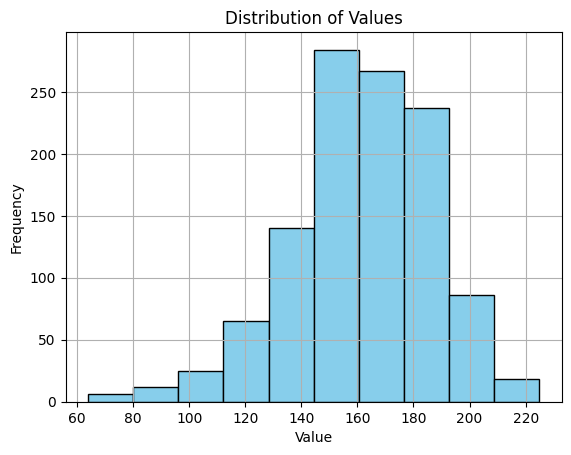

In [1837]:
# Plot distribution using Matplotlib
plt.hist(train_out['Value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

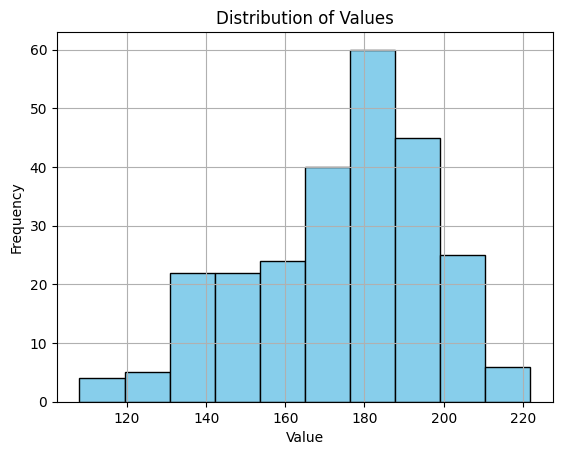

In [1838]:
# Plot distribution using Matplotlib
plt.hist(y_hold, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Random Oversampling

In [1889]:
# Define the number of bootstrap iterations
num_iterations = 10

# Initialize an empty list to store bootstrapped datasets
bootstrapped_datasets = []

# Perform bootstrapping
for i in range(num_iterations):
    # Randomly sample rows with replacement from the original dataset
    bootstrapped_data = train_out.sample(n=len(train_out), replace=True)
    
    # Append the bootstrapped dataset to the list
    bootstrapped_datasets.append(bootstrapped_data)

# Combine bootstrapped datasets into a single dataframe
bootstrapped_combined = pd.concat(bootstrapped_datasets, ignore_index=True)



In [1890]:
bootstrapped_combined

EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0     -0.050177 -1.457304  0.140580 -0.488419  0.584689 -1.572430 -0.141735   
1     -1.167208  2.455388  1.948614  2.061261  0.817204  1.116816  1.852635   
2      1.011838  0.431582 -0.100232 -1.840056 -1.607599 -0.227807  0.110185   
3     -0.368225 -0.310480  0.801261  0.340995  0.584689  0.060327 -0.351669   
4     -0.150320  0.431582  0.140580 -0.488419  0.584689 -0.027051  0.572039   
...         ...       ...       ...       ...       ...       ...       ...   
11395  0.212854 -0.310480 -0.510001  0.494590  0.584689 -0.996163 -0.351669   
11396 -0.050177  0.038755  0.140580  0.108913 -0.009521 -0.027051 -0.021580   
11397  1.447647 -1.120003 -0.100232  0.187400  1.714049  1.404949  0.572039   
11398  0.648663  0.768883 -0.100232  0.187400  0.252524  0.588571  0.823959   
11399 -1.748287 -0.310480 -1.001724 -0.488419 -1.939763  0.060327 -1.065444   

         TAVG_4    TAVG_5    TAVG_6  ...   EMXP_10    PRCP_4    PRCP_5  \
0     -0.056786 -1.899985 -0.000702  ...  0.067377 -0.706169  0.600881   
1     -1.115826  3.142343  1.686465  ... -0.975875  0.243506 -0.884942   
2      0.493457 -1.227674 -0.434060  ... -0.509672 -0.045049  0.848710   
3     -1.141782 -0.975558 -0.355522  ...  0.090850 -0.410567 -0.671707   
4      0.597281 -0.107157 -0.000702  ... -0.050714 -0.554789 -0.776390   
...         ...       ...       ...  ...       ...       ...       ...   
11395  0.701106 -0.611390 -1.219440  ... -0.606390 -0.517045  0.064975   
11396 -0.056786 -0.039673 -0.000702  ... -0.108672 -0.715909 -0.587056   
11397  1.116405 -0.667416  0.979624  ...  0.415127  1.201299  1.209635   
11398  1.012580  0.172972  0.665472  ... -0.765051 -0.792208 -0.051872   
11399 -0.389053  0.565153 -0.748212  ...  0.094182 -0.179924  0.288425   

         PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10     SNOW_4  Value  
0     -0.771190  0.354200 -0.682710  0.029323 -0.226025  25.000000  142.4  
1      2.115493  0.037745 -0.387612  2.179120 -0.810007   2.500000  187.1  
2      0.181925  0.591024 -0.481472 -0.434199 -0.249175   0.000000  185.1  
3     -0.021549 -0.596087  1.219134  0.151092  0.530327  38.833333  158.7  
4      0.154107  1.053625  0.415193  0.151563  0.807767  20.500000  193.8  
...         ...       ...       ...       ...       ...        ...    ...  
11395 -0.555048  3.712543 -0.437890  1.483483 -0.680067   0.000000  158.5  
11396 -0.443385 -0.172612  0.718755  0.392510  0.239965   0.000000  187.9  
11397 -0.173044 -0.357652 -0.497768  1.420597  0.205613   0.000000   87.0  
11398  3.009664  0.456387  0.103293 -0.757817 -0.904101   0.000000  181.6  
11399  1.568935  0.112198 -0.268865 -0.120615 -0.524737   0.000000  144.8  

[11400 rows x 54 columns]

In [1892]:
print(bootstrapped_combined["Value"].nunique())

626


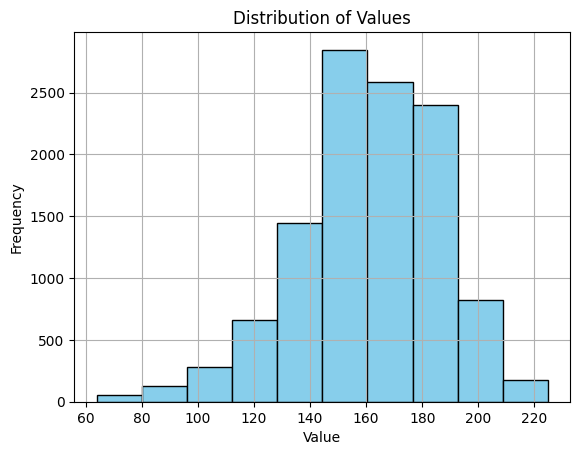

In [1893]:
# Plot distribution using Matplotlib
plt.hist(bootstrapped_combined['Value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [1894]:
y_train_boot = bootstrapped_combined["Value"]
X_train_scaled_boot = bootstrapped_combined.drop(columns=["Value"], axis=1)

In [1895]:
X_train_scaled_boot.shape

(11400, 53)

In [1897]:
# Create a Gradient Boosting regressor
gb_regressor_over = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [1899]:
# Perform grid search with 5-fold cross-validation
grid_search_gb = GridSearchCV(gb_regressor_over, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train_scaled_boot, y_train_boot)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [1900]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters:", best_params_gb)


Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}


In [1901]:
# Make predictions on the testing data using the best model
best_params_gb = grid_search_gb.best_estimator_
gb_pred = best_params_gb.predict(X_test_scaled)

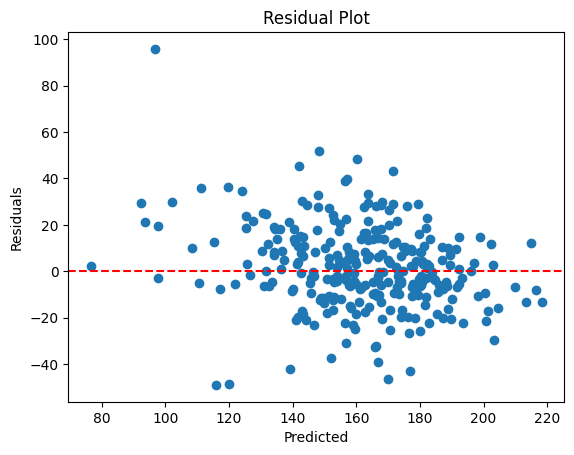

In [1902]:
residuals_gb = y_test - gb_pred
plt.scatter(gb_pred, residuals_gb)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1904]:
mse = mean_squared_error(y_test , gb_pred)
r2 = r2_score(y_test, gb_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 329.2553314585447
R-squared: 0.5004876168828786


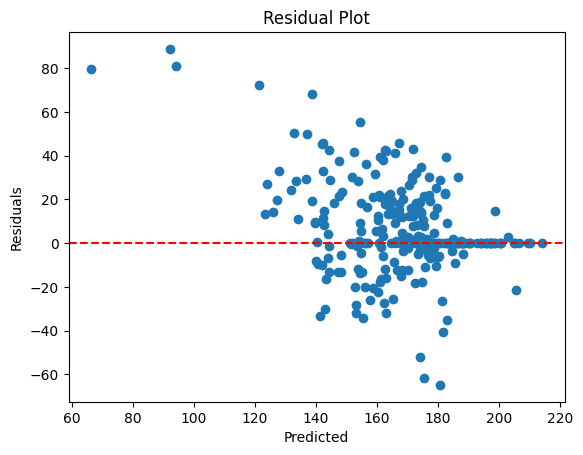

In [1905]:
best_predictions_gb_hold = best_params_gb.predict(X_hold_scaled)

residuals_gb_hold = y_hold - best_predictions_gb_hold
plt.scatter(best_predictions_gb_hold, residuals_gb_hold)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1906]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold )
r2 = r2_score(y_hold, best_predictions_gb_hold)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 496.8542076457649
R-squared: 0.08188088814892613


Worse result

## Outliers Visualization

In [1919]:
X_train_scaled.describe()

EMXT_4        EMXT_5        EMXT_6        EMXT_7        EMXT_8  \
count  1.140000e+03  1.140000e+03  1.140000e+03  1.140000e+03  1.140000e+03   
mean   1.685981e-15  4.347400e-16  3.488827e-15  2.842171e-15  4.509453e-15   
std    1.000439e+00  1.000439e+00  1.000439e+00  1.000439e+00  1.000439e+00   
min   -3.782064e+00 -4.830314e+00 -2.804708e+00 -3.560322e+00 -2.736959e+00   
25%   -1.503202e-01 -3.104804e-01 -5.100008e-01 -4.884188e-01 -4.782386e-01   
50%   -5.017738e-02  3.875504e-02  1.405795e-01  1.089126e-01 -9.520980e-03   
75%    6.486634e-01  4.315819e-01  3.914914e-01  4.945901e-01  2.525238e-01   
max    3.045614e+00  3.804592e+00  3.587691e+00  3.259303e+00  4.304933e+00   

             EMXT_9       EMXT_10        TAVG_4        TAVG_5        TAVG_6  \
count  1.140000e+03  1.140000e+03  1.140000e+03  1.140000e+03  1.140000e+03   
mean  -5.609548e-17 -9.832291e-16 -2.532088e-16  2.531308e-15 -6.404234e-16   
std    1.000439e+00  1.000439e+00  1.000439e+00  1.000439e+00  1.000439e+00   
min   -2.869031e+00 -3.626635e+00 -3.555705e+00 -3.132554e+00 -3.261427e+00   
25%   -4.679182e-01 -3.516692e-01 -5.447899e-01 -5.868785e-01 -5.125979e-01   
50%   -2.705135e-02 -2.157972e-02 -5.678576e-02 -3.967288e-02 -7.018619e-04   
75%    5.885713e-01  5.720390e-01  5.453690e-01  5.091275e-01  5.083958e-01   
max    3.229795e+00  3.133230e+00  3.140985e+00  3.702602e+00  3.885529e+00   

       ...       EMXP_9      EMXP_10       PRCP_4       PRCP_5        PRCP_6  \
count  ...  1140.000000  1140.000000  1140.000000  1140.000000  1.140000e+03   
mean   ...     0.169670     0.157714     0.179794     0.041737  1.586496e-01   
std    ...     0.852647     0.786375     0.939043     0.752333  7.817502e-01   
min    ...    -1.156023    -1.112802    -1.639610    -1.518941 -1.243960e+00   
25%    ...    -0.444576    -0.433601    -0.424378    -0.488197 -4.170693e-01   
50%    ...     0.000000     0.000000     0.000000     0.000000  9.280771e-17   
75%    ...     0.555424     0.566399     0.575622     0.511803  5.829307e-01   
max    ...     4.403361     4.425849     4.535714     3.115238  3.420008e+00   

            PRCP_7       PRCP_8       PRCP_9       PRCP_10       SNOW_4  
count  1140.000000  1140.000000  1140.000000  1.140000e+03  1140.000000  
mean      0.140968     0.156860     0.136015  5.693435e-02     8.301500  
std       0.798003     0.800584     0.759706  7.018718e-01    21.731871  
min      -1.344994    -1.182963    -1.066596 -1.139834e+00     0.000000  
25%      -0.423590    -0.416161    -0.433669 -5.236169e-01     0.000000  
50%       0.000000     0.000000     0.000000  1.060892e-16     0.000000  
75%       0.576410     0.583839     0.566331  4.763831e-01     0.000000  
max       4.469045     3.582575     3.339693  2.327214e+00   165.000000  

[8 rows x 53 columns]

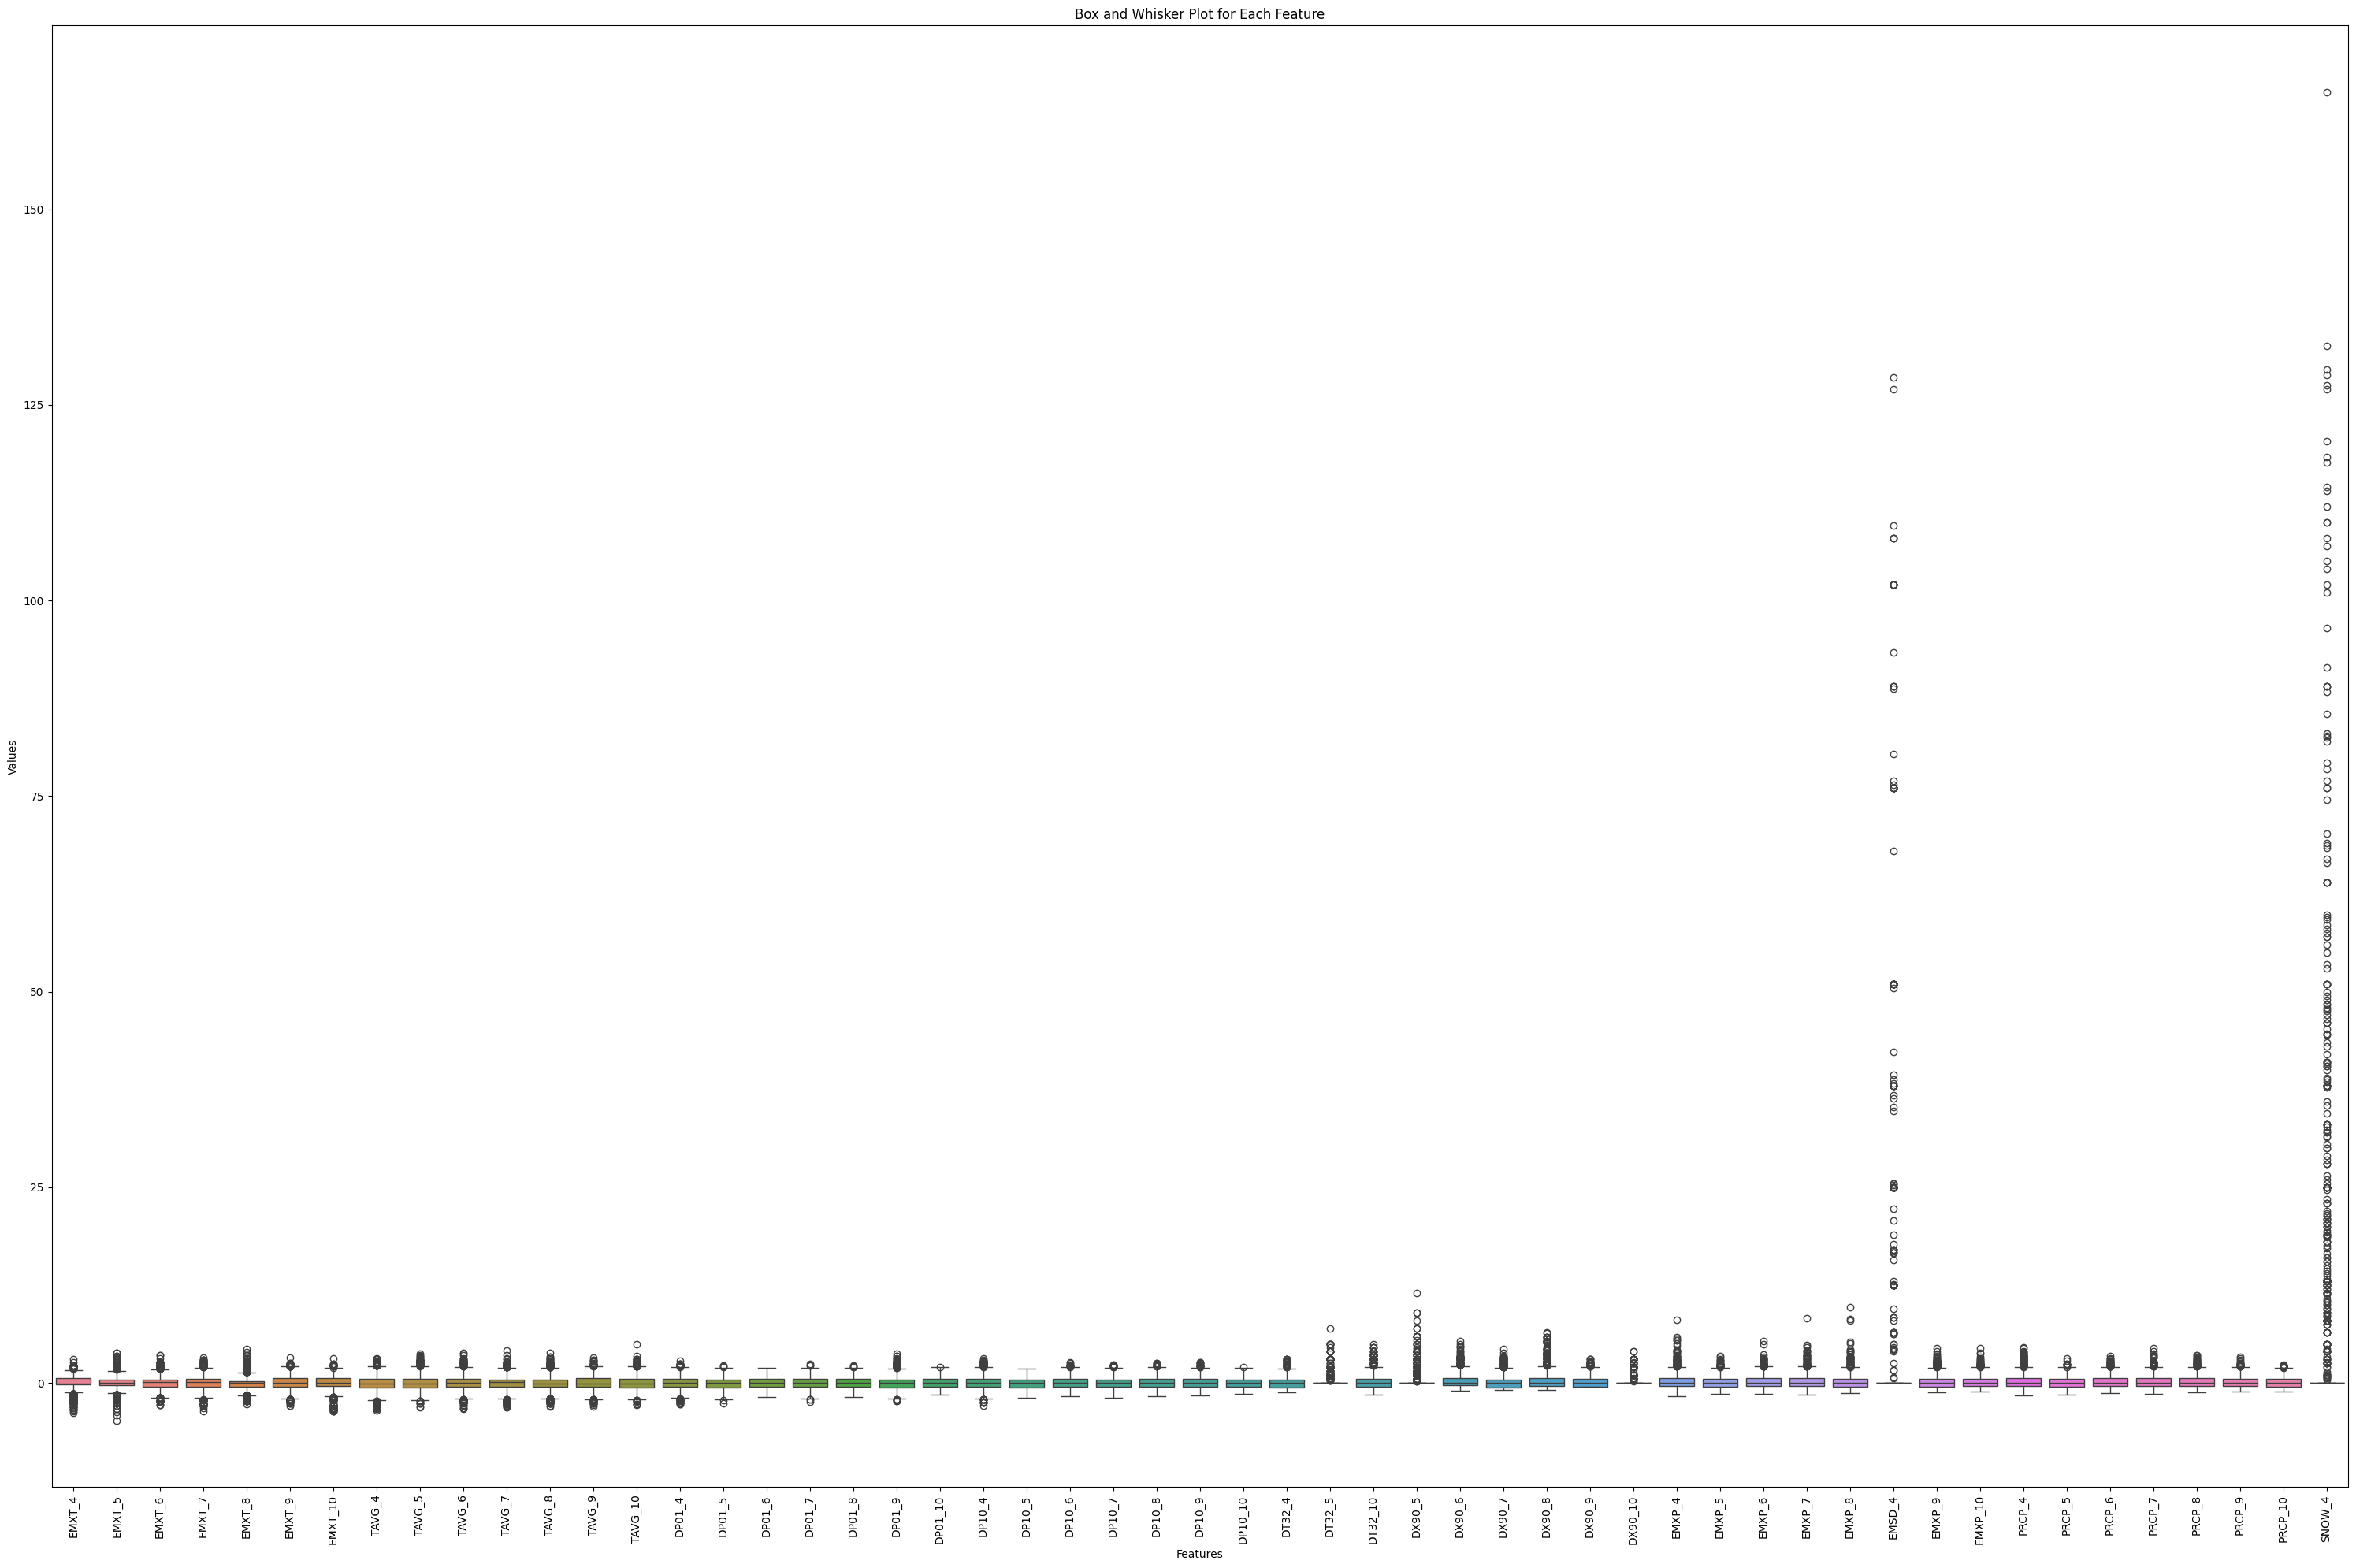

In [1923]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_train_scaled)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

In [1936]:
X_train_scaled_subset_1 = X_train_scaled.iloc[:, :22]
X_hold_scaled_subset_1= X_hold_scaled.iloc[:, :22]

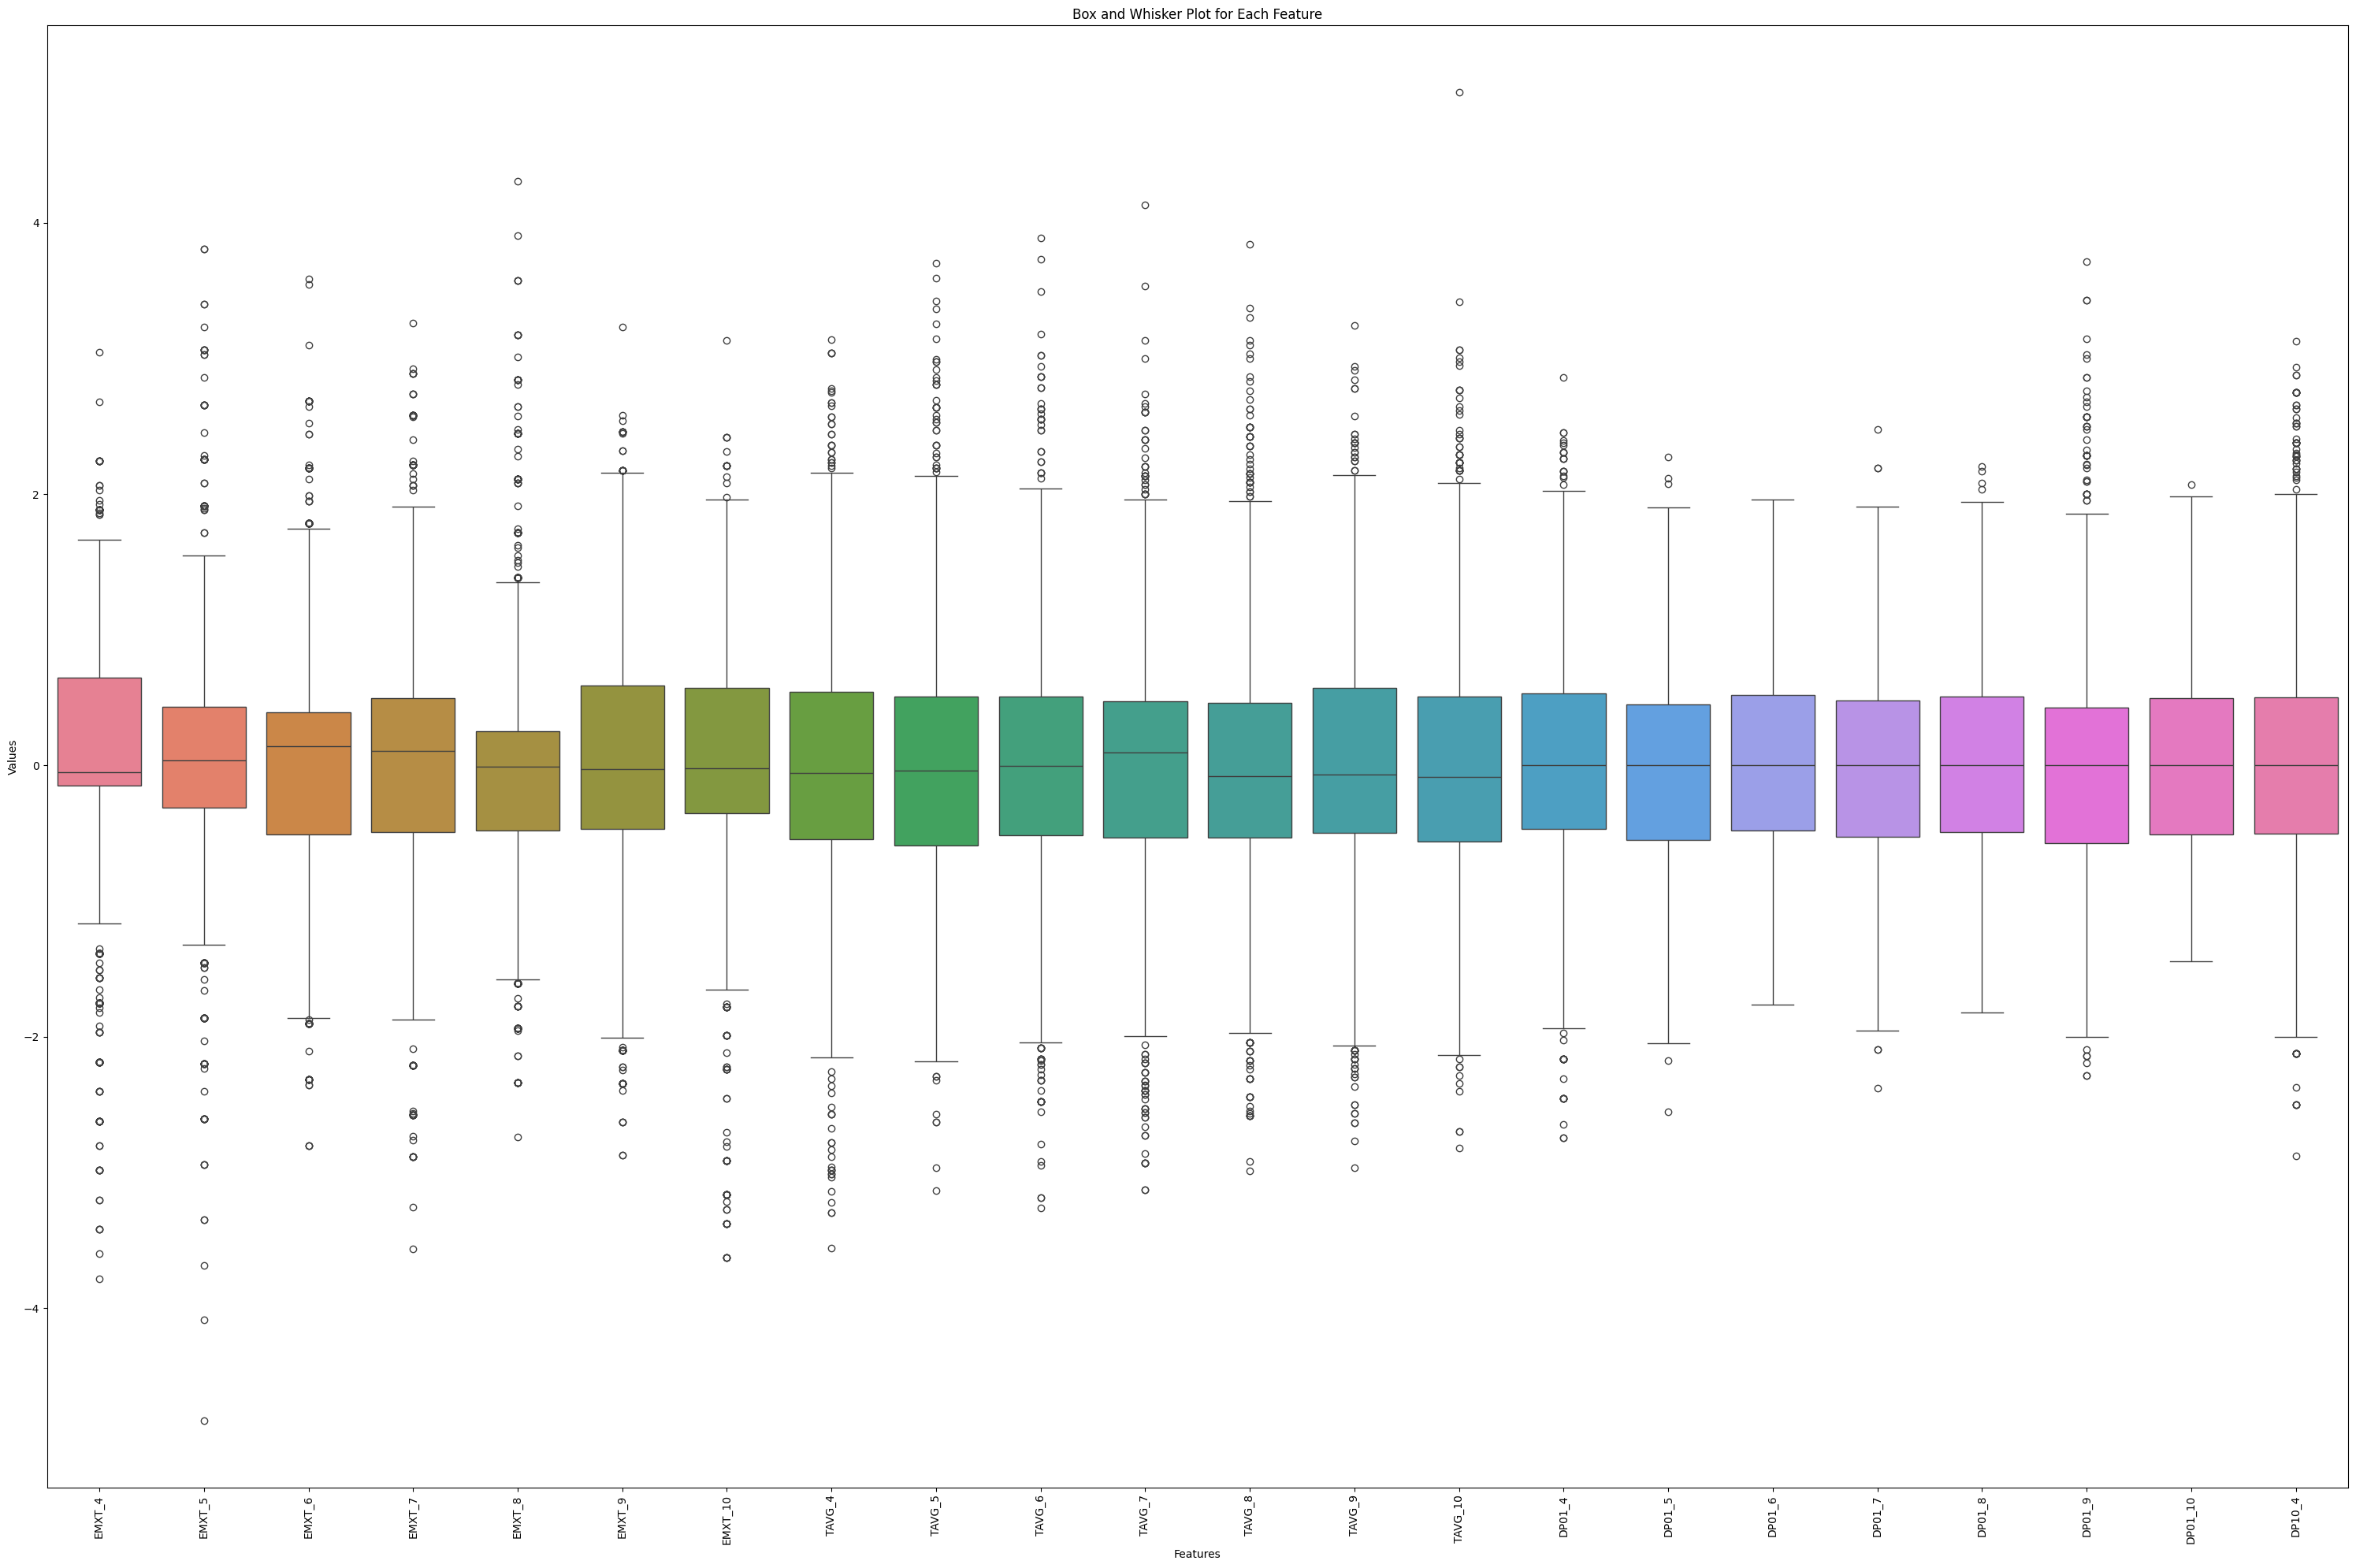

In [1926]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_train_scaled_subset_1)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

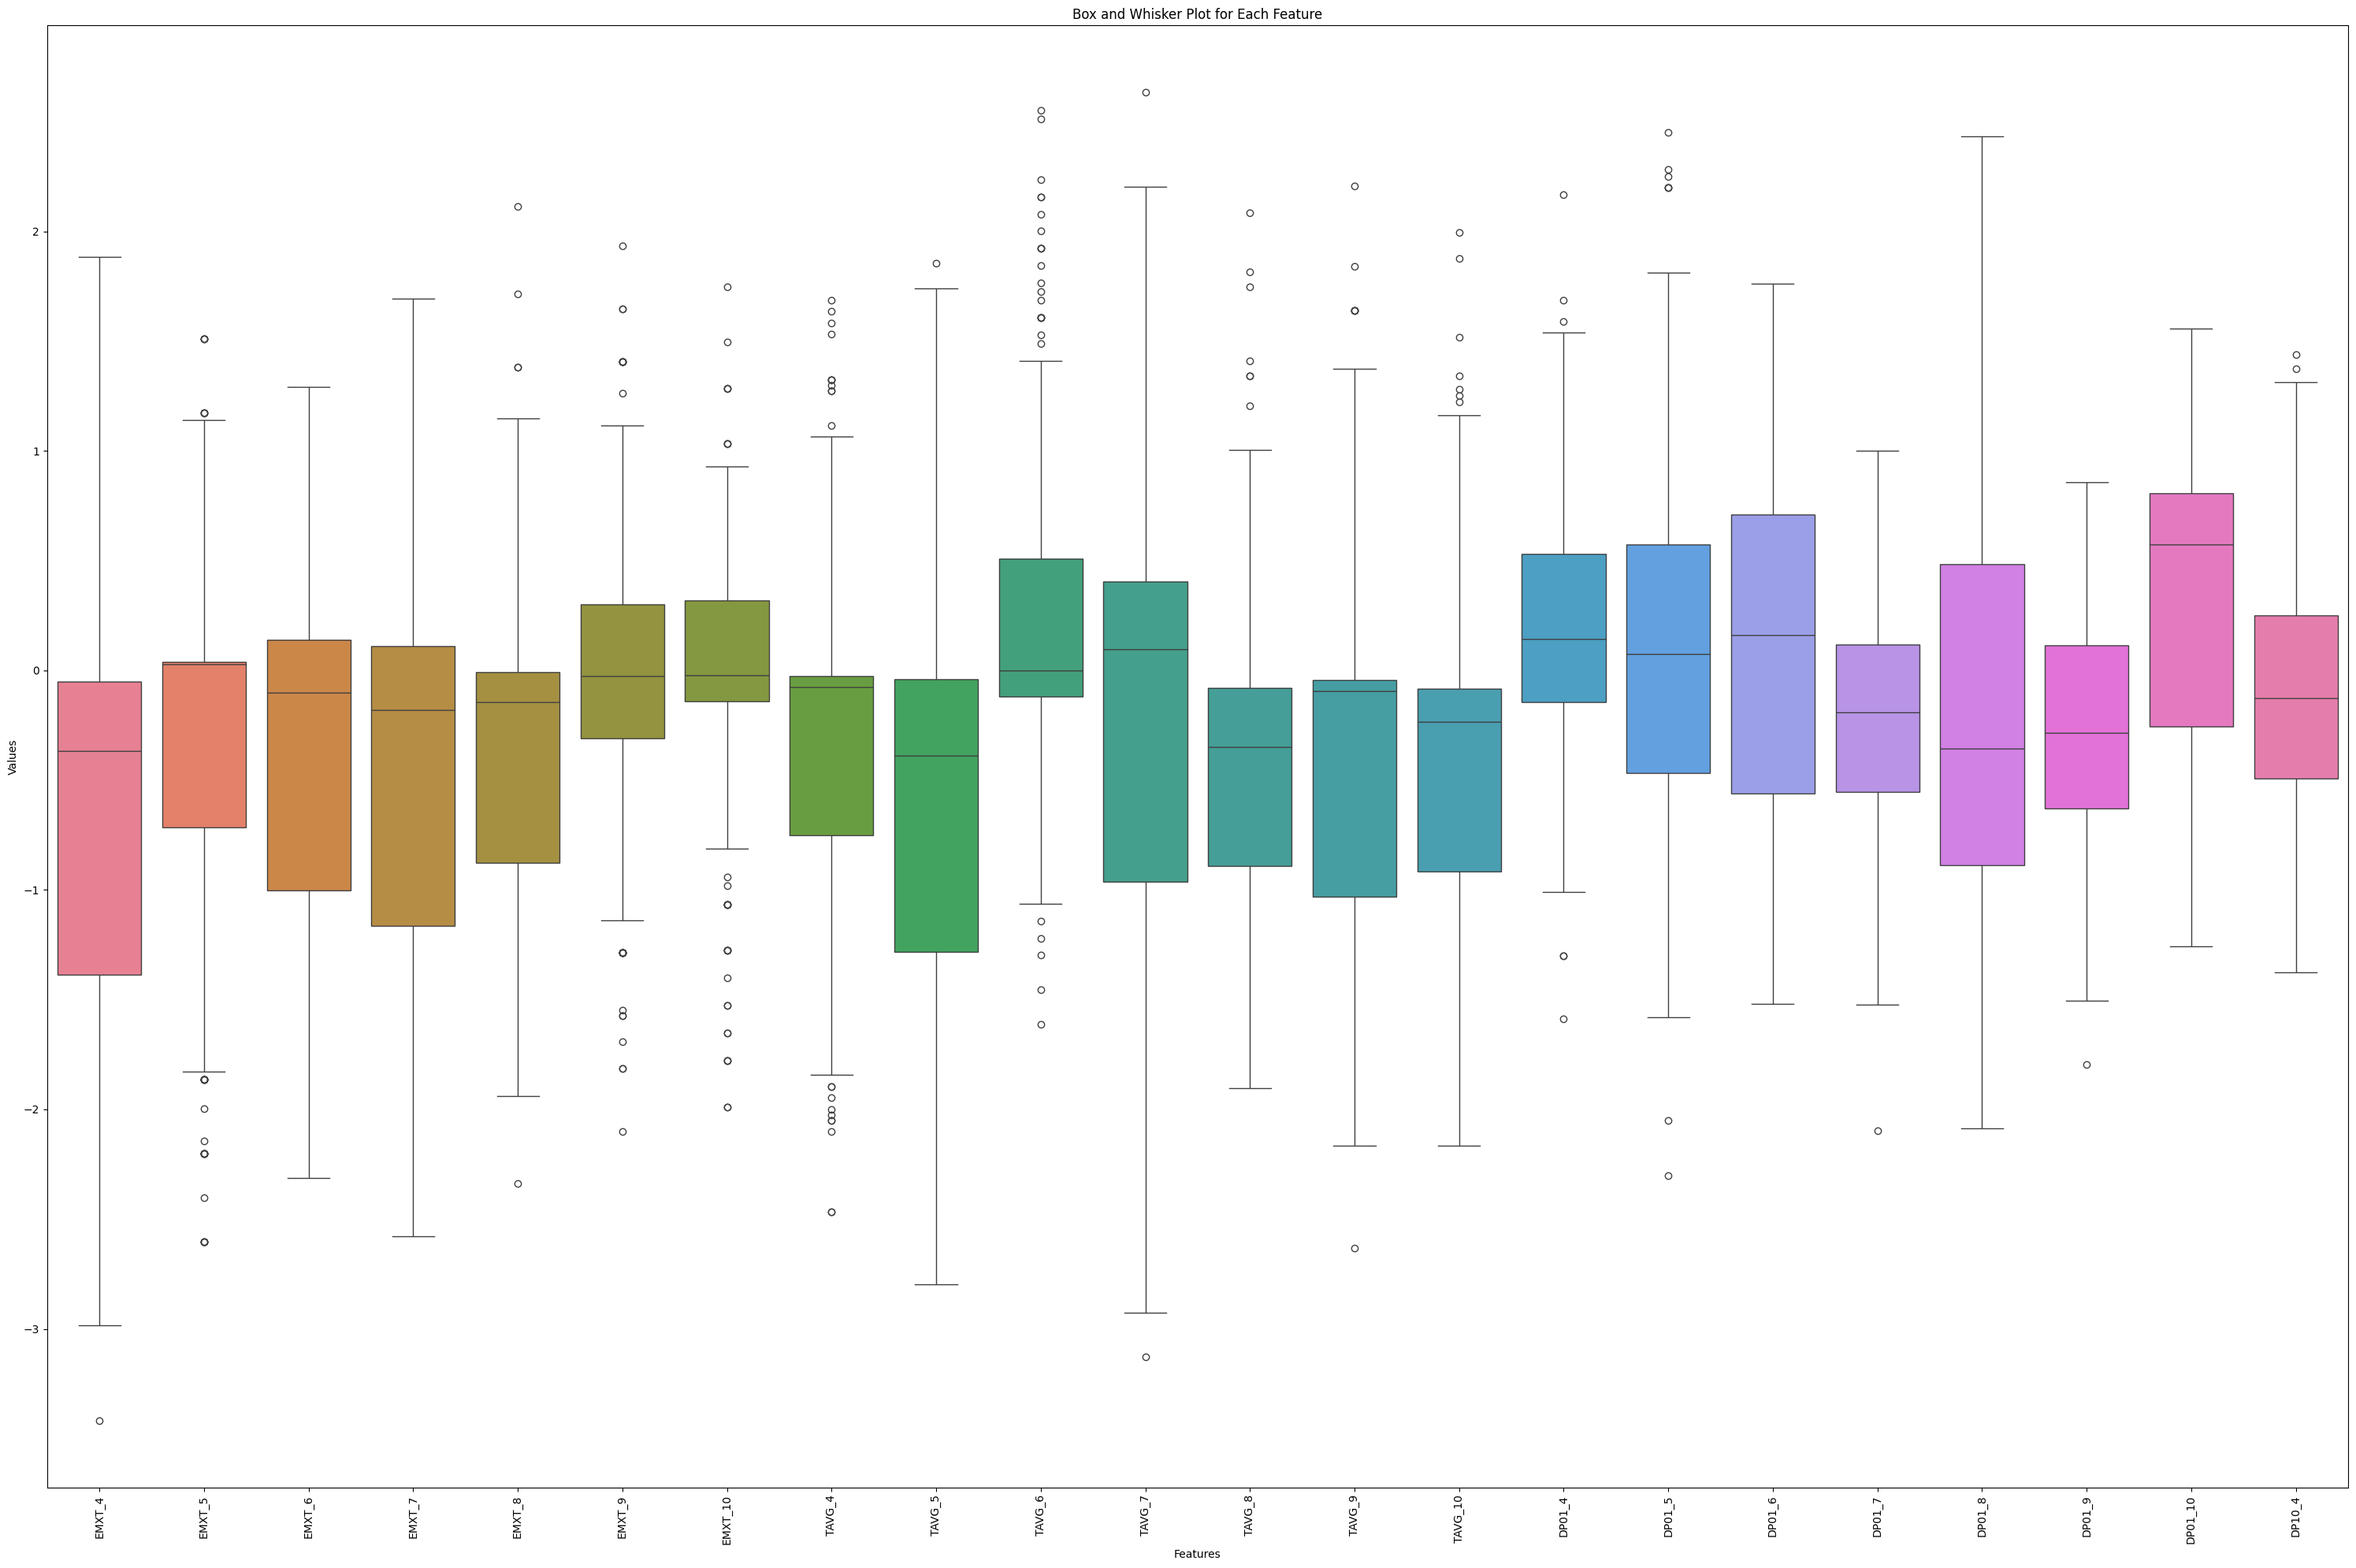

In [1937]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_hold_scaled_subset_1)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

In [1938]:
X_train_scaled_subset_2 = X_train_scaled.iloc[:, -21:]
X_hold_scaled_subset_2 = X_hold_scaled.iloc[:, -21:]

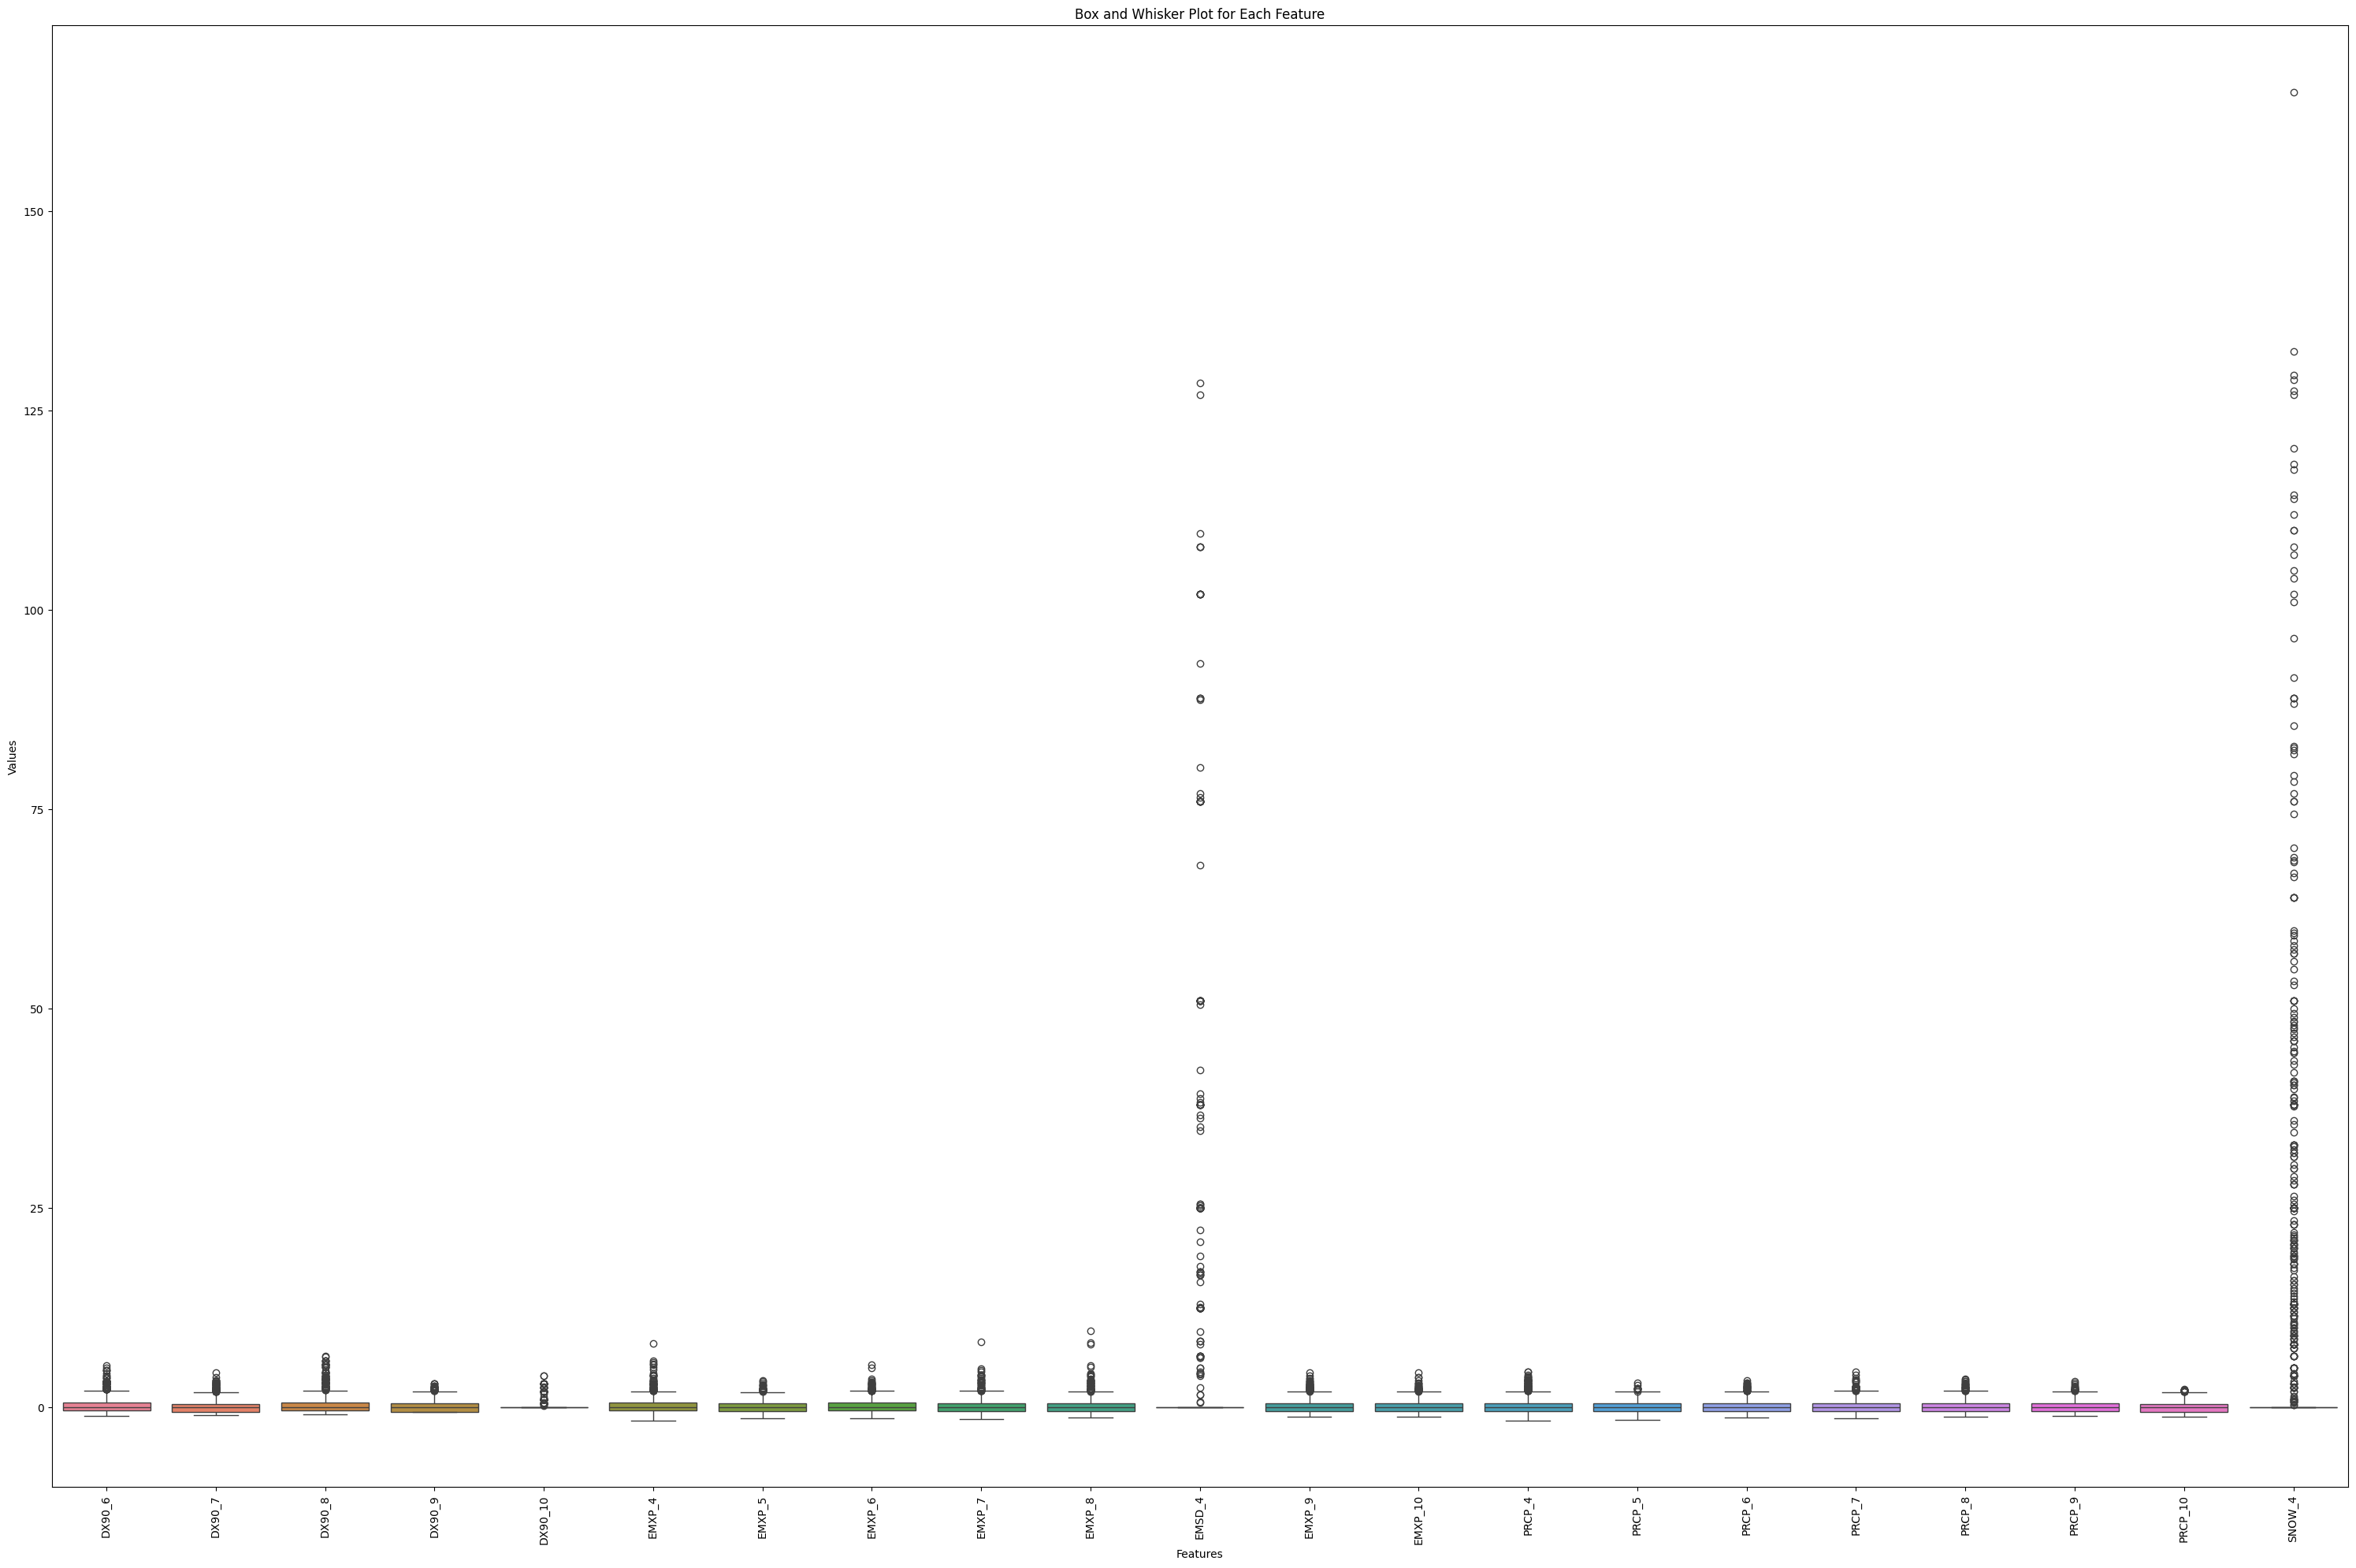

In [1930]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_train_scaled_subset_2)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

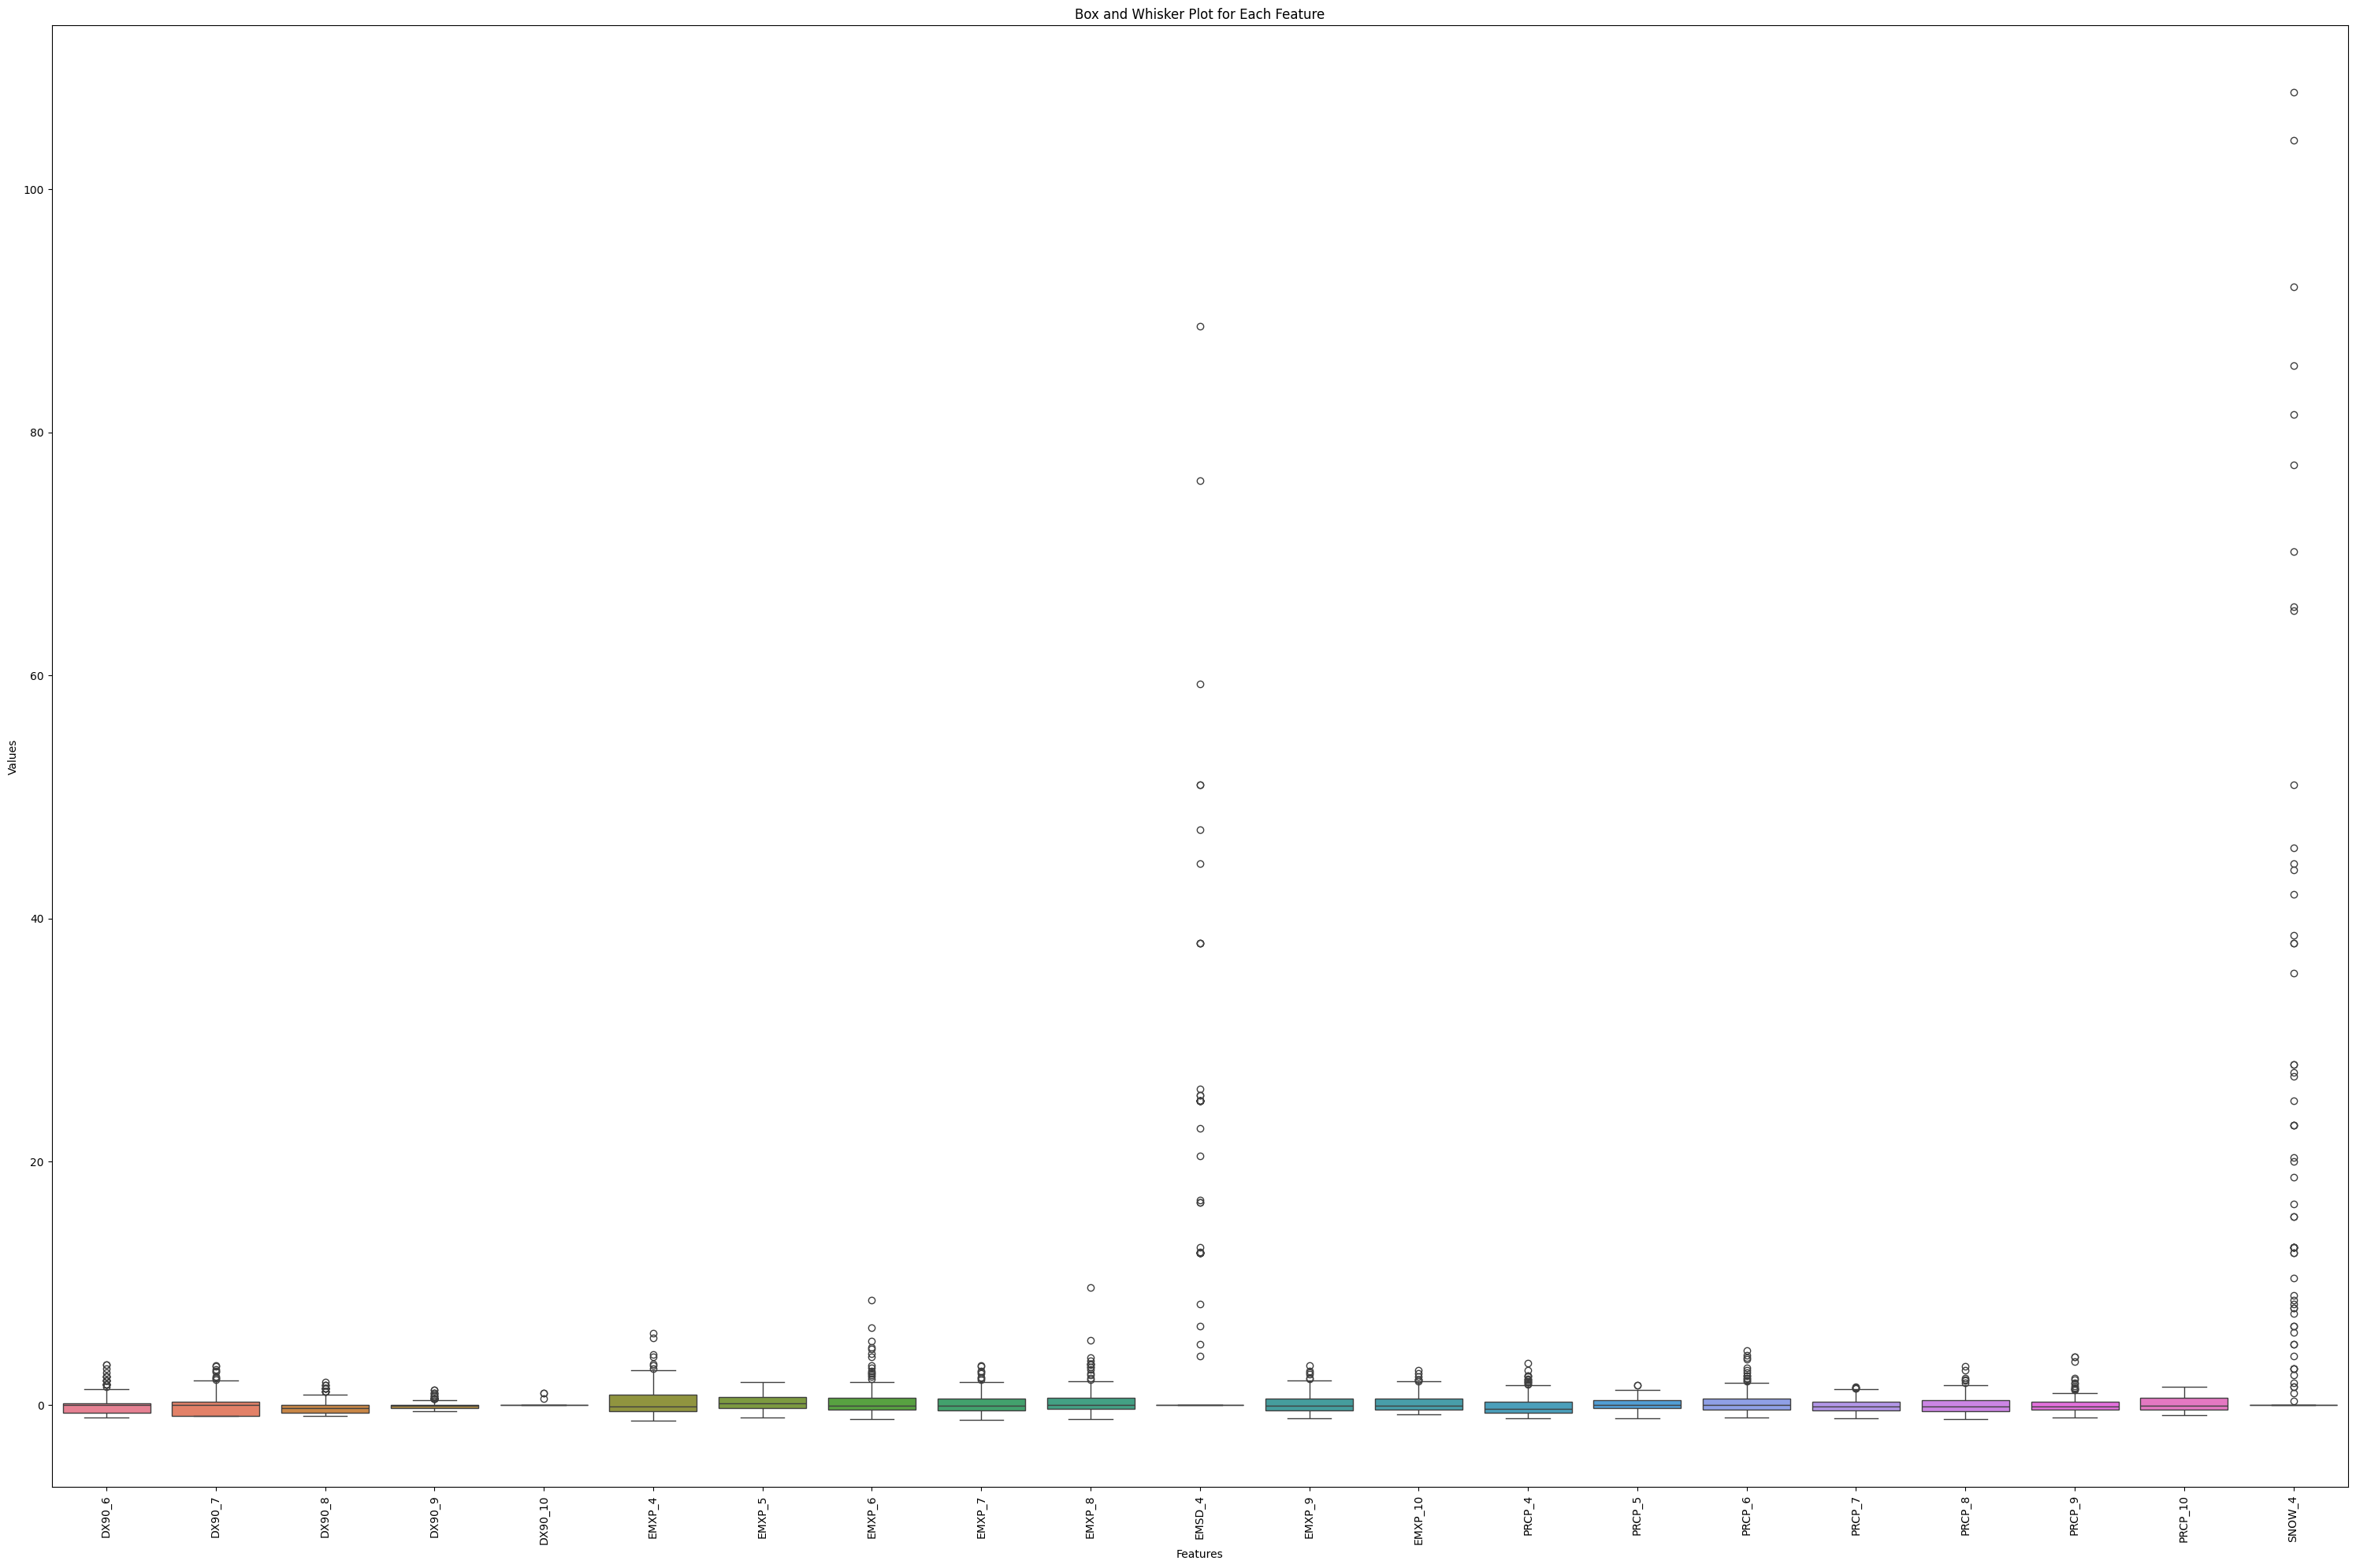

In [1939]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_hold_scaled_subset_2)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

In [1940]:
X_train_scaled_subset_3 = X_train_scaled_subset_2.drop(columns=["EMSD_4", "SNOW_4"],axis=1)
X_hold_scaled_subset_3 = X_hold_scaled_subset_2.drop(columns=["EMSD_4", "SNOW_4"],axis=1)

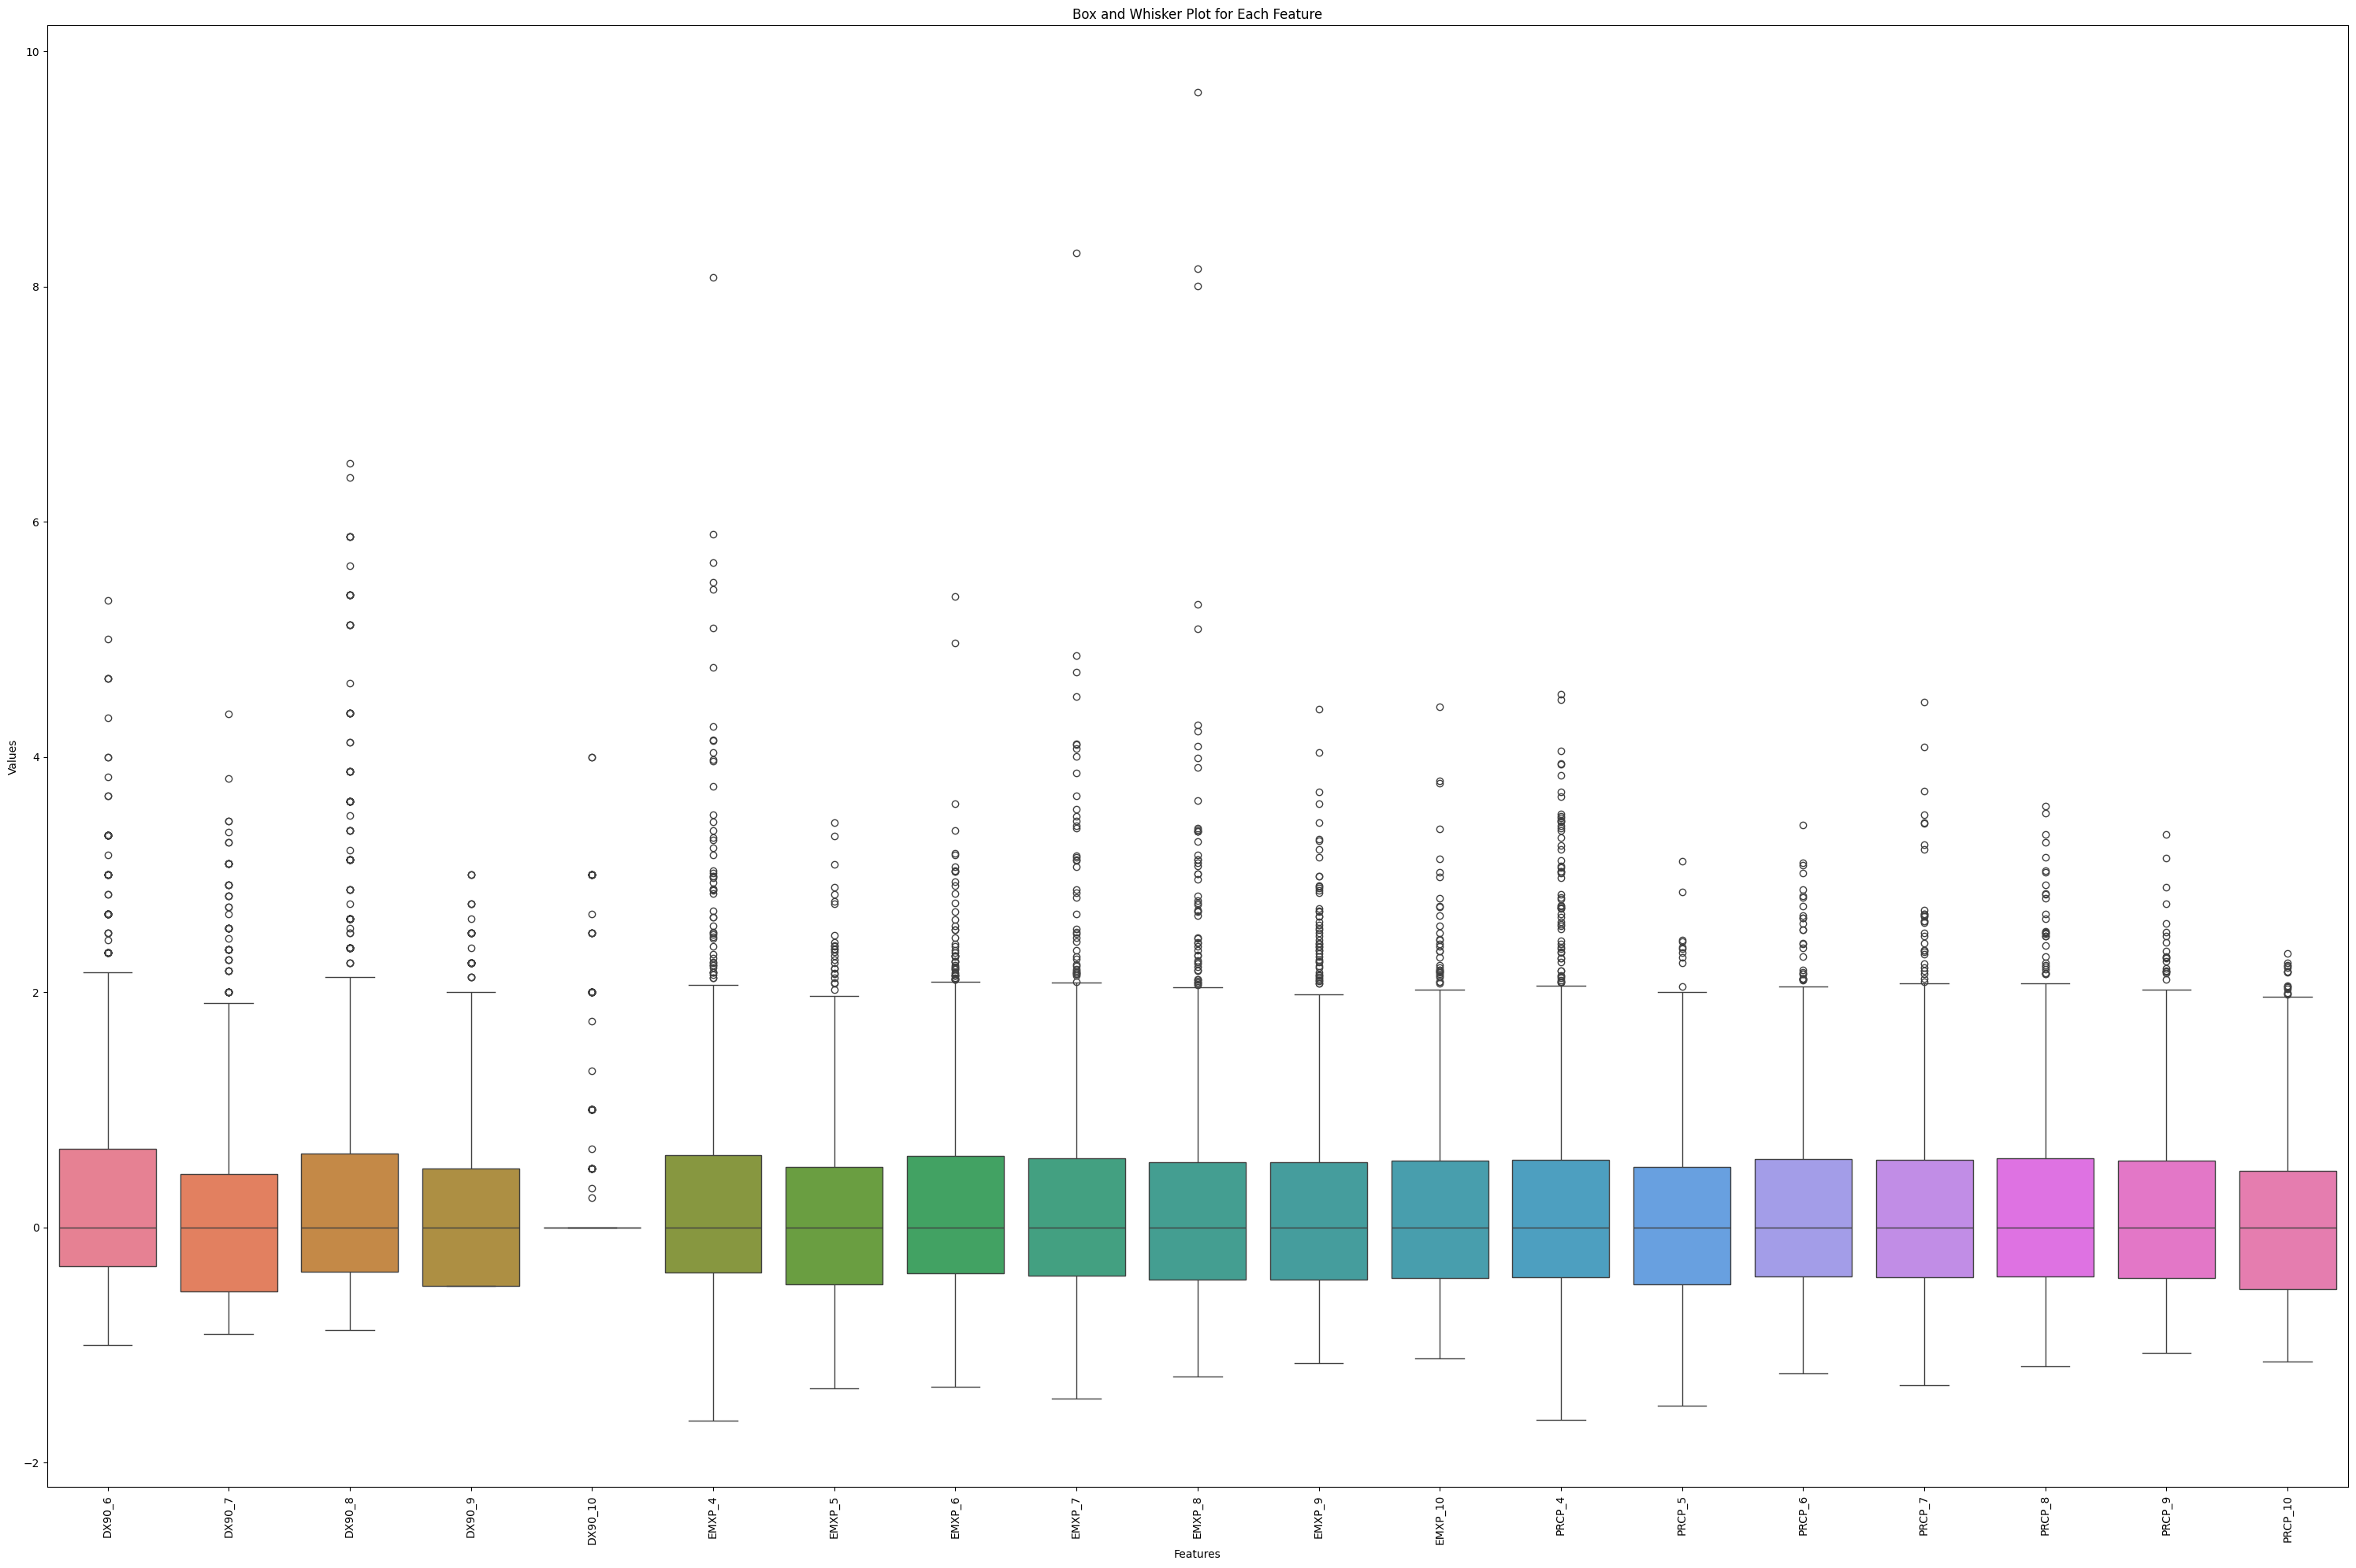

In [1934]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_train_scaled_subset_3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

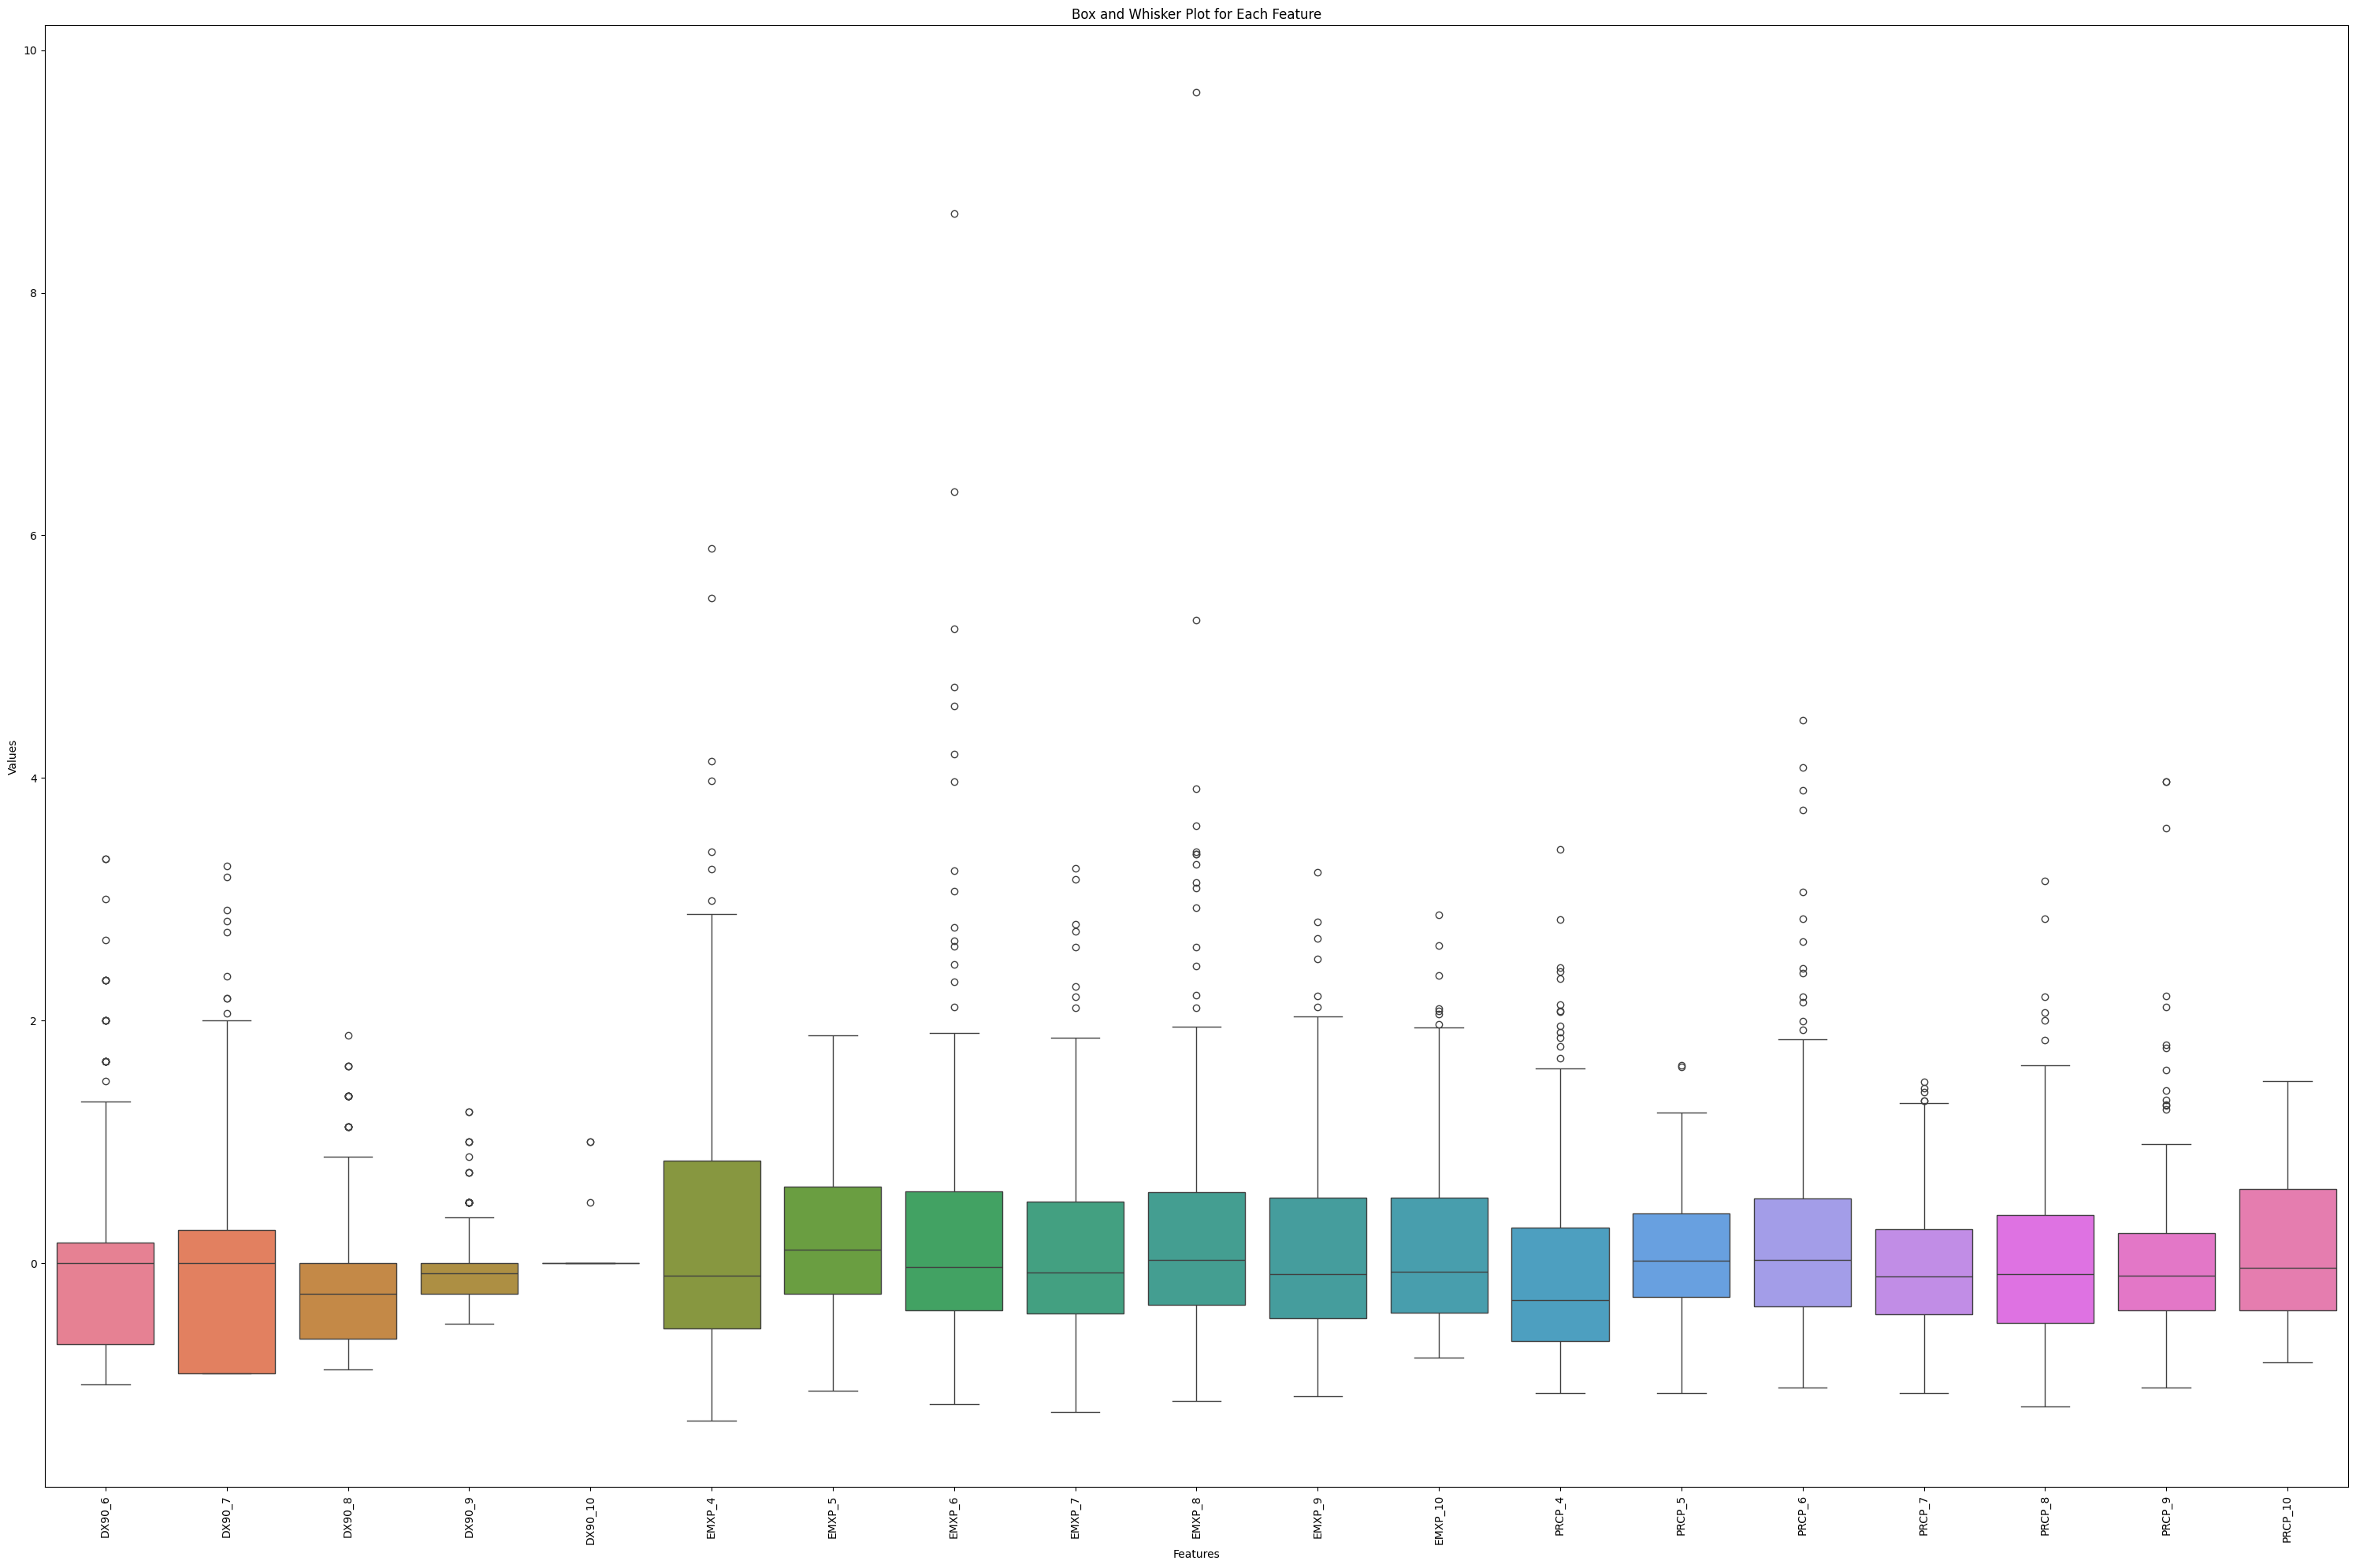

In [1941]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_hold_scaled_subset_3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

In [1942]:
X_train_scaled_subset_4 = X_train_scaled_subset_3.drop(columns=["DX90_10"],axis=1)
X_hold_scaled_subset_4 = X_hold_scaled_subset_3.drop(columns=["DX90_10"],axis=1)

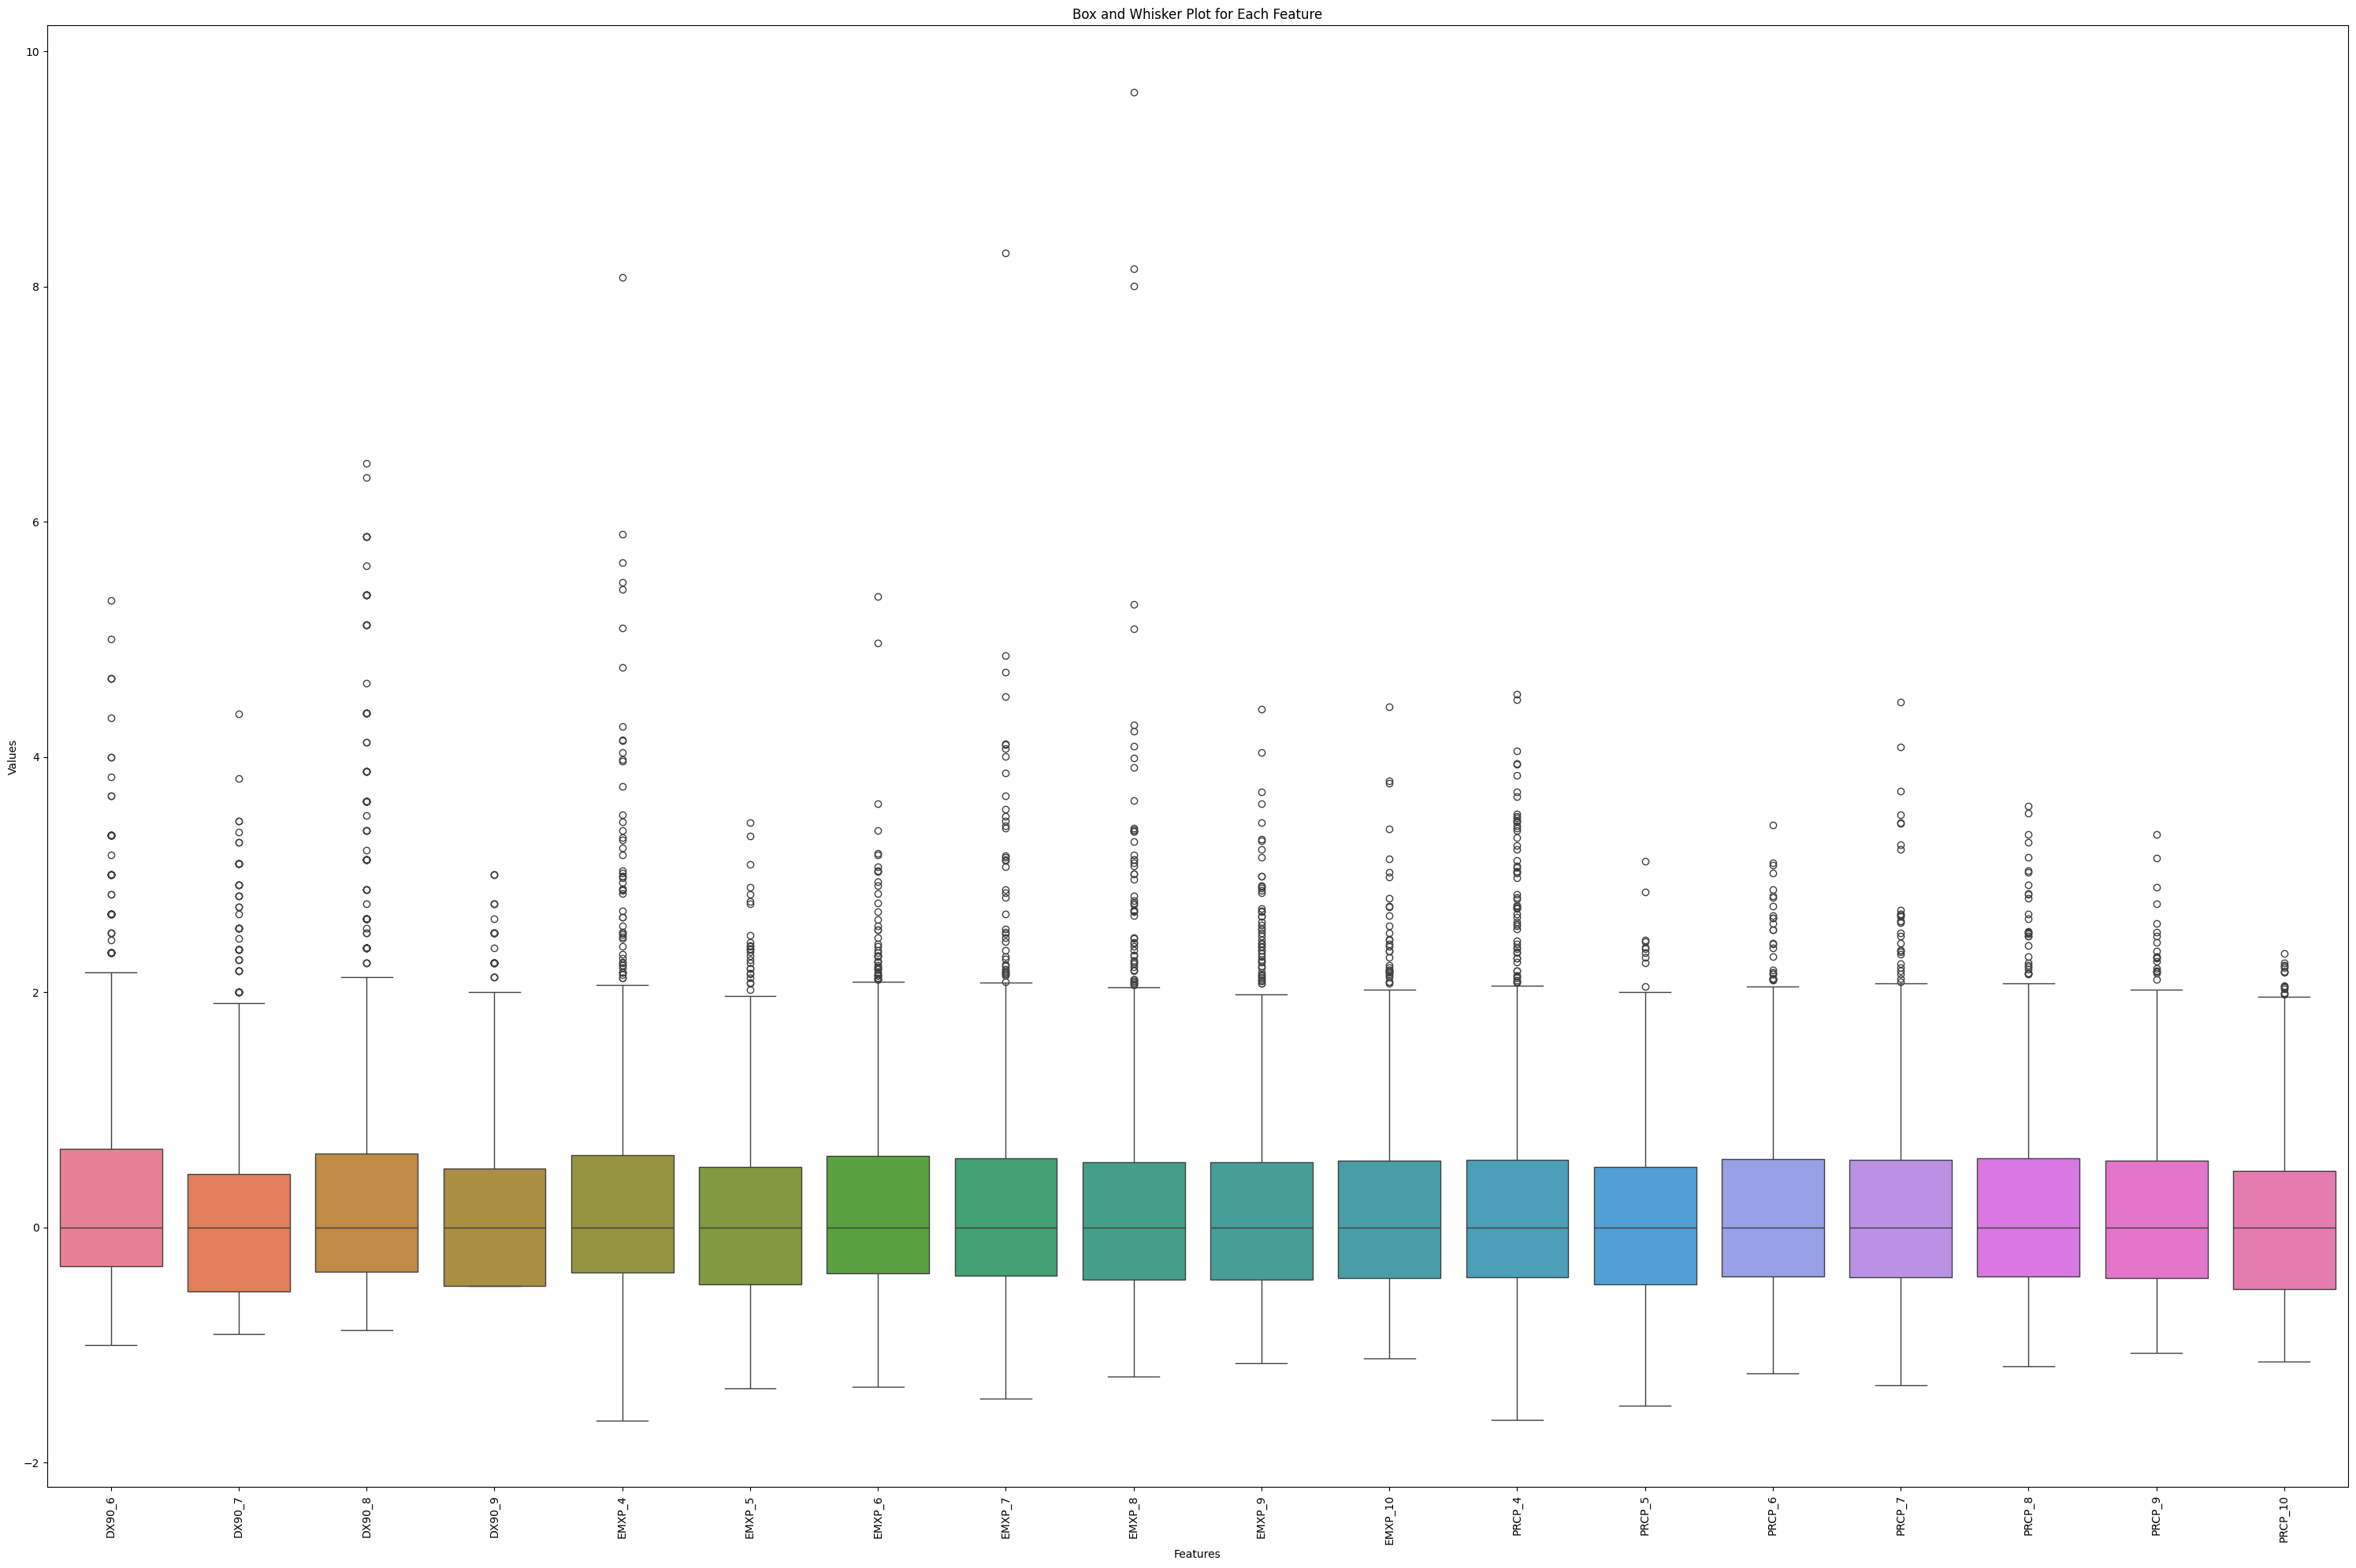

In [1943]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_train_scaled_subset_4)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

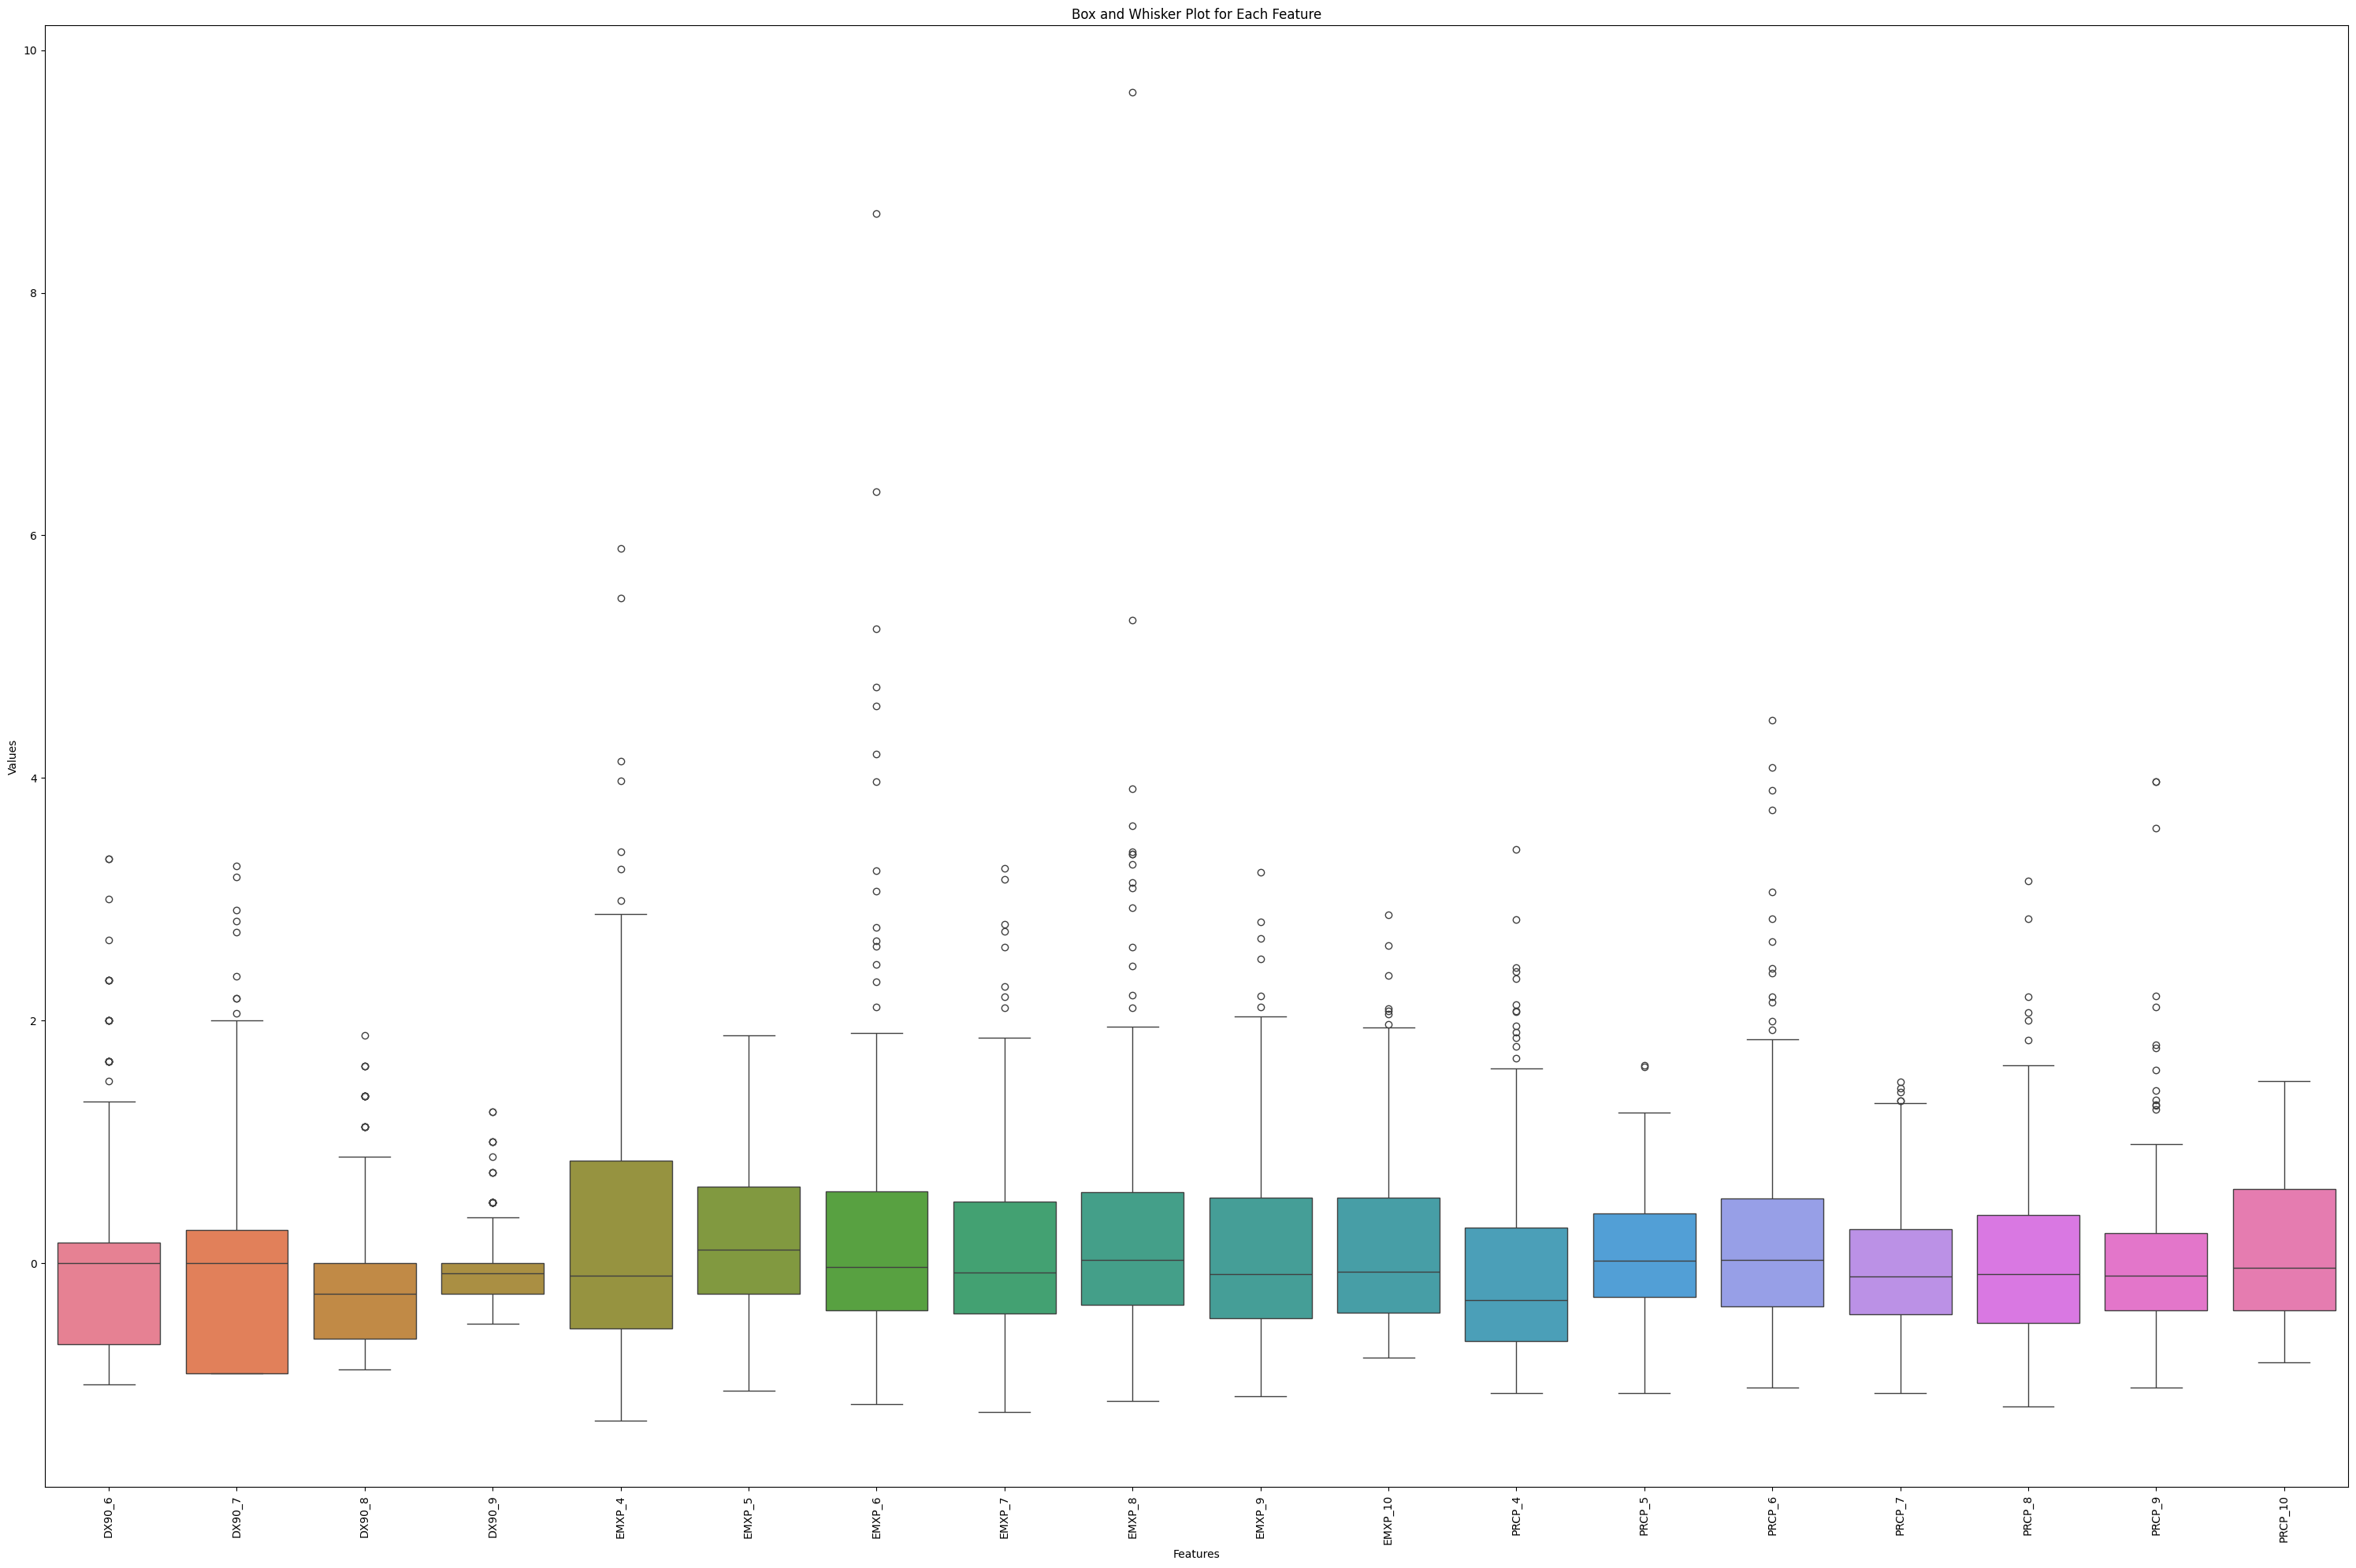

In [1944]:
# Assuming df is your DataFrame containing your dataset
# Create a box and whisker plot for each feature
plt.figure(figsize=(30, 20))
sns.boxplot(data=X_hold_scaled_subset_4)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Each Feature')
plt.tight_layout()
plt.show()

## Remove columns with extreme outliers

In [249]:
X_train_scaled_v2 = X_train_scaled.drop(columns=["EMSD_4", "SNOW_4", "DX90_10"], axis=1)
X_test_scaled_v2 = X_test_scaled.drop(columns=["EMSD_4", "SNOW_4", "DX90_10"], axis=1)
X_hold_scaled_v2 = X_hold_scaled.drop(columns=["EMSD_4", "SNOW_4", "DX90_10"], axis=1)


In [270]:
X_train_scaled_v2

EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0    -0.684655  0.290033  0.086477 -0.027731  1.970396  0.606535  1.781224   
1    -1.081832  0.106674 -1.289569  0.234049  0.575460  1.455051 -0.490401   
2    -2.802932  1.634663 -0.538999 -0.581496 -1.258623 -0.203845  0.608772   
3     0.979705  1.267946 -0.254692  0.526034  0.872530 -0.966556  0.860012   
4    -0.126435 -0.065872 -0.087612 -0.092043 -0.092592 -0.004564  0.016758   
...        ...       ...       ...       ...       ...       ...       ...   
1134  0.147525 -2.460349 -1.505642 -0.883550 -1.258623 -2.062952 -1.233652   
1135 -0.126435 -0.065872 -0.087612 -0.092043 -0.092592 -0.004564  0.016758   
1136 -0.126435 -0.065872 -0.087612 -0.092043 -0.092592 -0.004564  0.016758   
1137  2.265802  0.290033  0.086477  0.223980  1.260012  0.320519 -0.103073   
1138 -0.684655  0.962348  0.086477 -0.027731  0.162145  0.320519  1.320618   

        TAVG_4    TAVG_5    TAVG_6  ...    EMXP_8    EMXP_9   EMXP_10  \
0    -1.056573  0.900507  0.143825  ...  0.522360 -0.274175  0.200156   
1    -1.747973 -0.620815 -1.717833  ...  0.334663  1.155309  1.004403   
2    -2.080869  1.800071  0.617128  ... -0.069284  2.200749 -0.756059   
3     2.221175  0.371351  1.011548  ...  0.810294  2.092404  1.607506   
4    -0.062978 -0.094066  0.026905  ... -0.147806  0.308391 -0.159500   
...        ...       ...       ...  ...       ...       ...       ...   
1134  0.889590 -0.369466 -2.064922  ...  0.016166  0.000000  0.000000   
1135 -0.062978 -0.094066  0.026905  ... -0.612009  1.604485  1.341673   
1136 -0.062978 -0.094066  0.026905  ... -0.542725 -1.074513  1.055512   
1137  1.555382  1.429662  1.405967  ... -0.668206  0.187845  1.696191   
1138 -1.210217  0.583014 -0.013942  ...  3.136259 -0.137683 -0.538546   

        PRCP_4    PRCP_5    PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10  
0    -0.199588 -1.199468 -0.471183 -0.712393  0.295567 -0.318277  0.088744  
1     0.993926 -0.443678  0.549711 -0.876638 -0.014095  0.286345  0.411096  
2     0.541549 -1.063547  0.296011 -0.261875  0.634191  0.995301 -0.657603  
3    -0.345917  0.402682 -0.181461  1.026369  1.211159  2.041188  0.934702  
4    -0.365382 -0.575972  2.521865 -0.059857 -0.176669 -0.232563 -0.654744  
...        ...       ...       ...       ...       ...       ...       ...  
1134  0.000000  0.000000  0.004490 -0.016995  0.001083  0.000000  0.000000  
1135  0.163544 -0.118829  0.496563  0.331320 -0.487399  1.723570  0.787159  
1136  0.288793  1.726163 -0.785773 -0.261536  0.089374 -0.934139  0.794957  
1137  0.126589 -0.220963  1.001061  0.632485 -0.841517  0.216589  0.584069  
1138 -0.020099 -0.977679 -0.679694 -0.461862  2.311844 -0.251269 -0.448245  

[1139 rows x 50 columns]

In [271]:
X_test_scaled_v2

EMXT_4    EMXT_5    EMXT_6    EMXT_7    EMXT_8    EMXT_9   EMXT_10  \
0    1.887538  0.962348  0.086477  0.828088  0.485047  2.465643  0.148166   
1    0.790574 -0.229484 -0.396845 -0.606667 -0.741980 -0.704374 -0.438059   
2   -1.642923 -0.626761 -0.671675  0.039392 -1.150989 -0.108506  1.613731   
3    0.601442 -1.115718 -1.789949 -1.689026 -1.646105 -1.538589 -1.024285   
4   -1.062919 -0.626761 -0.974936 -0.313004 -0.096176  1.393081 -0.668362   
..        ...       ...       ...       ...       ...       ...       ...   
280  1.433622 -0.382283 -0.538999 -0.581496 -1.258623 -0.728209 -0.773046   
281  0.790574  2.490338  1.820749  1.784591  0.711079 -0.323019 -0.773046   
282  0.979705 -2.460349 -0.254692  0.526034  0.485047  0.606535  0.357533   
283  0.147525  0.290033 -0.087612  1.381853 -0.548239  0.320519 -1.024285   
284 -1.895099 -1.115718 -1.505642 -0.329785 -1.969007  0.082172 -1.024285   

       TAVG_4    TAVG_5    TAVG_6  ...    EMXP_8    EMXP_9   EMXP_10  \
0    1.555382  0.371351  0.696012  ... -0.839723  0.087418 -0.123143   
1    1.043234  1.905902  0.380477  ...  0.145497 -0.726663  1.578577   
2   -0.527353 -0.369466 -0.802781  ...  0.550973 -0.274742  0.401095   
3    0.121368  1.006338 -1.118316  ... -0.378753 -1.125507  0.356529   
4   -0.646855  0.494821 -0.460951  ... -0.646651  0.185156  1.334636   
..        ...       ...       ...  ...       ...       ...       ...   
280  0.940805  1.588409 -0.487246  ...  0.297921 -0.876002 -0.429242   
281 -0.493210  1.006338 -0.526687  ...  0.221709  0.063135 -0.023456   
282 -0.390780 -1.692354  0.380477  ... -0.203233  0.105630 -0.473808   
283 -1.978440 -0.686959  0.026905  ... -0.515473 -0.328889  1.297107   
284 -0.698069  0.159689 -1.354968  ... -0.483449 -0.478978 -0.051603   

       PRCP_4    PRCP_5    PRCP_6    PRCP_7    PRCP_8    PRCP_9   PRCP_10  
0    3.968422  0.479135  0.452712 -1.130517 -0.884282  0.414703 -0.033611  
1   -1.231127  1.043733 -0.788278  1.322797  0.288127 -0.762003  2.202547  
2    0.655112  0.248987 -0.198166 -0.634102 -0.112385 -0.089761  0.178113  
3   -1.088952  0.551122  0.220300  0.294774  0.591322 -0.951794  0.388666  
4    1.557086 -0.464970  0.330764 -0.628349 -0.699922  0.080604  0.576995  
..        ...       ...       ...       ...       ...       ...       ...  
280 -1.087259  0.171483  0.262899 -0.315002  0.139257 -0.802988 -0.232077  
281 -0.906719 -1.197756 -0.415334 -0.104524  0.060275  0.059165  0.672524  
282 -0.208820 -0.191078 -0.368559  0.140469 -0.072746 -0.172452 -0.428594  
283 -0.633758 -0.126218 -0.713552  0.276791 -0.280657 -0.241069  0.067204  
284 -0.170737 -0.051177  2.744880  2.043226 -0.336711 -0.496127 -0.638368  

[285 rows x 50 columns]

## Gradient Boosting V2

In [315]:
# Create a Gradient Boosting regressor
gb_regressor_v2 = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [316]:
# Perform grid search with 5-fold cross-validation
grid_search_gb_v2 = GridSearchCV(gb_regressor_v2, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb_v2.fit(X_train_scaled_v2, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [317]:
# Make predictions on the testing data using the best model
best_params_gb_v2 = grid_search_gb_v2.best_estimator_
gb_pred_v2 = best_params_gb_v2.predict(X_test_scaled_v2)

In [318]:
best_params_gb_v2

GradientBoostingRegressor(n_estimators=200)

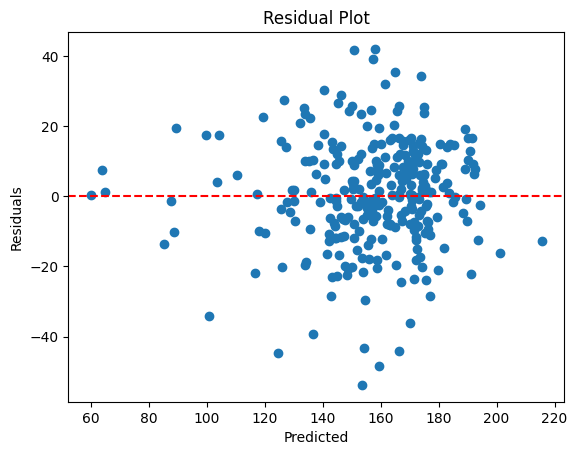

In [319]:
residuals_gb_v2 = y_test - gb_pred_v2
plt.scatter(gb_pred_v2, residuals_gb_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [320]:
mse = mean_squared_error(y_test , gb_pred_v2)
r2 = r2_score(y_test, gb_pred_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 236.61010931639476
R-squared: 0.6912209788304724


## Validation for GB_v2

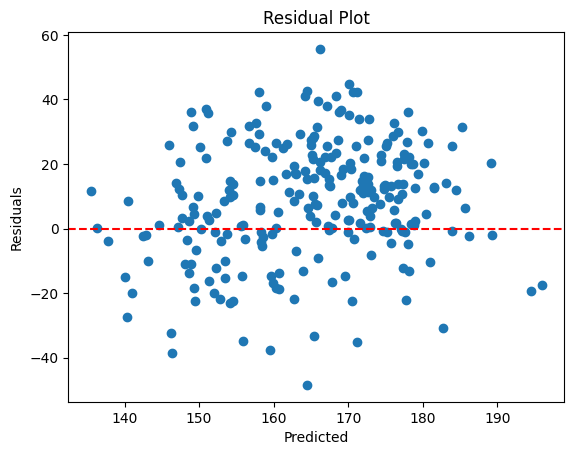

In [321]:
best_predictions_gb_hold_v2 = best_params_gb_v2.predict(X_hold_scaled_v2)

residuals_gb_hold_v2 = y_hold - best_predictions_gb_hold_v2
plt.scatter(best_predictions_gb_hold_v2, residuals_gb_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [322]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold_v2 )
r2 = r2_score(y_hold, best_predictions_gb_hold_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 403.2166075179709
R-squared: 0.25491045888064745


working

## RF_v2

In [286]:
# Define the parameter grid
param_grid = {
        'n_estimators': [50, 100, 150],  # Reducing the number of trees
    'max_depth': [None, 10, 20],      # Limiting the maximum depth of trees
    'min_samples_split': [5, 10, 15]  # Increasing the min_samples_split
}

# Create the Random Forest regressor
rf_regressor_v2 = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_rf_v2 = GridSearchCV(estimator=rf_regressor_v2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search_rf_v2.fit(X_train_scaled_v2, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [292]:

# Make predictions on the testing data using the best model
best_params_rf_v2 = grid_search_rf_v2.best_estimator_
print(best_params_rf_v2)
rf_pred_v2 = best_params_rf_v2.predict(X_test_scaled_v2)

RandomForestRegressor(min_samples_split=5, random_state=42)


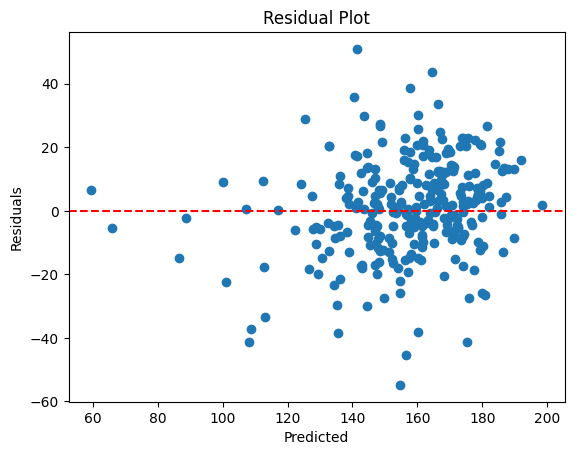

In [293]:
residuals_rf_v2 = y_test - rf_pred_v2
plt.scatter(rf_pred_v2, residuals_rf_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [294]:
mse = mean_squared_error(y_test , rf_pred_v2)
r2 = r2_score(y_test, rf_pred_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 234.5732670641462
R-squared: 0.6938790823187095


## Validation for RF_v2

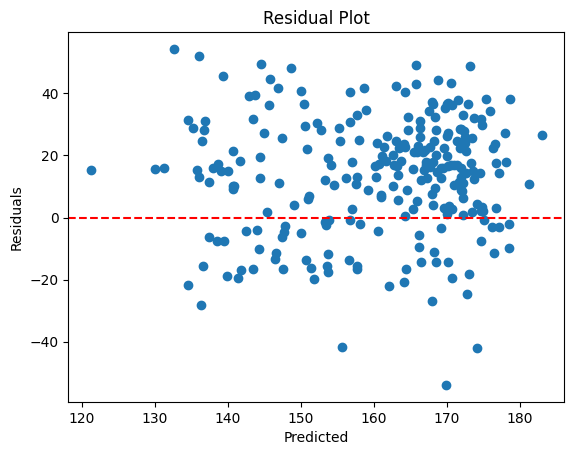

In [295]:
best_predictions_rf_hold_v2 = best_params_rf_v2.predict(X_hold_scaled_v2)

residuals_rf_hold_v2 = y_hold - best_predictions_rf_hold_v2
plt.scatter(best_predictions_rf_hold_v2, residuals_rf_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [296]:
mse = mean_squared_error(y_hold , best_predictions_rf_hold_v2 )
r2 = r2_score(y_hold, best_predictions_rf_hold_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 531.6092460664944
R-squared: 0.01765829625746318


## XGB_v2

In [272]:
# Define the XGBoost regressor
xg_reg_v2 = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [264]:
# Perform grid search with cross-validation
grid_search_xgb_v2 = GridSearchCV(estimator=xg_reg_v2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb_v2.fit(X_train_scaled_v2, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [274]:
# Get the best hyperparameters and model
best_params_xgb_v2 = grid_search_xgb_v2.best_params_
print("Best Hyperparameters:", best_params_xgb_v2)
best_model_xgb_v2 = grid_search_xgb_v2.best_estimator_

xgb_pred_v2 = best_model_xgb_v2.predict(X_test_scaled_v2)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}


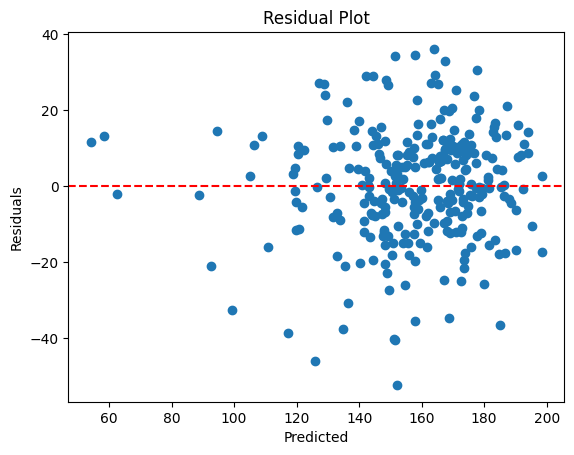

In [275]:
residuals_xgb_v2 = y_test - xgb_pred_v2
plt.scatter(xgb_pred_v2, residuals_xgb_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [276]:
mse = mean_squared_error(y_test , xgb_pred_v2)
r2 = r2_score(y_test, xgb_pred_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 218.1413515547982
R-squared: 0.7153229284906925


## Validation for XGB_v2

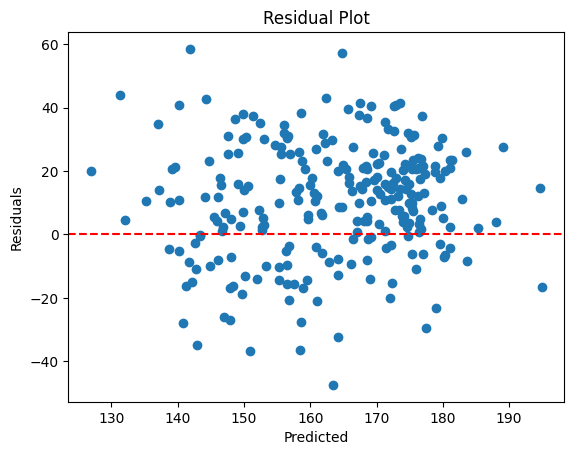

In [277]:
best_predictions_xgb_hold_v2 = best_model_xgb_v2.predict(X_hold_scaled_v2)

residuals_xgb_hold_v2 = y_hold - best_predictions_xgb_hold_v2
plt.scatter(best_predictions_xgb_hold_v2, residuals_xgb_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [278]:
mse = mean_squared_error(y_hold , best_predictions_xgb_hold_v2)
r2 = r2_score(y_hold, best_predictions_xgb_hold_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 436.68896460793746
R-squared: 0.19305808792334567


## Stacking

In [338]:
from sklearn.model_selection import cross_val_predict

In [339]:
predictions_GB_v2 = cross_val_predict(grid_search_gb_v2, X_train_scaled_v2, y_train, cv=5)

In [343]:
predictions_rf_v2 = cross_val_predict(grid_search_rf_v2, X_train_scaled_v2, y_train, cv=5)

In [368]:
predictions_XGB_v2 = cross_val_predict(grid_search_xgb_v2, X_train_scaled_v2, y_train, cv=5)

In [371]:
predictions_GB_v2.shape

(1139,)

In [372]:

# Stacked predictions for GB, RF, XGB
stacked_train_predictions = [predictions_GB_v2,  predictions_XGB_v2, predictions_rf_v2]
stacked_val_predictions = [gb_pred_v2, xgb_pred_v2 ,rf_pred_v2 ]
stacked_test_predictions = [best_predictions_gb_hold_v2, best_predictions_xgb_hold_v2 ,best_predictions_rf_hold_v2]

In [ ]:
'''
y_train
y_test
y_hold
'''

In [373]:
X_stacked_train = np.column_stack(stacked_train_predictions)

X_stacked_val = np.column_stack(stacked_val_predictions)
X_stacked_test = np.column_stack(stacked_test_predictions )

In [374]:
X_stacked_train.shape

(1139, 3)

In [375]:
meta_model = LinearRegression()

In [376]:
# Train meta-model
meta_model.fit(X_stacked_train, y_train)

LinearRegression()

In [377]:
meta_val_pred = meta_model.predict(X_stacked_val)

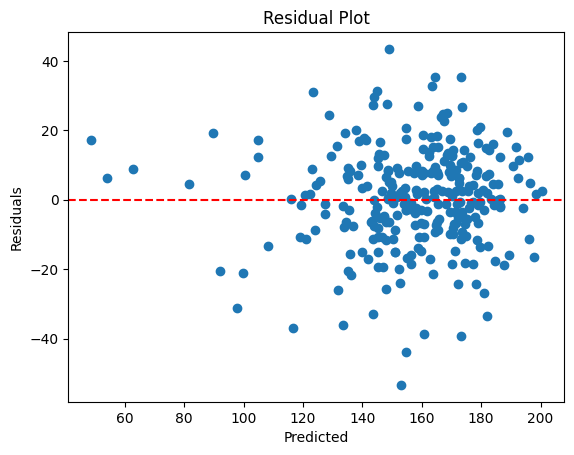

In [378]:
residuals_val_v2 = y_test - meta_val_pred
plt.scatter(meta_val_pred, residuals_val_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [379]:
mse = mean_squared_error(y_test , meta_val_pred)
r2 = r2_score(y_test, meta_val_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 207.41139765342365
R-squared: 0.7293256466012286


## Validation for meta model

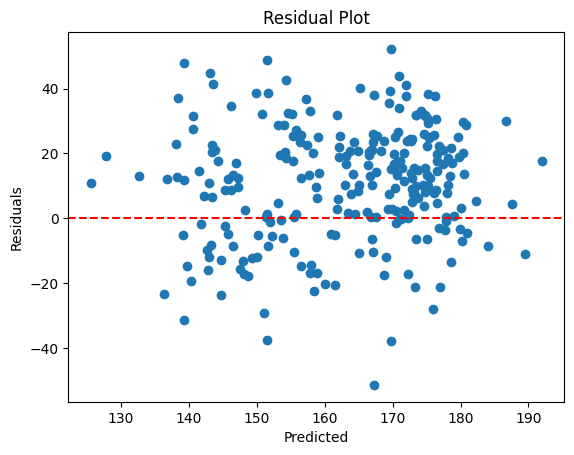

In [380]:
meta_test_pred = meta_model.predict(X_stacked_test)

residuals_meta_hold_v2 = y_hold - meta_test_pred
plt.scatter(meta_test_pred, residuals_meta_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [381]:
mse = mean_squared_error(y_hold , meta_test_pred)
r2 = r2_score(y_hold, meta_test_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 430.3339219663124
R-squared: 0.2048013438244095


## Outliers removal based on percentile

In [1967]:


def extract_outliers(df):
    # Initialize an empty list to store the indexes of outlier rows
    outlier_indexes = []
    
    # Iterate over each column (feature) in the DataFrame
    for column in df.columns:
        # Calculate the mean and standard deviation of the current column
        mean = df[column].mean()
        std = df[column].std()
        
        # Define the threshold for outliers (5 standard deviations from the mean)
        threshold = 5 * std
        
        # Find the indexes of rows where any value deviates by 5 standard deviations from the mean
        outlier_index = df.index[(df[column] - mean).abs() > threshold].tolist()
        
        # Extend the list of outlier indexes
        outlier_indexes.extend(outlier_index)
    
    # Remove duplicates from the list of outlier indexes
    outlier_indexes = list(set(outlier_indexes))
    
    # Extract the outlier rows from the DataFrame
    outlier_rows = df.iloc[outlier_indexes]
    
    # Return the number of rows and the indexes of the extracted rows
    return len(outlier_rows), outlier_rows.index.tolist()

# Example usage:
# Assuming df is your DataFrame containing the data
num_outliers, outlier_indexes = extract_outliers(X_train_scaled_v2)
print("Number of outlier rows:", num_outliers)
print("Indexes of outlier rows:", outlier_indexes)


Number of outlier rows: 27
Indexes of outlier rows: [776, 1035, 539, 930, 685, 692, 443, 700, 316, 957, 69, 70, 200, 841, 588, 209, 226, 740, 745, 618, 495, 754, 1138, 375, 122, 1019, 252]


In [1968]:
y_train_v2 = y_train.reset_index(drop=True)

In [1969]:
X_train_scaled_v3 = X_train_scaled_v2.drop(outlier_indexes)
y_train_v3 = y_train_v2.drop(outlier_indexes) 

In [1970]:
print(X_train_scaled_v3.shape)
print(y_train_v3.shape)

(1113, 50)
(1113,)


## GB_V3

In [1971]:
# Create a Gradient Boosting regressor
gb_regressor_v3 = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [1972]:
# Perform grid search with 5-fold cross-validation
grid_search_gb_v3 = GridSearchCV(gb_regressor_v3, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb_v3.fit(X_train_scaled_v3, y_train_v3)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [1973]:
# Make predictions on the testing data using the best model
best_params_gb_v3 = grid_search_gb_v3.best_estimator_
gb_pred_v3 = best_params_gb_v3.predict(X_test_scaled_v2)

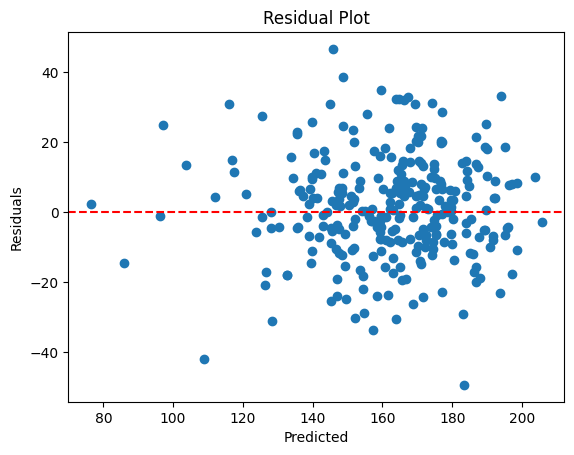

In [1974]:
residuals_gb_v3 = y_test - gb_pred_v3
plt.scatter(gb_pred_v3, residuals_gb_v3)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1975]:
mse = mean_squared_error(y_test , gb_pred_v3)
r2 = r2_score(y_test, gb_pred_v3)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 221.12852966430972
R-squared: 0.6645264988162793


## Validation for GB_v3

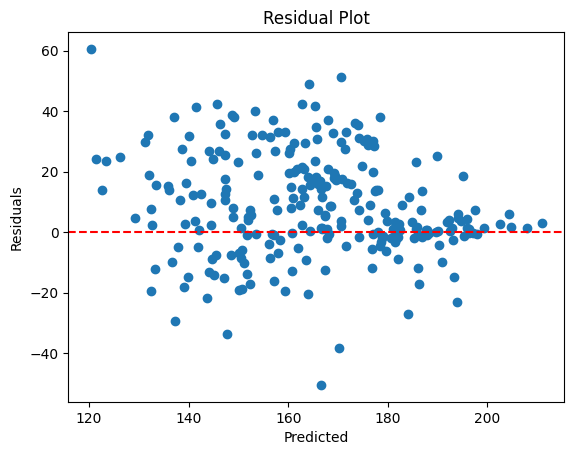

In [1976]:
best_predictions_gb_hold_v3 = best_params_gb_v3.predict(X_hold_scaled_v2)

residuals_gb_hold_v3 = y_hold - best_predictions_gb_hold_v3
plt.scatter(best_predictions_gb_hold_v3, residuals_gb_hold_v3)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [1978]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold_v3)
r2 = r2_score(y_hold, best_predictions_gb_hold_v3)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 364.1558580362173
R-squared: 0.3270894201746479
